Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
num_days_R_prediction=14

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=8 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=51
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
#
drop_n_dataset_days=145
#

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
237                           NaN                Thailand  15.870032   
238                           NaN             Timor-Leste  -8.874217   
239                           NaN                    Togo   8.619500   
240                           NaN     Trinidad and Tobago  10.691800   
241                           NaN                 Tunisia  33.886917   
242                           NaN                  Turkey  38.963700   
243                           NaN           United States  40.000000   
244                           NaN                  Uganda   1.373333   
245                           NaN                 Ukraine  48.379400   
246                           NaN    United Arab Emirates  23.424076   
247                      Anguilla          United Kingdom  18.220600   
248                       Bermuda          United Kingdom  32.307800   
249        British Virgin Islands          United Kingdom  18.420700   
250                Cayman Islands          United Kingdom  19.313300   
251               Channel Islands          United Kingdom  49.372300   
252   Falkland Islands (Malvinas)          United Kingdom -51.796300   
253                     Gibraltar          United Kingdom  36.140800   
254                   Isle of Man          United Kingdom  54.236100   
255                    Montserrat          United Kingdom  16.742498   
256      Turks and Caicos Islands          United Kingdom  21.694000   
257                           NaN          United Kingdom  55.378100   
258                           NaN                 Uruguay -32.522800   
259                           NaN              Uzbekistan  41.377491   
260                           NaN               Venezuela  

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
239                           NaN                Thailand  15.870032   
240                           NaN             Timor-Leste  -8.874217   
241                           NaN                    Togo   8.619500   
242                           NaN     Trinidad and Tobago  10.691800   
243                           NaN                 Tunisia  33.886917   
244                           NaN                  Turkey  38.963700   
245                           NaN           United States  40.000000   
246                           NaN                  Uganda   1.373333   
247                           NaN                 Ukraine  48.379400   
248                           NaN    United Arab Emirates  23.424076   
249                      Anguilla          United Kingdom  18.220600   
250                       Bermuda          United Kingdom  32.307800   
251        British Virgin Islands          United Kingdom  18.420700   
252                Cayman Islands          United Kingdom  19.313300   
253               Channel Islands          United Kingdom  49.372300   
254   Falkland Islands (Malvinas)          United Kingdom -51.796300   
255                     Gibraltar          United Kingdom  36.140800   
256                   Isle of Man          United Kingdom  54.236100   
257                    Montserrat          United Kingdom  16.742498   
258      Turks and Caicos Islands          United Kingdom  21.694000   
259                           NaN          United Kingdom  55.378100   
260                           NaN                 Uruguay -32.522800   
261                           NaN              Uzbekistan  41.377491   
262                           NaN               Venezuela  

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/14/20  \
185        0        0        0        0        0        0  ...        73   
186        0        0        0        0        0        0  ...       130   
187        0        0        0        0        0        0  ...       675   
188        0        0        0        0        0        0  ...        32   
189        0        0        0        0        0        0  ...         2   
190        0        0        0        0        0        0  ...         1   
191        0        0        0        0        0        0  ...        22   
192        0        0        0        0        0        0  ...      6663   
193        0        0        0        0        0        0  ...        25   
194        0        0        0        0        0        0  ...       154   

     10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  10/21/20  \
185        73        73        74        75        75        78        79   
186       130       131       131       131       131       132       133   
187       694       715       727       739       757       765       791   
188        32        32        34        34        34        34        35   
189         2         2         3         3         3         3         3   
190         1         1         1         1         1         1         1   
191        22        22        22        22        22        22        22   
192      6692      6708      6737      6751      6768      6814      6873   
193        25        25        25        25        25        25        25   
194       154       154       154       154       154       155       155   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 280 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State   Country/Region        Lat        Long  \
175                             Aruba      Netherlands  12.521100  -69.968300   
176  Bonaire, Sint Eustatius and Saba      Netherlands  12.178400  -68.238500   
177                           Curacao      Netherlands  12.169600  -68.990000   
178                      Sint Maarten      Netherlands  18.042500  -63.054800   
179                               NaN      Netherlands  52.132600    5.291300   
180                               NaN      New Zealand -40.900600  174.886000   
181                               NaN        Nicaragua  12.865416  -85.207229   
182                               NaN            Niger  17.607789    8.081666   
183                               NaN          Nigeria   9.082000    8.675300   
184                               NaN  North Macedonia  41.608600   21.745300   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/13/20  \
175        0        0        0        0        0        0  ...      3849   
176        0        0        0        0        0        0  ...        78   
177        0        0        0        0        0        0  ...       343   
178        0        0        0        0        0        0  ...       645   
179        0        0        0        0        0        0  ...         0   
180        0        0        0        0        0        0  ...      1809   
181        0        0        0        0        0        0  ...      4225   
182        0        0        0        0        0        0  ...      1124   
183        0        0        0        0        0        0  ...     52006   
184        0        0        0        0        0        0  ...     16397   

     10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
175      3875      3910      3947      3983      3983      4040      4065   
176       111       111       111       120       121       121       121   
177       367       371       391       417       433       458       466   
178       657       657       659       664       669       675       675   
179         0         0         0         0         0         0         0   
180      1809      1809      1818      1819      1824      1829      1831   
181      4225      4225      4225      4225      4225      4225      4225   
182      1124      1124      1126      1126      1126      1128      1128   
183     52143     52194     52304     56557     56611     56697     56797   
184     16591     16758     16949     17111     17239     17392     17673   

      Population                                         region  
175           NaN                             Netherlands_Aruba  
176           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
177           NaN                           Netherlands_Curacao  
178           NaN                      Netherlands_Sint Maarten  
179    17,180,000                               Netherlands_nan  
180     4,813,844                               New Zealand_nan  
181           NaN                                 Nicaragua_nan  
182    24,002,020                                     Niger_nan  
183           NaN                                   Nigeria_nan  
184     2,077,000                           North Macedonia_nan  

[10 rows x 279 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  \
185                               NaN     Mozambique -18.665695   35.529562   
186                               NaN        Namibia -22.957600   18.490400   
187                               NaN          Nepal  28.166700   84.250000   
188                             Aruba    Netherlands  12.521100  -69.968300   
189  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.238500   
190                           Curacao    Netherlands  12.169600  -68.990000   
191                      Sint Maarten    Netherlands  18.042500  -63.054800   
192                               NaN    Netherlands  52.132600    5.291300   
193                               NaN    New Zealand -40.900600  174.886000   
194                               NaN      Nicaragua  12.865416  -85.207229   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/13/20  \
185        0        0        0        0        0        0  ...     10258   
186        0        0        0        0        0        0  ...     12000   
187        0        0        0        1        1        1  ...    115358   
188        0        0        0        0        0        0  ...      4229   
189        0        0        0        0        0        0  ...       148   
190        0        0        0        0        0        0  ...       619   
191        0        0        0        0        0        0  ...       719   
192        0        0        0        0        0        0  ...    188876   
193        0        0        0        0        0        0  ...      1874   
194        0        0        0        0        0        0  ...      5353   

     10/14/20  10/15/20  10/16/20  10/17/20  10/18/20  10/19/20  10/20/20  \
185     10392     10537     10612     10707     10866     11080     11190   
186     12069     12103     12215     12263     12293     12326     12367   
187    117996    121745    126137    129304    132246    136036    139129   
188      4255      4285      4289      4304      4322      4334      4355   
189       150       150       150       150       150       150       150   
190       645       673       698       715       744       751       759   
191       729       737       746       749       753       756       756   
192    196163    203954    211938    220052    228234    236226    244391   
193      1876      1880      1883      1886      1886      1887      1912   
194      5353      5353      5353      5353      5353      5353      5434   

      Population                                         region  
185           NaN                                Mozambique_nan  
186           NaN                                   Namibia_nan  
187    29,300,000                                     Nepal_nan  
188           NaN                             Netherlands_Aruba  
189           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
190           NaN                           Netherlands_Curacao  
191           NaN                      Netherlands_Sint Maarten  
192    17,180,000                               Netherlands_nan  
193     4,813,844                               New Zealand_nan  
194           NaN                                 Nicaragua_nan  

[10 rows x 279 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State   Country/Region        Lat        Long  1/22/20  1/23/20  \
220            NaN       Seychelles  -4.679600   55.492000        0        0   
221            NaN     Sierra Leone   8.460555  -11.779889        0        0   
222            NaN        Singapore   1.283300  103.833300        0        1   
223            NaN         Slovakia  48.669000   19.699000        0        0   
224            NaN         Slovenia  46.151200   14.995500        0        0   
225            NaN  Solomon Islands  -9.645700  160.156200        0        0   
226            NaN          Somalia   5.152149   46.199616        0        0   
227            NaN     South Africa -30.559500   22.937500        0        0   
228            NaN      South Sudan   6.877000   31.307000        0        0   
229            NaN            Spain  40.463667   -3.749220        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  10/13/20  10/14/20  10/15/20  \
220        0        0        0        0  ...       148       148       148   
221        0        0        0        0  ...      2309      2315      2323   
222        3        3        4        5  ...     57884     57889     57892   
223        0        0        0        0  ...     20886     22296     24225   
224        0        0        0        0  ...      9231      9938     10683   
225        0        0        0        0  ...         2         2         3   
226        0        0        0        0  ...      3864      3864      3864   
227        0        0        0        0  ...    694537    696414    698184   
228        0        0        0        0  ...      2798      2798      2807   
229        0        0        0        0  ...    896086    908056    921374   

     10/16/20  10/17/20  10/18/20  10/19/20  10/20/20   Population   \
220       149       149       149       149       149           NaN   
221      2325      2327      2330      2331      2336           NaN   
222     57901     57904     57911     57915     57921     5,612,000   
223     26300     28268     29835     30695     31400     5,459,087   
224     11517     12416     13142     13679     14473     2,078,878   
225         3         3         3         3         3           NaN   
226      3864      3864      3864      3890      3890           NaN   
227    700203    702131    703793    705254    706304    59,148,674   
228      2817      2817      2842      2847      2847           NaN   
229    936560    936560    936560    974449    988322    46,660,000   

                  region  
220       Seychelles_nan  
221     Sierra Leone_nan  
222        Singapore_nan  
223         Slovakia_nan  
224         Slovenia_nan  
225  Solomon Islands_nan  
226          Somalia_nan  
227     South Africa_nan  
228      South Sudan_nan  
229            Spain_nan  

[10 rows x 279 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

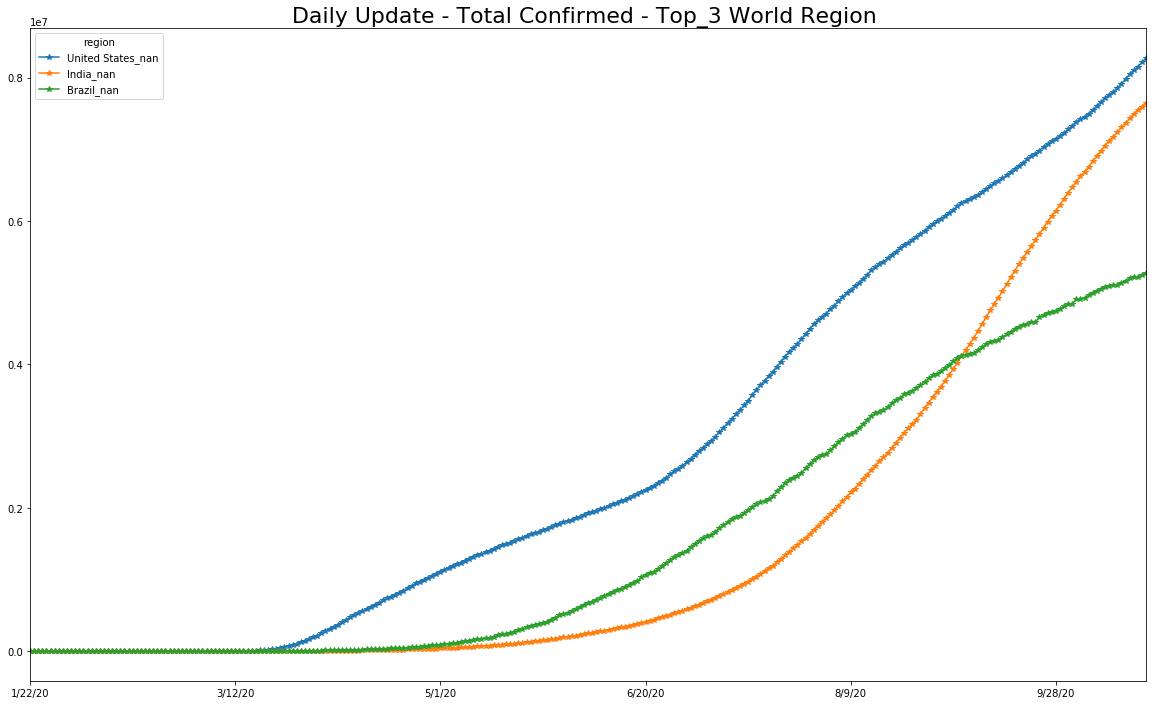

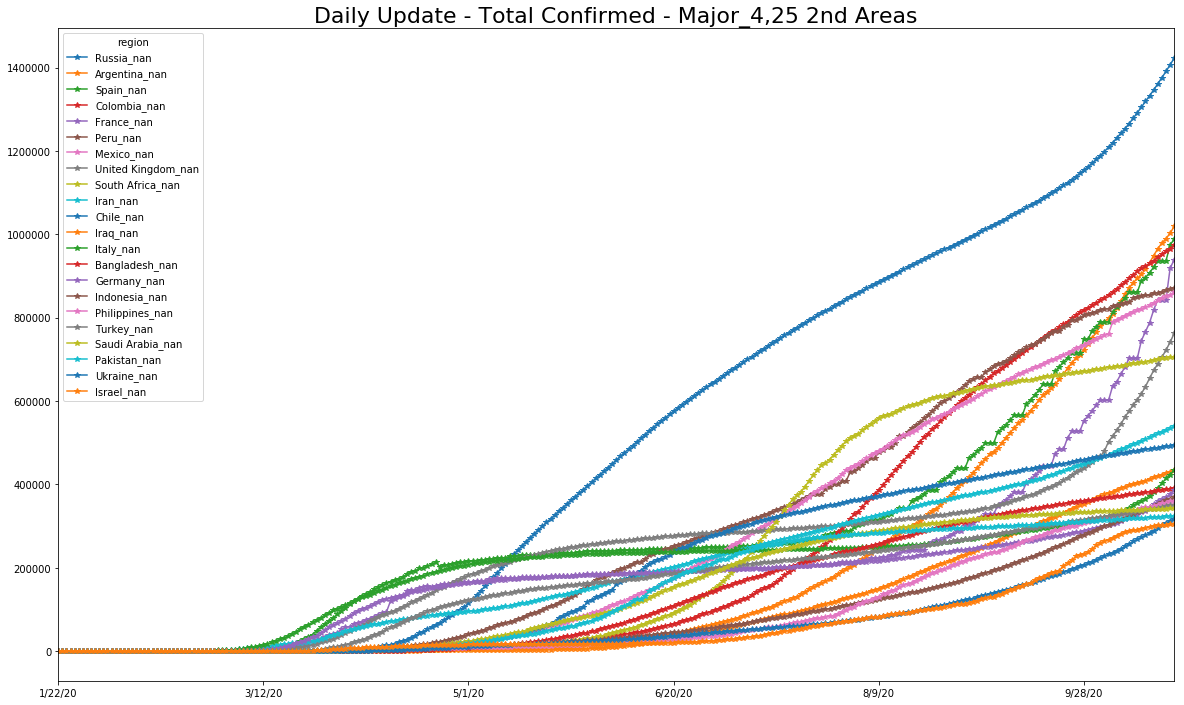

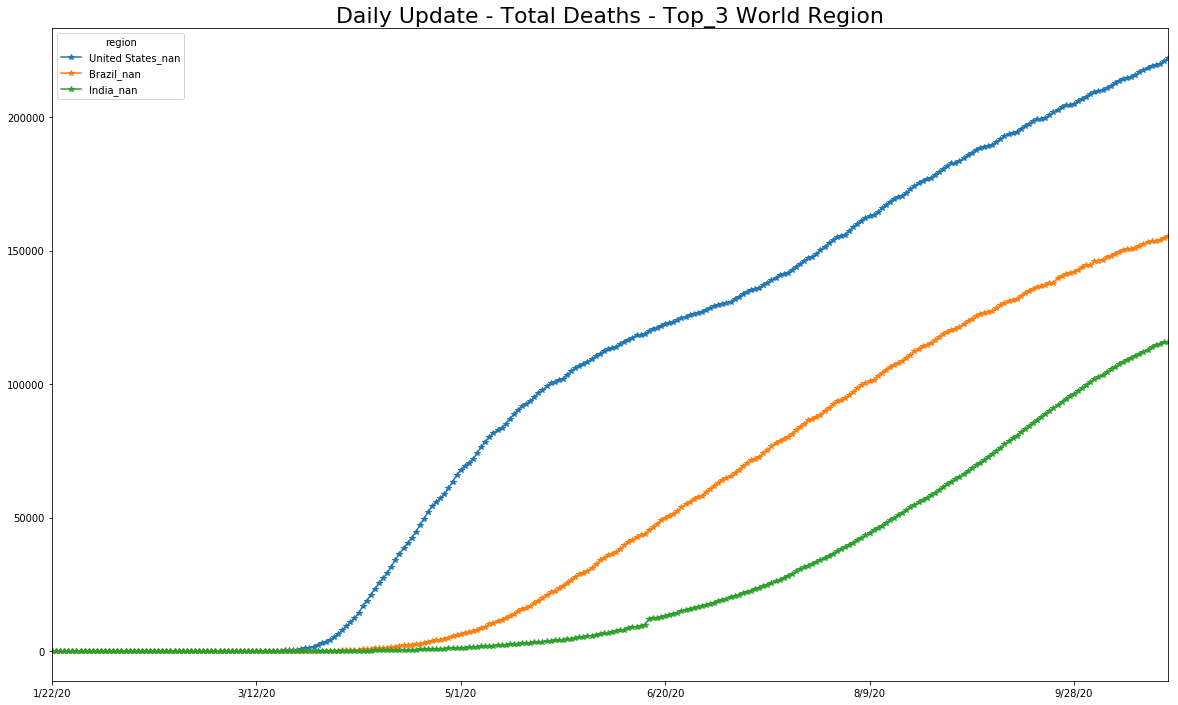

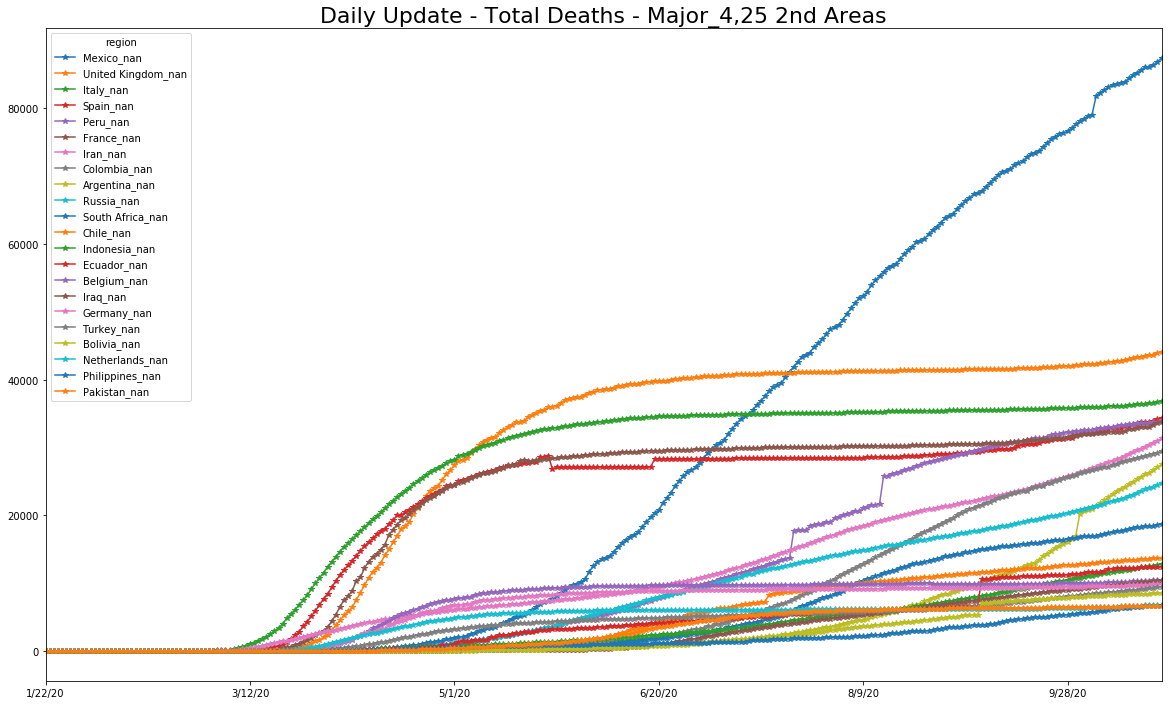

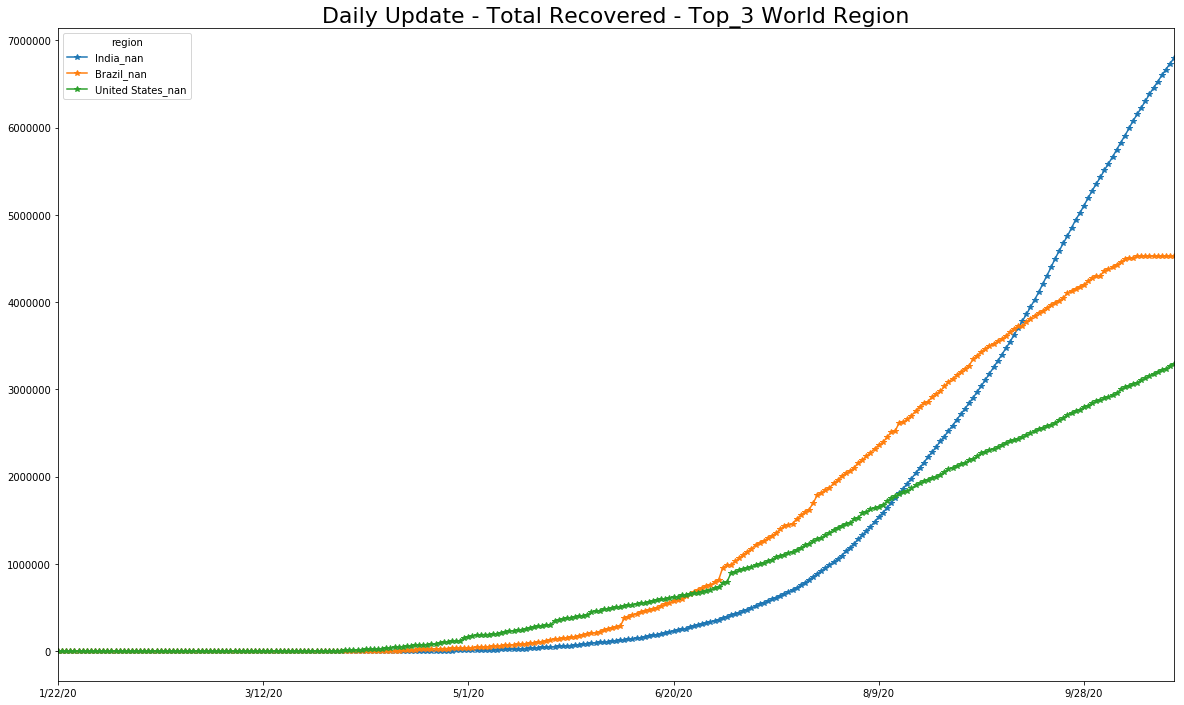

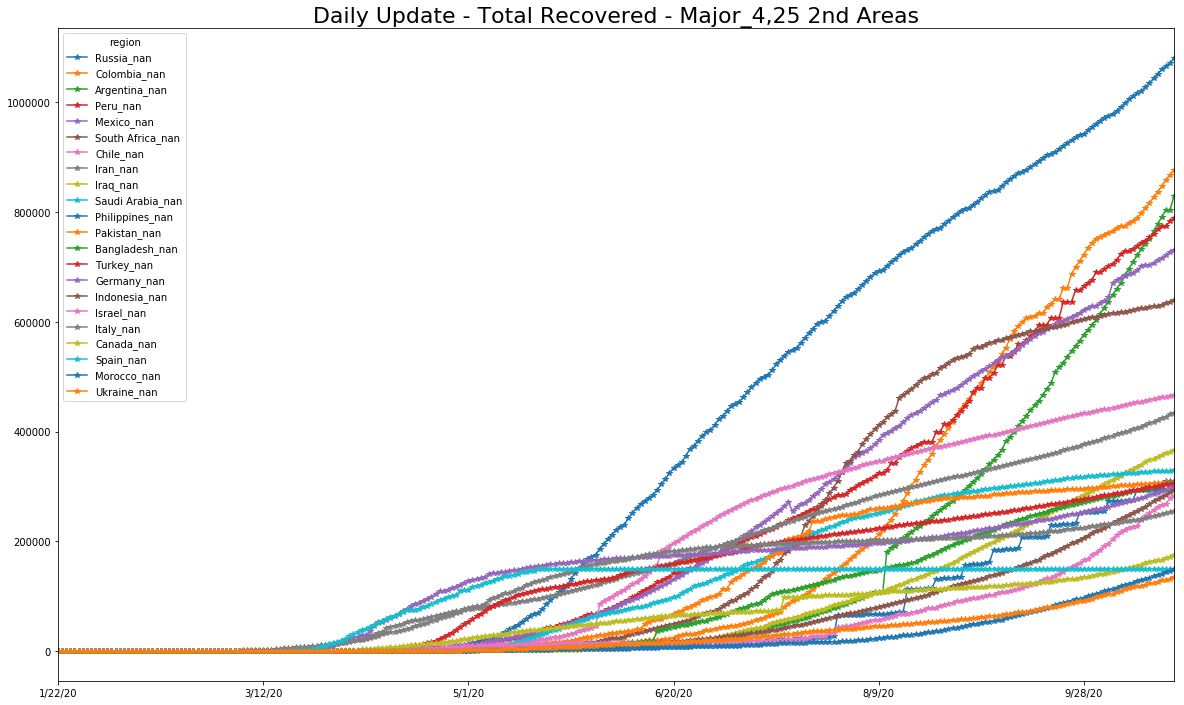

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/10/22


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
## DROP_N=15
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [23]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
6/15/20            25527         1590        11031          853         142   
6/16/20            26310         1672        11147          854         148   
6/17/20            26874         1722        11268          854         155   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
6/15/20                       26          32785        17064   
6/16/20                       26          34159        17489   
6/17/20                       26          35552        18033   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
6/15/20                                     108                       3134   
6/16/20                                     108                       3135   
6/17/20                                     108                       3137   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
6/15/20  ...            2111207          848            5263           3062   
6/16/20  ...            2135002          849            5493           3150   
6/17/20  ...            2160906          849            5682           3386   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
6/15/20          334                     505                   9        844   
6/16/20          334                     514                   9        885   
6/17/20          335                     555                   9        902   

region   Zambia_nan  Zimbabwe_nan  
6/15/20        1382           387  
6/16/20        1405           391  
6/17/20        1412           401  

[3 rows x 267 columns]

In [24]:
ts[-4:]

region    Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
10/17/20            40141        16774        54203         3377        7462   
10/18/20            40200        17055        54402         3377        7622   
10/19/20            40287        17350        54616         3623        7829   
10/20/20            40357        17651        54829         3623        8049   

region    Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
10/17/20                      119         979119        63000   
10/18/20                      119         989680        64694   
10/19/20                      119        1002662        65460   
10/20/20                      119        1018999        66694   

region    Australia_Australian Capital Territory  Australia_New South Wales  \
10/17/20                                     113                       4338   
10/18/20                                     113                       4342   
10/19/20                                     113                       4347   
10/20/20                                     113                       4357   

region    ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
10/17/20  ...            8106384         2501           62809          86289   
10/18/20  ...            8154594         2531           63124          86636   
10/19/20  ...            8212981         2560           63523          86636   
10/20/20  ...            8273296         2623           63831          87644   

region    Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
10/17/20         1126                   46746                  10       2055   
10/18/20         1134                   47135                  10       2056   
10/19/20         1140                   47616                  10       2056   
10/20/20         1141                   48129                  10       2057   

region    Zambia_nan  Zimbabwe_nan  
10/17/20       15789          8110  
10/18/20       15853          8147  
10/19/20       15897          8159  
10/20/20       15982          8187  

[4 rows x 267 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-06-16  Afghanistan_nan      26310             0             0   
2     2020-06-17  Afghanistan_nan      26874           783             0   
3     2020-06-18  Afghanistan_nan      27532           564             0   
4     2020-06-19  Afghanistan_nan      27878           658          2005   
5     2020-06-20  Afghanistan_nan      28424           346          1568   
6     2020-06-21  Afghanistan_nan      28833           546          1550   
7     2020-06-22  Afghanistan_nan      29157           409          1301   
8     2020-06-23  Afghanistan_nan      29481           324          1279   
9     2020-06-24  Afghanistan_nan      29640           324          1057   
10    2020-06-25  Afghanistan_nan      30175           159           807   
11    2020-06-26  Afghanistan_nan      30451           535          1018   
12    2020-06-27  Afghanistan_nan      30616           276           970   
13    2020-06-28  Afghanistan_nan      30967           165           976   
14    2020-06-29  Afghanistan_nan      31238           351           792   
15    2020-06-30  Afghanistan_nan      31517           271           787   
16    2020-07-01  Afghanistan_nan      31836           279           901   
17    2020-07-02  Afghanistan_nan      32022           319           869   
18    2020-07-03  Afghanistan_nan      32324           186           784   
19    2020-07-04  Afghanistan_nan      32672           302           807   
20    2020-07-05  Afghanistan_nan      32951           348           836   
21    2020-07-06  Afghanistan_nan      33190           279           929   
22    2020-07-07  Afghanistan_nan      33384           239           866   
23    2020-07-08  Afghanistan_nan      33594           194           712   
24    2020-07-09  Afghanistan_nan      33908           210           643   
25    2020-07-10  Afghanistan_nan      34194           314           718   
26    2020-07-11  Afghanistan_nan      34366           286           810   
27    2020-07-12  Afghanistan_nan      34451           172           772   
28    2020-07-13  Afghanistan_nan      34455            85           543   
29    2020-07-14  Afghanistan_nan      34740             4           261   
30    2020-07-15  Afghanistan_nan      34994           285           374   
...          ...              ...        ...           ...           ...   
34671 2020-09-22     Zimbabwe_nan       7711             0            36   
34672 2020-09-23     Zimbabwe_nan       7725            28            39   
34673 2020-09-24     Zimbabwe_nan       7752            14            42   
34674 2020-09-25     Zimbabwe_nan       7787            27            69   
34675 2020-09-26     Zimbabwe_nan       7803            35            76   
34676 2020-09-27     Zimbabwe_nan       7812            16            78   
34677 2020-09-28     Zimbabwe_nan       7816             9            60   
34678 2020-09-29     Zimbabwe_nan       7837             4            29   
34679 2020-09-30     Zimbabwe_nan       7838            21            34   
34680 2020-10-01     Zimbabwe_nan       7850             1            26   
34681 2020-10-02     Zimbabwe_nan       7858            12            34   
34682 2020-10-03     Zimbabwe_nan       7885             8            21   
34683 2020-10-04     Zimbabwe_nan       7888            27            47   
34684 2020-10-05     Zimbabwe_nan       7898             3            38   
34685 2020-10-06     Zimbabwe_nan       7915            10            40   
34686 2020-10-07     Zimbabwe_nan       7919            17            30   
34687 2020-10-08     Zimbabwe_nan       7951             4            31   
34688 2020-10-09     Zimbabwe_nan       7994            32            53   
34689 2020-10-10     Zimbabwe_nan       8010            43            79   
34690 2020-10-11     Zimbabwe_nan       8011            16            91   
34691 2020-10-12     Zimbabwe_nan       8021             1  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
34700 2020-10-21  Zimbabwe_nan          0            28            77   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
34700           151         100.343302         100.949568         101.879169   

       last_day  kalman_prediction  population  infected_rate  min  max  
34700      8187             8204.0    14862924       0.000006  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
34698  2020-10-19  Zimbabwe_nan       8159            37            72   
34699  2020-10-20  Zimbabwe_nan       8187            12            60   
34700  2020-10-21  Zimbabwe_nan          0            28            77   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
34698           136         100.456350         100.891765         101.697791   
34699           138         100.147416         100.740956         101.720608   
34700           151         100.343302         100.949568         101.879169   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
34698                 8147  ...    14862924       0.000005  NaN  NaN   
34699                 8159  ...    14862924       0.000005  NaN  NaN   
34700                 8187  ...    14862924       0.000006  NaN  NaN   

       population_percentage : infected_rate confirmed  \
34698                                         0.000548   
34699                                         0.000549   
34700                                         0.000551   

       population_percentage : factor 9/10 infected_rate confirmed  \
34698                                           0.005482             
34699                                           0.005490             
34700                                           0.005509             

       delta : new_cases  delta : new_cases per 1M hab  \
34698               10.0                      0.672815   
34699               19.0                      1.278349   
34700               17.0                      1.143786   

       delta : roling 7day AVG  \
34698                19.428571   
34699                19.714286   
34700                21.571429   

       delta : aprox 14-day case notification rate per 100k hab  
34698                                           1.830057         
34699                                           1.856970         
34700                                           2.031902         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
257  United States_nan  5.431687e+11  736999.795346  76552.789062


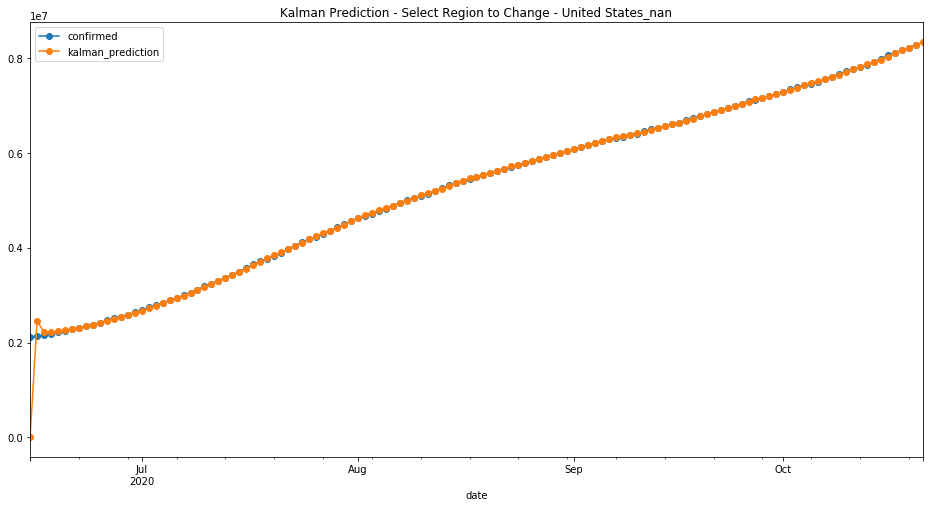

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse         mae
208  Russia_nan  1.617363e+10  127175.575084  12852.0625


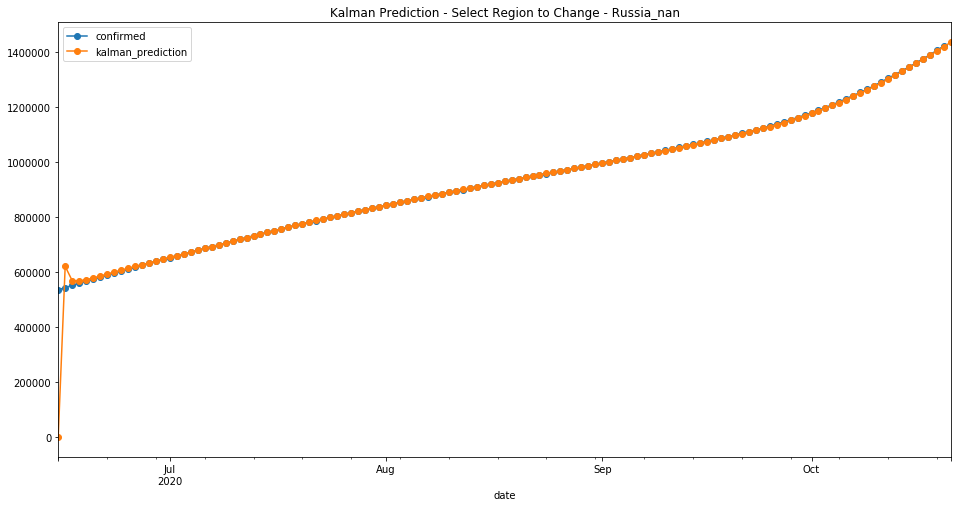

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse         mae
30  Brazil_nan  2.193113e+11  468306.862781  56839.8125


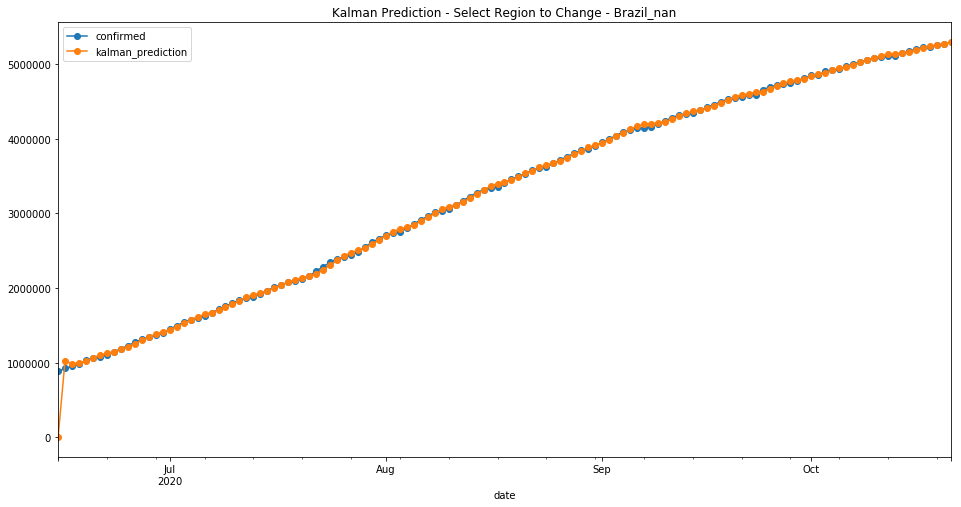

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse         mae
256  United Kingdom_nan  4.750066e+09  68920.723273  7679.96875


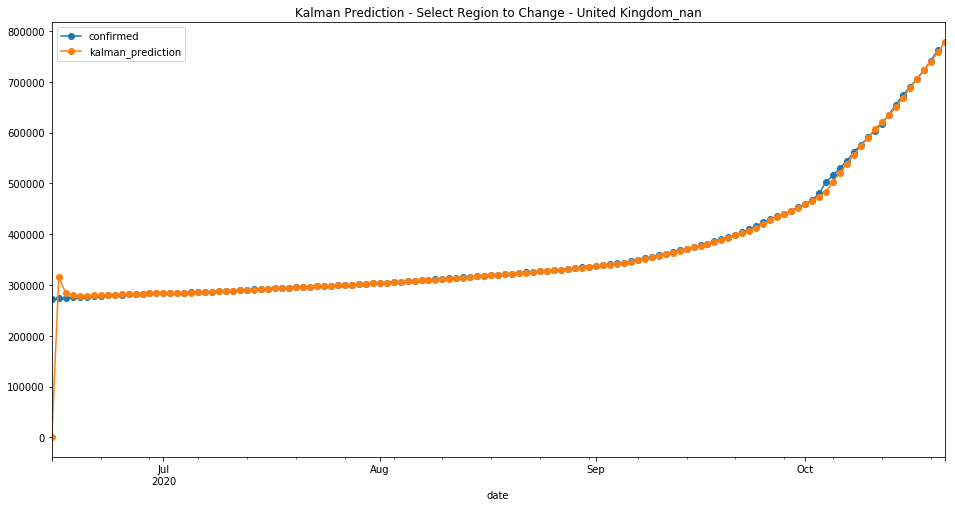

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu0c38jtp
  JVM stdout: /tmp/tmpu0c38jtp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu0c38jtp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    23 days
H2O_cluster_name:           H2O_from_python_unknownUser_292svr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.543 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-10-14
last_train_date= 2020-10-21
first_bootstrap_date= 2020-10-13
boost_bootstrap_date= 2020-10-18
first_test_date= 2020-10-12
last_test_date= 2020-10-22
first_valid_date= 2020-10-20


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   40011.0      39928 2020-10-13  Afghanistan_nan
1   40070.0      39994 2020-10-14  Afghanistan_nan
2   40141.0      40026 2020-10-15  Afghanistan_nan
3   40180.0      40073 2020-10-16  Afghanistan_nan
4   40226.0      40141 2020-10-17  Afghanistan_nan
5   40287.0      40200 2020-10-18  Afghanistan_nan
6   40338.0      40287 2020-10-19  Afghanistan_nan
7   40418.0      40357 2020-10-20  Afghanistan_nan
8   40489.0          0 2020-10-21  Afghanistan_nan
9   15817.0      15752 2020-10-13      Albania_nan
10  15995.0      15955 2020-10-14      Albania_nan
11  16190.0      16212 2020-10-15      Albania_nan
12  16422.0      16501 2020-10-16      Albania_nan
13  16701.0      16774 2020-10-17      Albania_nan
14  17001.0      17055 2020-10-18      Albania_nan
15  17309.0      17350 2020-10-19      Albania_nan
16  17627.0      17651 2020-10-20      Albania_nan
17  17951.0          0 2020-10-21      Albania_nan
18  53513.0      53399 2020-10-13      Algeria_nan
19  53600.0      53584 2020-10-14      Algeria_nan
20  53797.0      53777 2020-10-15      Algeria_nan
21  53994.0      53998 2020-10-16      Algeria_nan
22  54205.0      54203 2020-10-17      Algeria_nan
23  54419.0      54402 2020-10-18      Algeria_nan
24  54634.0      54616 2020-10-19      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175   78062.0      77571 2020-10-17     Bahrain_nan
176   78299.0      77902 2020-10-18     Bahrain_nan
177   78629.0      78224 2020-10-19     Bahrain_nan
178   78938.0      78533 2020-10-20     Bahrain_nan
179   79230.0          0 2020-10-21     Bahrain_nan
180  380972.0     381275 2020-10-13  Bangladesh_nan
181  382429.0     382959 2020-10-14  Bangladesh_nan
182  384077.0     384559 2020-10-15  Bangladesh_nan
183  385687.0     386086 2020-10-16  Bangladesh_nan
184  387283.0     387295 2020-10-17  Bangladesh_nan
185  388573.0     388569 2020-10-18  Bangladesh_nan
186  389938.0     390206 2020-10-19  Bangladesh_nan
187  391581.0     391586 2020-10-20  Bangladesh_nan
188  392849.0          0 2020-10-21  Bangladesh_nan
189     356.0        210 2020-10-13    Barbados_nan
190     259.0        215 2020-10-14    Barbados_nan
191     127.0        218 2020-10-15    Barbados_nan
192     246.0        219 2020-10-16    Barbados_nan
193     342.0        219 2020-10-17    Barbados_nan
194     373.0        221 2020-10-18    Barbados_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date      region
220  2784.0       2775 2020-10-17  Belize_nan
221  2838.0       2813 2020-10-18  Belize_nan
222  2899.0       2833 2020-10-19  Belize_nan
223  2980.0       2886 2020-10-20  Belize_nan
224  2920.0          0 2020-10-21  Belize_nan
225  2551.0       2411 2020-10-13   Benin_nan
226  2549.0       2478 2020-10-14   Benin_nan
227  2343.0       2496 2020-10-15   Benin_nan
228  2572.0       2496 2020-10-16   Benin_nan
229  2656.0       2496 2020-10-17   Benin_nan
230  2651.0       2496 2020-10-18   Benin_nan
231  2650.0       2496 2020-10-19   Benin_nan
232  2647.0       2496 2020-10-20   Benin_nan
233  2643.0          0 2020-10-21   Benin_nan
234   450.0        313 2020-10-13  Bhutan_nan
235   328.0        316 2020-10-14  Bhutan_nan
236   365.0        316 2020-10-15  Bhutan_nan
237   465.0        316 2020-10-16  Bhutan_nan
238   457.0        325 2020-10-17  Bhutan_nan
239   186.0        327 2020-10-18  Bhutan_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [max, min]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  886478517.9581523
# MSE on the validation data =  2185562449220.7246
# R^2 on the training data =  0.9994765240298882
# R^2 on the validation data =  -0.08529429288620682


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1603342677129_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           16502138.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       21.0       23.0       22.94      2174.0      2715.0     2584.396



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 886478517.9581523
RMSE: 29773.789109855537
MAE: 3396.6156092877145
RMSLE: 0.24023585056522354
Mean Residual Deviance: 886478517.9581523

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 2185562449220.7246
RMSE: 1478364.7889545816
MAE: 421668.4863029214
RMSLE: 8.388946326996866
Mean Residual Deviance: 2185562449220.7246

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2020-10-22 04:58:04   0.063 sec              0.0            NaN   
1     2020-10-22 04:58:04   0.370 sec              1.0   56505.911972   
2     2020-10-22 04:58:05   0.513 sec              2.0   51443.312773   
3     2020-10-22 04:58:05   0.595 sec              3.0   47494.447401   
4     2020-10-22 04:58:05   0.699 sec              4.0   44489.897338   
5     2020-10-22 04:58:05   0.952 sec              5.0   42920.420019   
6     2020-10-22 04:58:05   1.097 sec              6.0   41736.318168   
7     2020-10-22 04:58:05   1.232 sec              7.0   42851.999660   
8     2020-10-22 04:58:05   1.320 sec              8.0   50234.693233   
9     2020-10-22 04:58:05   1.448 sec              9.0   49574.237610   
10    2020-10-22 04:58:06   1.540 sec             10.0   49369.529774   
11    2020-10-22 04:58:06   1.579 sec             11.0   42498.174456   
12    2020-10-22 04:58:06   1.615 sec             12.0   40673.888673   
13    2020-10-22 04:58:06   1.667 sec             13.0   39346.660436   
14    2020-10-22 04:58:06   1.704 sec             14.0   38402.251465   
15    2020-10-22 04:58:06   1.741 sec             15.0   38631.265704   
16    2020-10-22 04:58:06   1.779 sec             16.0   38564.245952   
17    2020-10-22 04:58:06   1.819 sec             17.0   39057.365427   
18    2020-10-22 04:58:06   1.856 sec             18.0   38108.413078   
19    2020-10-22 04:58:06   1.911 sec             19.0   38567.253450   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1    8960.092155       3.192918e+09     1.480255e+06   421737.713682   
2    8718.891945       2.646414e+09     1.481261e+06   423576.791009   
3    8925.505934       2.255723e+09     1.481444e+06   424529.258109   
4    8495.435989       1.979351e+09     1.481416e+06   423914.353210   
5    7886.241355       1.842162e+09     1.479665e+06   422992.330074   
6    7785.962024       1.741920e+09     1.478986e+06   422439.831368   
7    7742.129827       1.836294e+09     1.499753e+06   428789.113180   
8    8133.821423       2.523524e+09     1.496060e+06   429561.783154   
9    7806.109034       2.457605e+09     1.490195e+06   426982.502061   
10   7556.113052       2.437350e+09     1.489276e+06   426593.177981   
11   7170.816975       1.806095e+09     1.489422e+06   426320.678345   
12   6925.871265       1.654365e+09     1.489034e+06   425939.984429   
13   6599.590086       1.548160e+09     1.488340e+06   425581.602765   
14   6478.420776       1.474733e+09     1.487523e+06   425477.582243   
15   6304.000777       1.492375e+09     1.486979e+06   425420.004044   
16   6185.167630       1.487201e+09     1.486492e+06   425081.425244   
17   6113.979108       1.525478e+09     1.494660e+06   427444.266038   
18   6022.452464       1.452251e+09     1.493824e+06   427212.891649   
19   5917.807017       1.487433e+09     1.493102e+06   426906.025952   

    validation_deviance  
0                   NaN  
1          2.191155e+12  
2          2.194133e+12  
3          2.194677e+12  
4          2.194595e+12  
5          2.189409e+12  
6          2.187398e+12  
7          2.249258e+12  
8          2.238194e+12  
9          2.220681e+12  
10         2.217942e+12  
11         2.218377e+12  
12         2.217221e+12  
13         2.215156e+12  
14         2.212724e+12  
15         2.211107e+12  
16         2.209659e+12  
17         2.234007e+12  
18         2.231509e+12  
19         2.229352e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0           last_day         1.233863e+18           1.000000    0.301204
1  kalman_prediction         1.201447e+18           0.973728    0.293291
2       7_day_change         6.193970e+17           0.501998    0.151204
3             region         4.394062e+17           0.356122    0.107265
4       3_day_change         3.327686e+17           0.269697    0.081234
5       1_day_change         1.402197e+17           0.113643    0.034230
6  7_day_change_rate         3.944957e+16           0.031972    0.009630
7      infected_rate         3.330975e+16           0.026996    0.008131
8  3_day_change_rate         3.184708e+16           0.025811    0.007774
9  1_day_change_rate         2.473220e+16           0.020045    0.006037

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0           last_day         1.233863e+18           1.000000    0.301204
1  kalman_prediction         1.201447e+18           0.973728    0.293291
2       7_day_change         6.193970e+17           0.501998    0.151204
3             region         4.394062e+17           0.356122    0.107265
4       3_day_change         3.327686e+17           0.269697    0.081234
5       1_day_change         1.402197e+17           0.113643    0.034230
6  7_day_change_rate         3.944957e+16           0.031972    0.009630
7      infected_rate         3.330975e+16           0.026996    0.008131
8  3_day_change_rate         3.184708e+16           0.025811    0.007774
9  1_day_change_rate         2.473220e+16           0.020045    0.006037

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


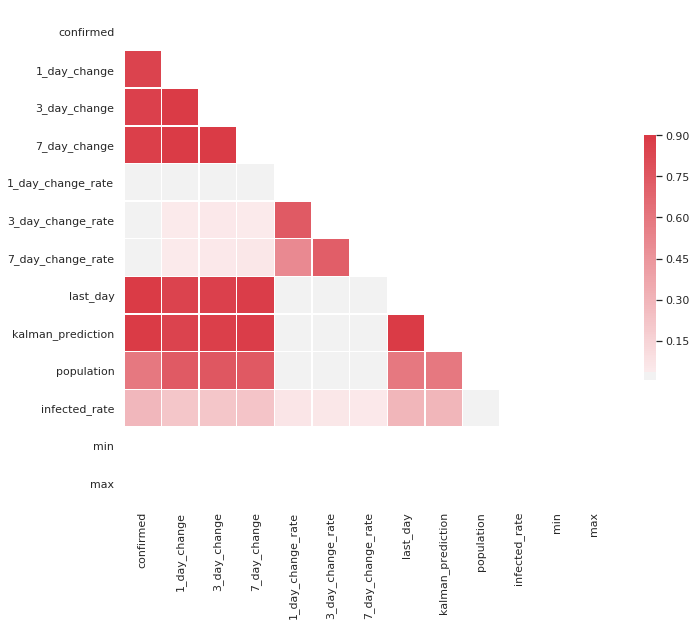

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.849056
3_day_change         0.865799
7_day_change         0.875025
1_day_change_rate    0.018839
3_day_change_rate    0.020676
7_day_change_rate    0.022082
last_day             0.988570
kalman_prediction    0.989048
population           0.592470
infected_rate        0.287052
min                       NaN
max                       NaN
Name: confirmed, dtype: float64


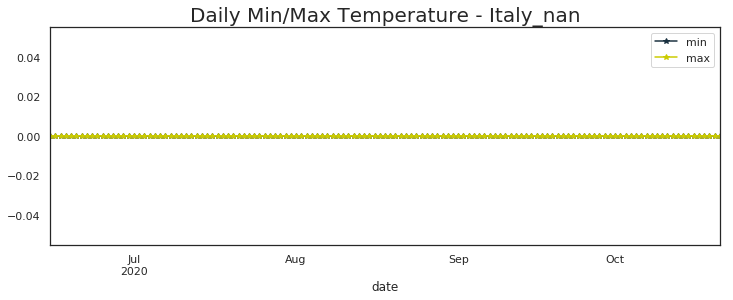

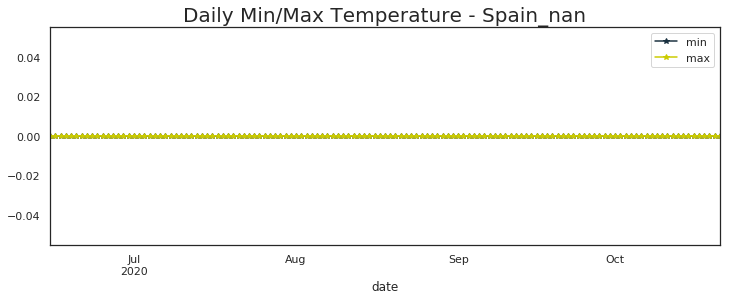

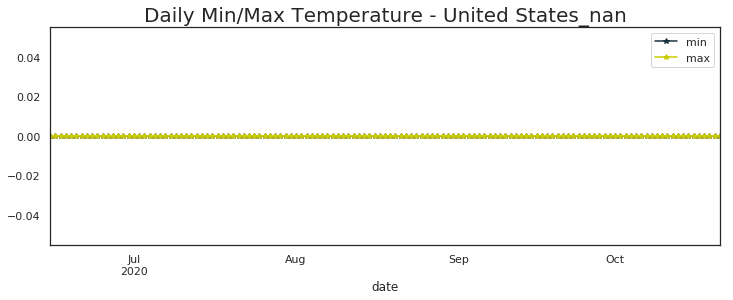

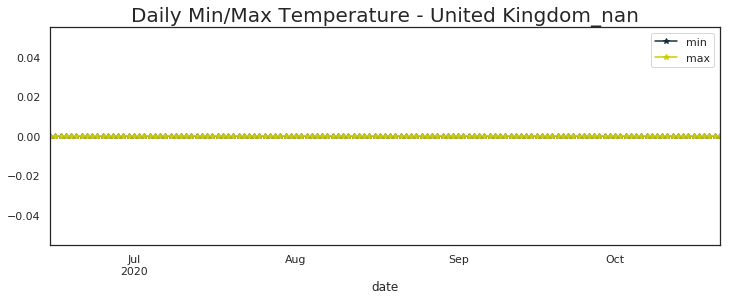

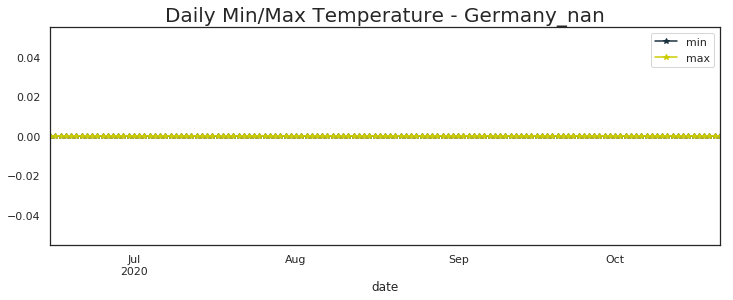

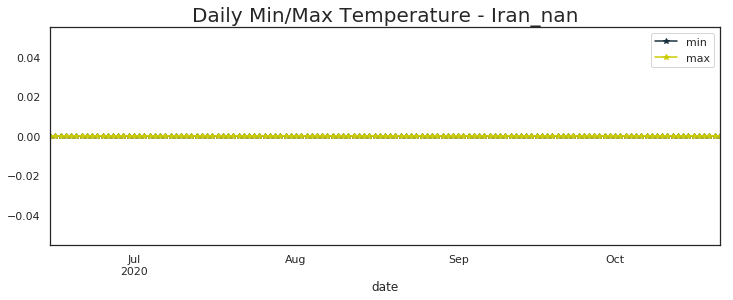

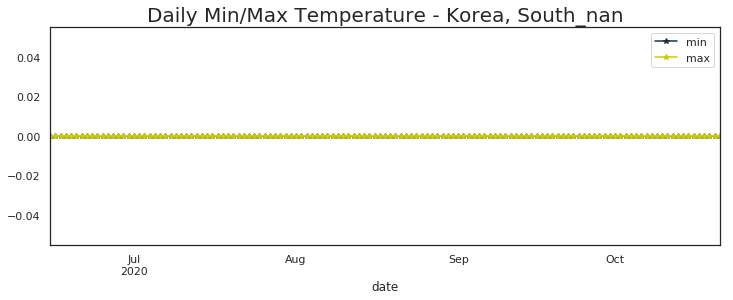

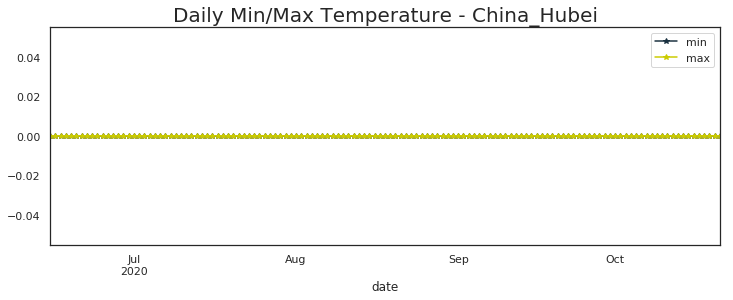

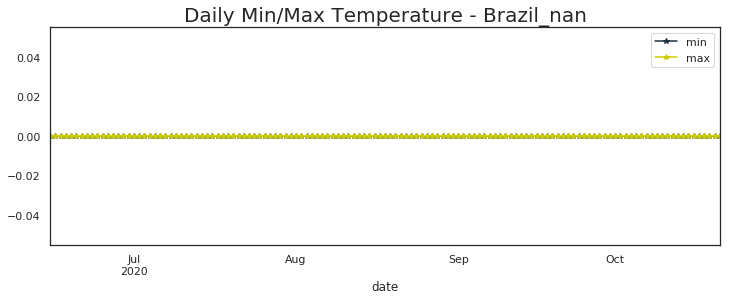

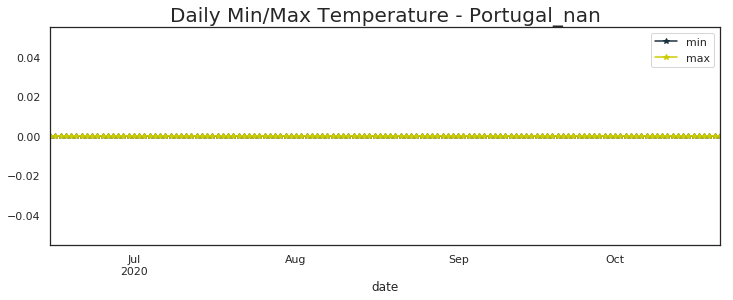

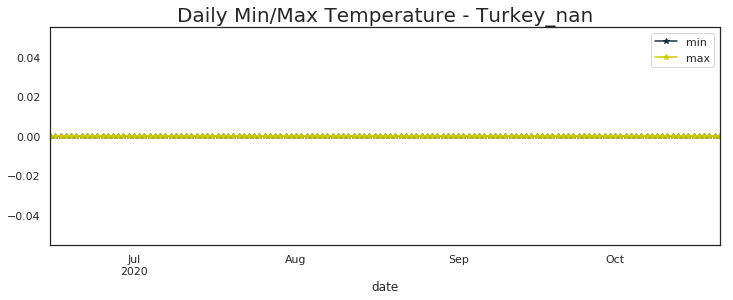

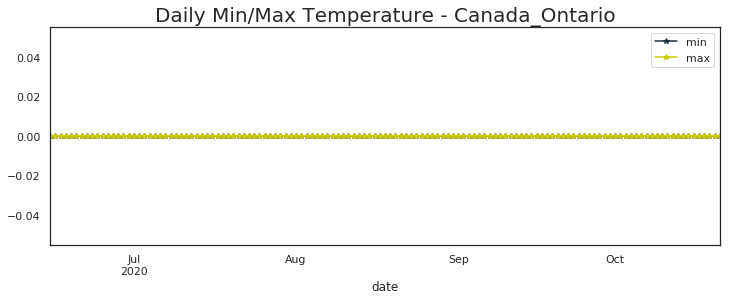

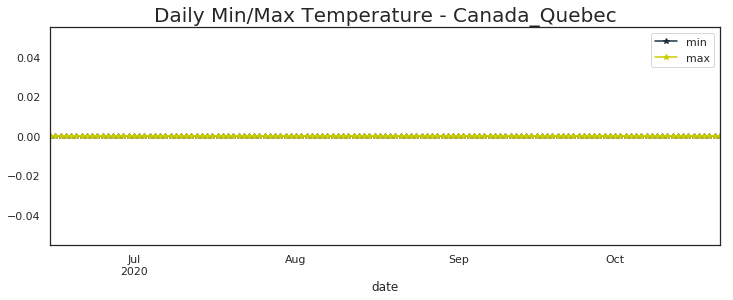

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                            min  max
region                              
United States_nan           0.0  0.0
India_nan                   0.0  0.0
Brazil_nan                  0.0  0.0
Russia_nan                  0.0  0.0
Argentina_nan               0.0  0.0
Spain_nan                   0.0  0.0
Colombia_nan                0.0  0.0
France_nan                  0.0  0.0
Peru_nan                    0.0  0.0
Mexico_nan                  0.0  0.0
United Kingdom_nan          0.0  0.0
South Africa_nan            0.0  0.0
Iran_nan                    0.0  0.0
Chile_nan                   0.0  0.0
Iraq_nan                    0.0  0.0
Italy_nan                   0.0  0.0
Bangladesh_nan              0.0  0.0
Germany_nan                 0.0  0.0
Indonesia_nan               0.0  0.0
Philippines_nan             0.0  0.0
Turkey_nan                  0.0  0.0
Saudi Arabia_nan            0.0  0.0
Pakistan_nan                0.0  0.0
Ukraine_nan                 0.0  0.0
Is

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

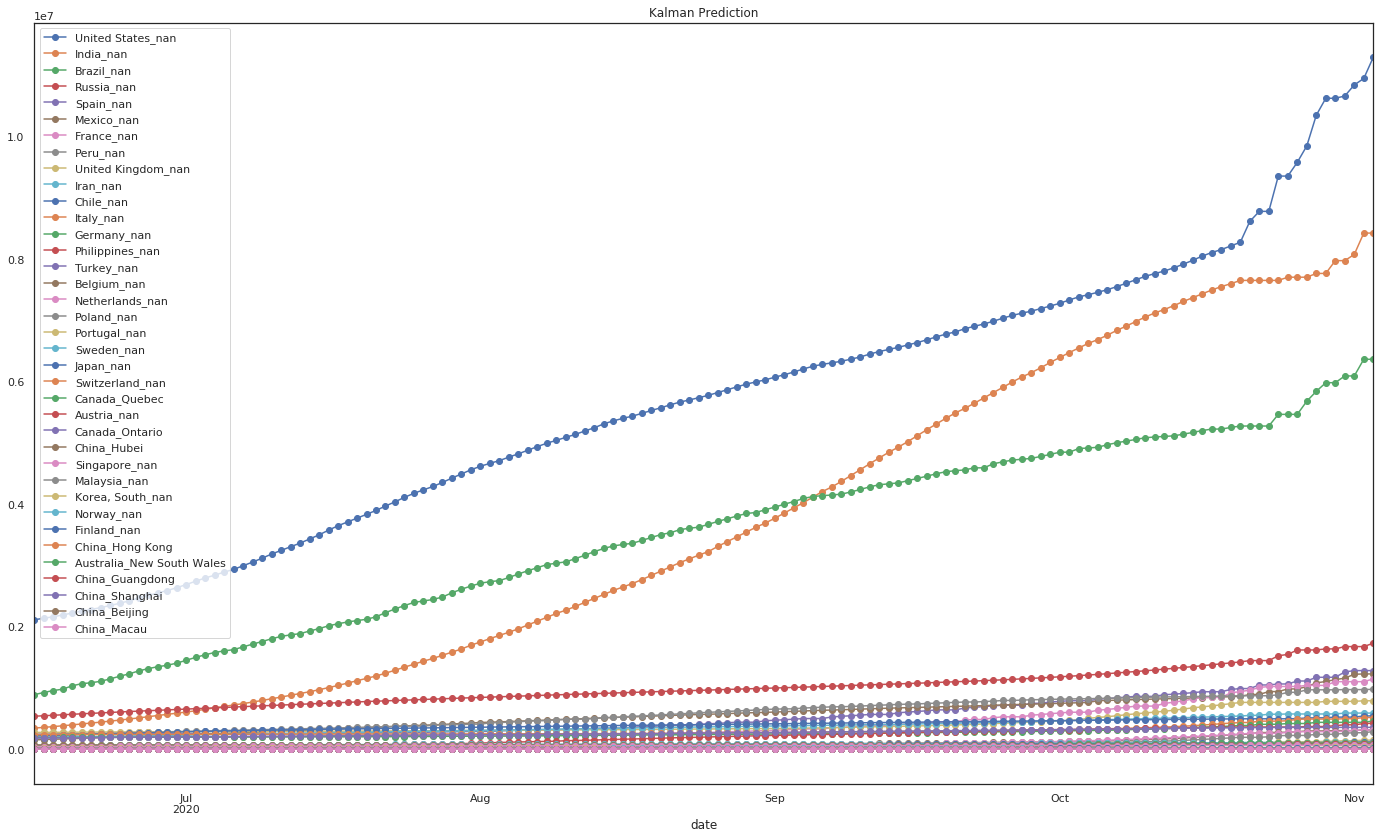

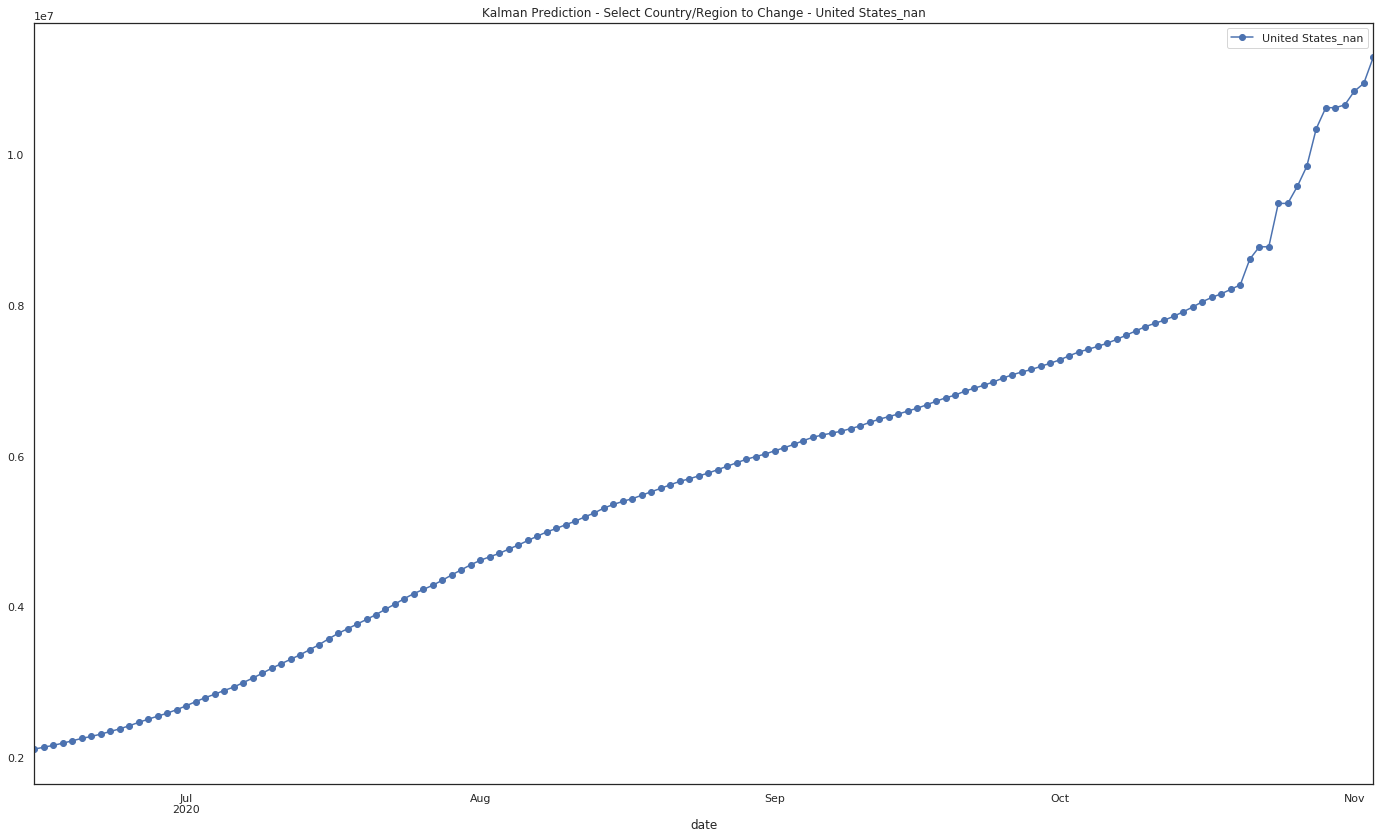

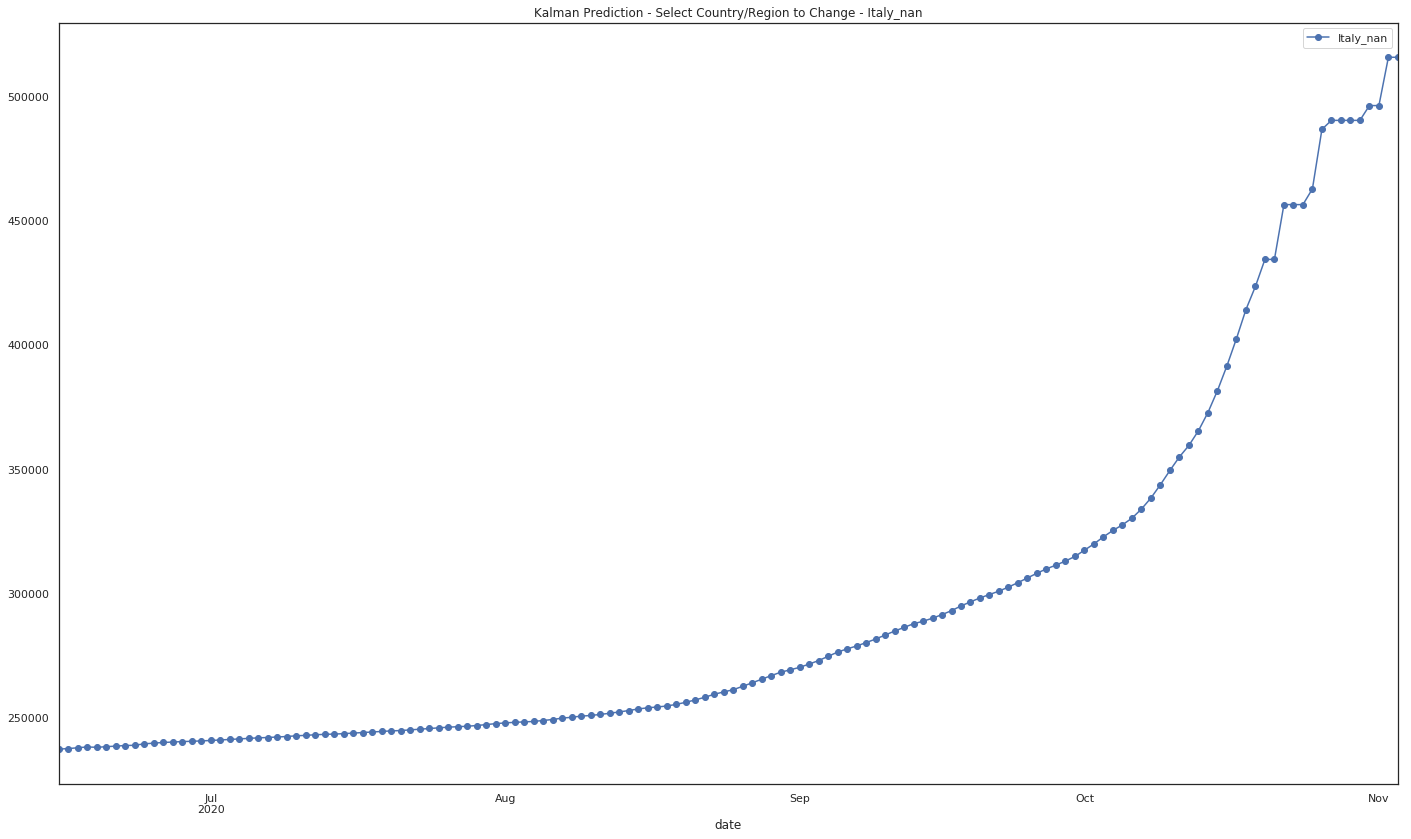

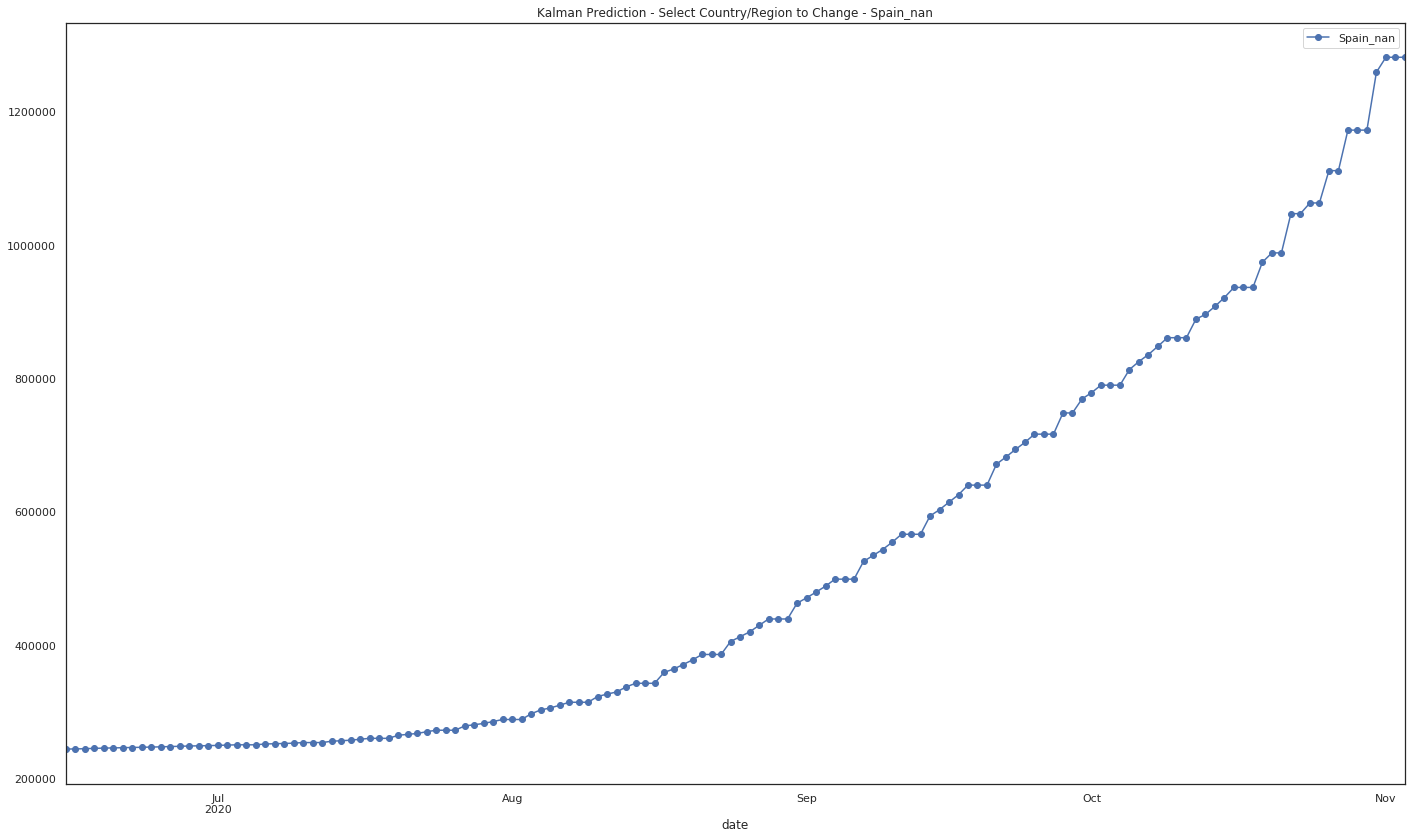

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


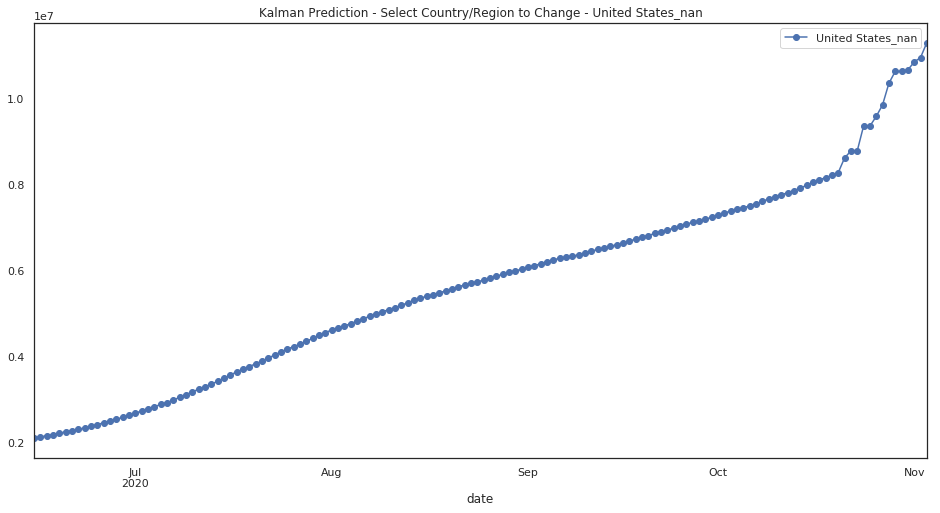

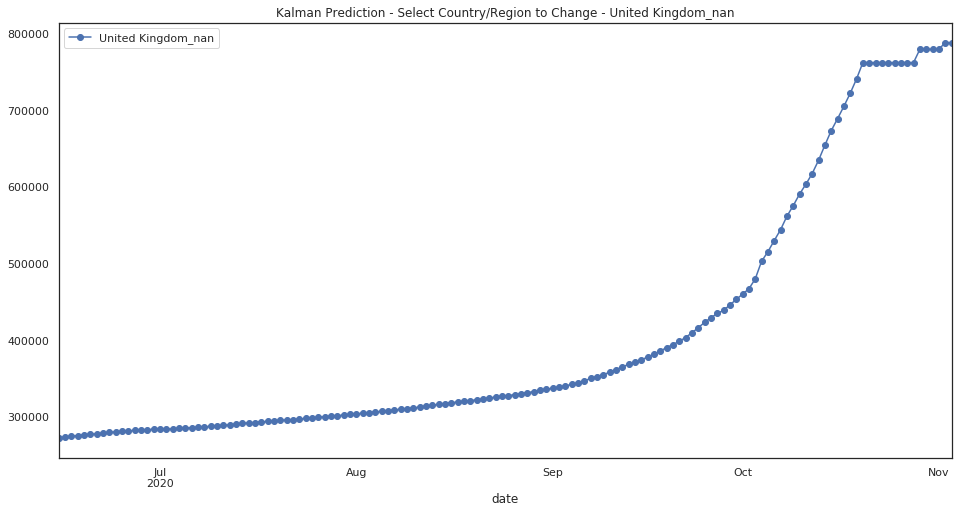

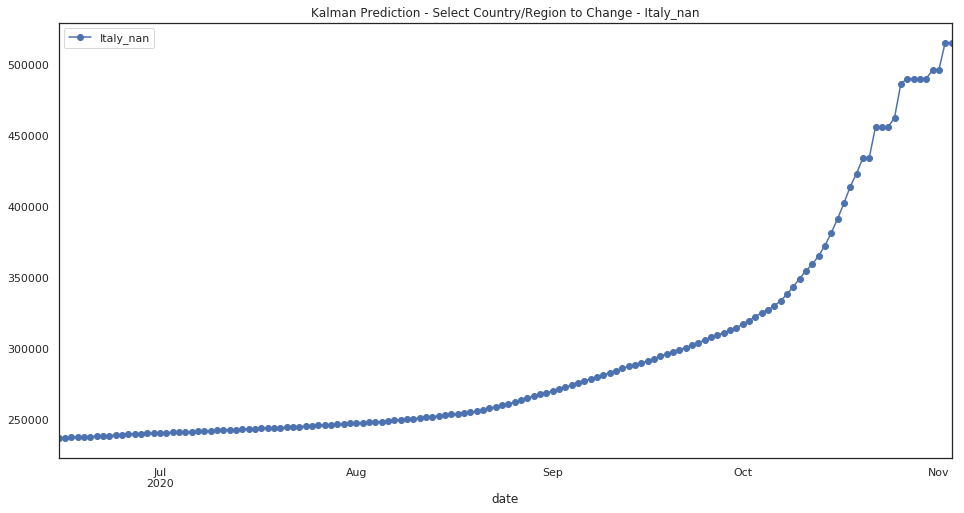

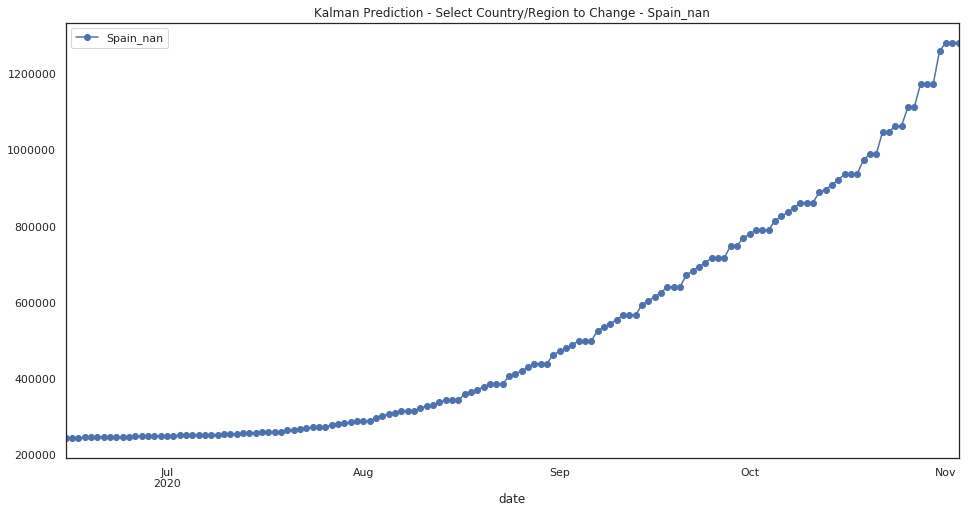

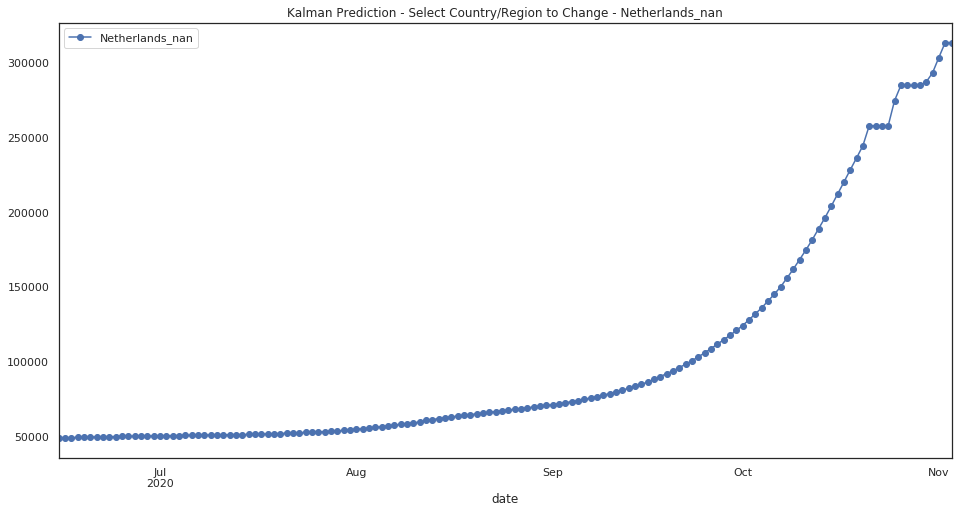

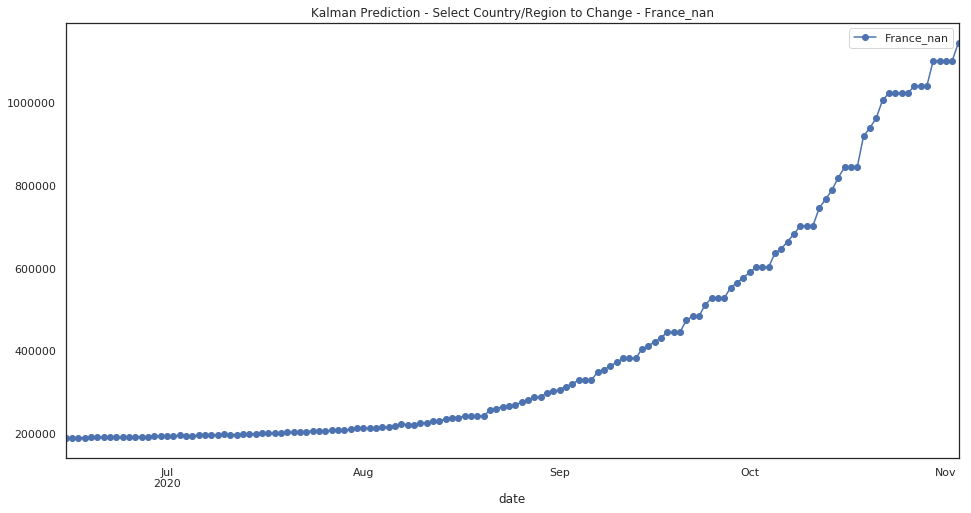

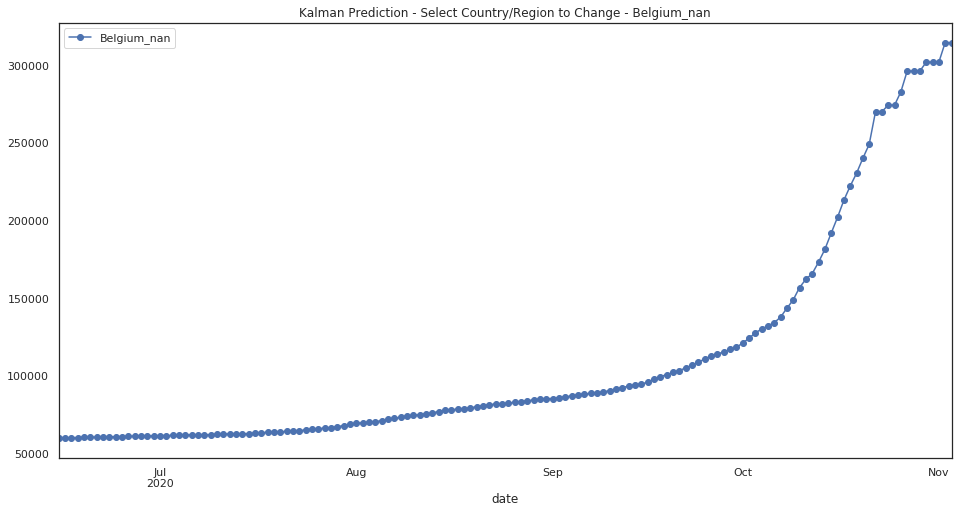

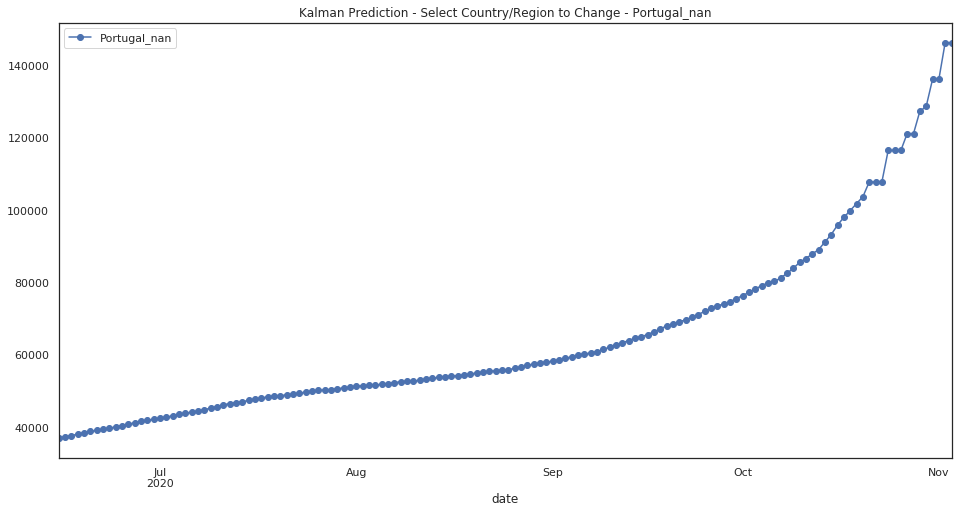

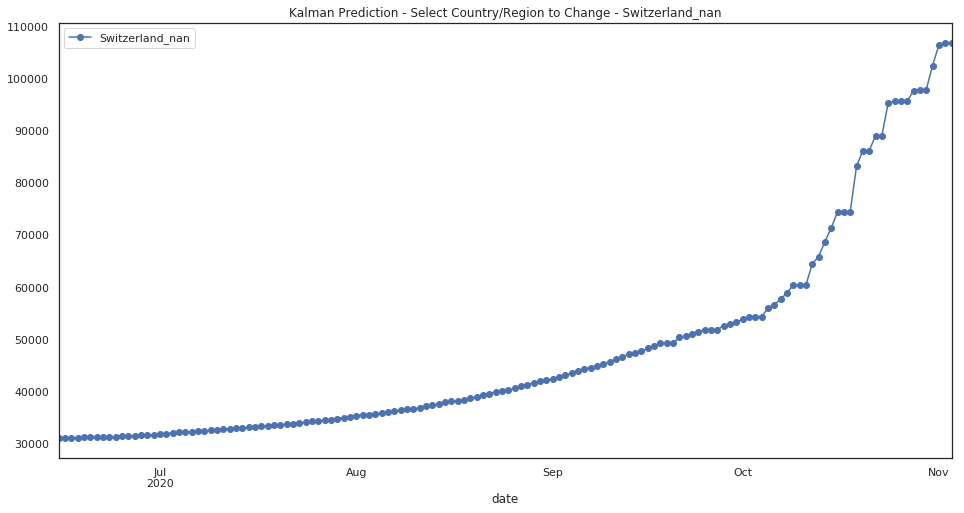

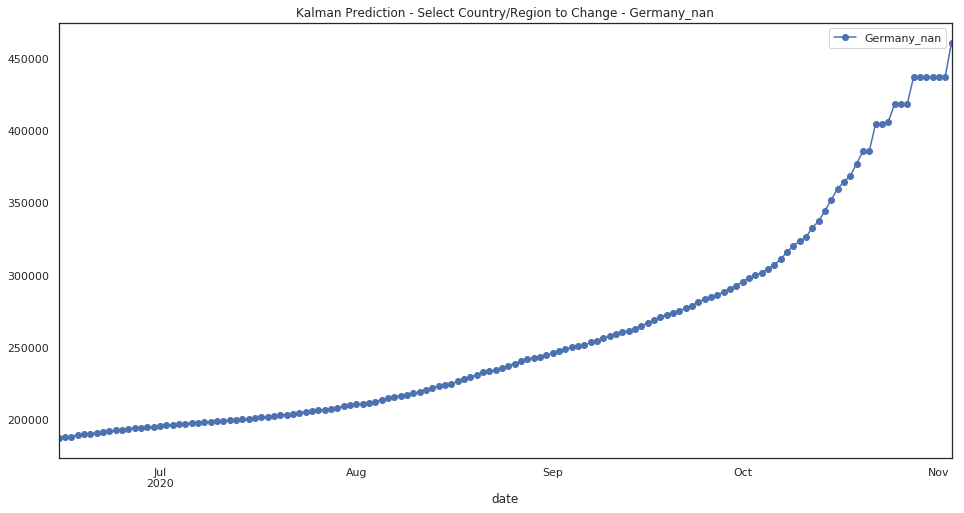

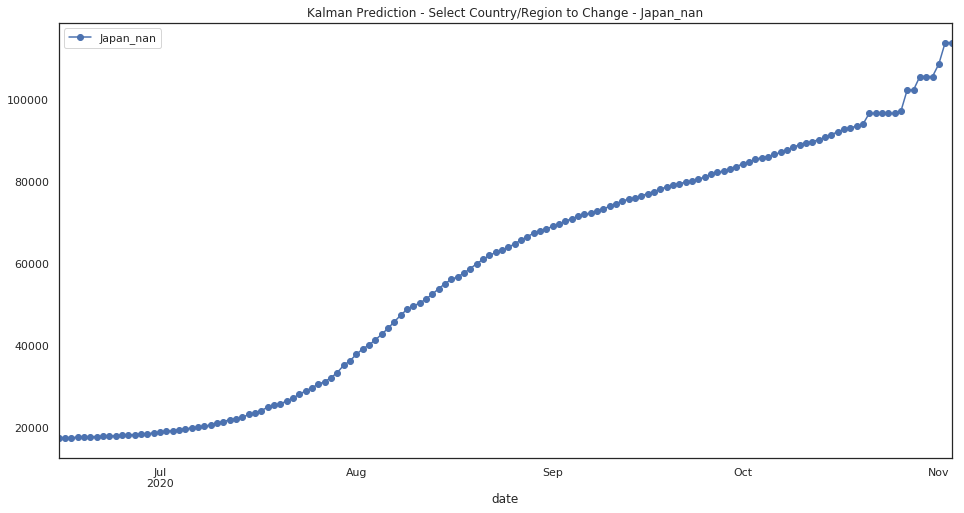

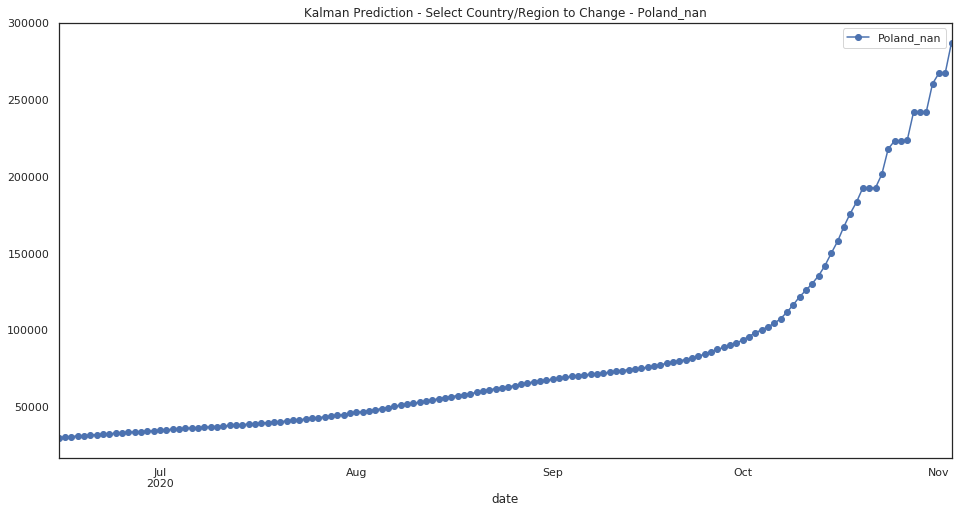

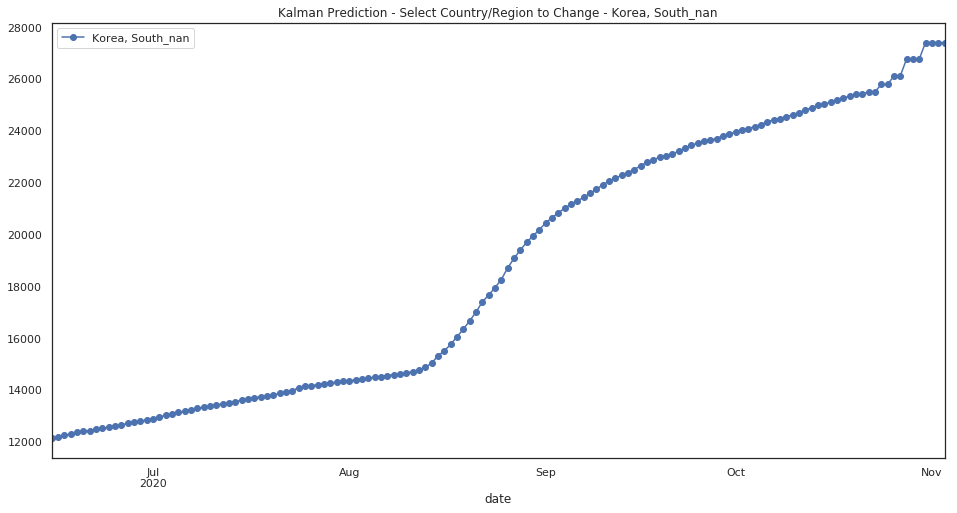

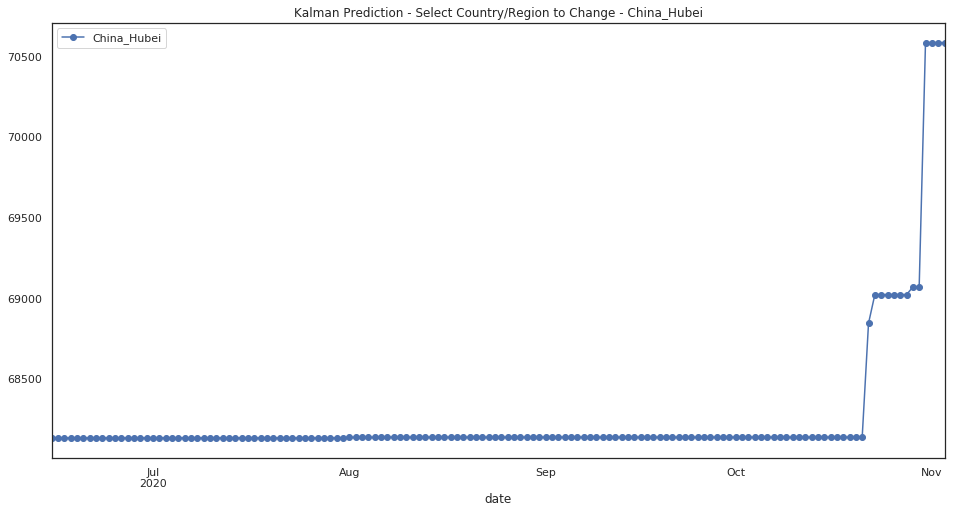

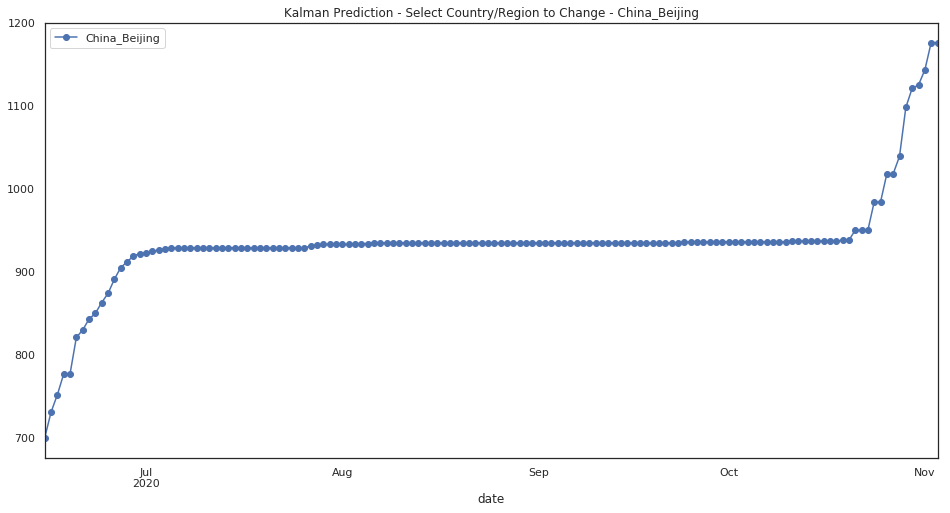

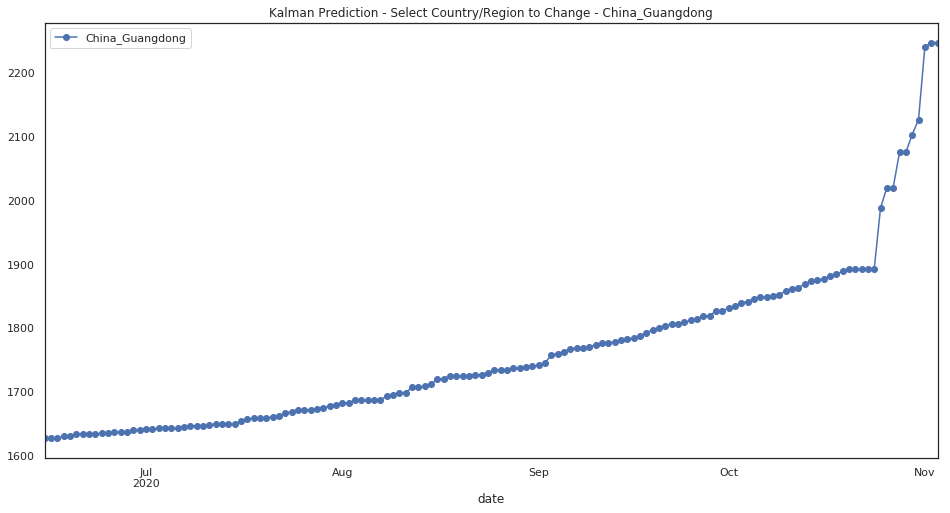

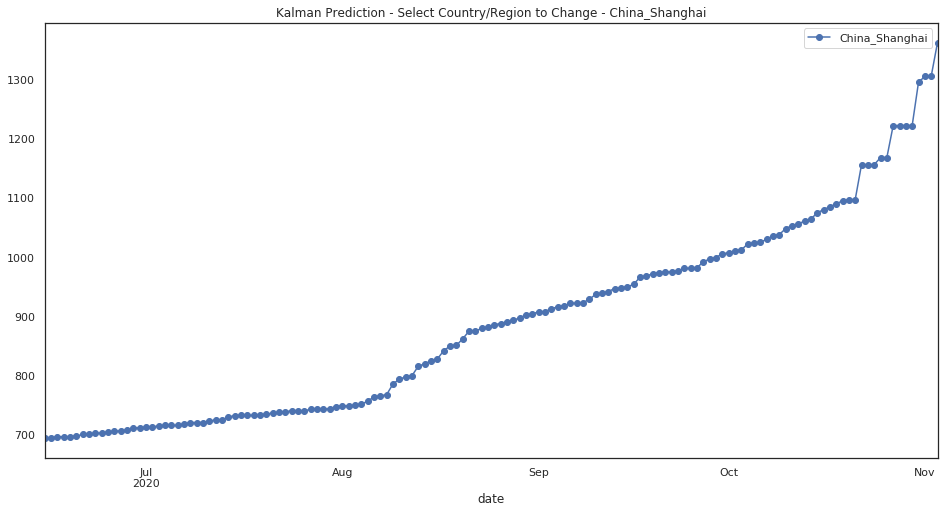

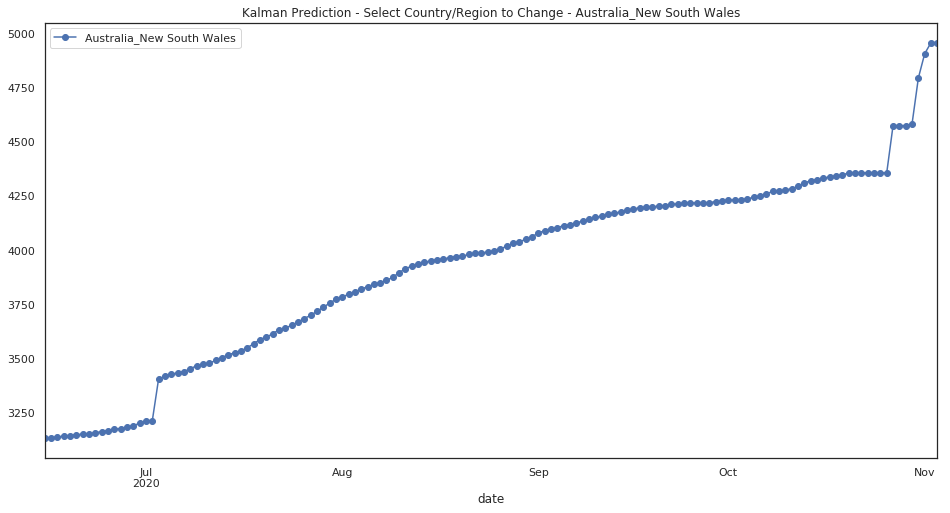

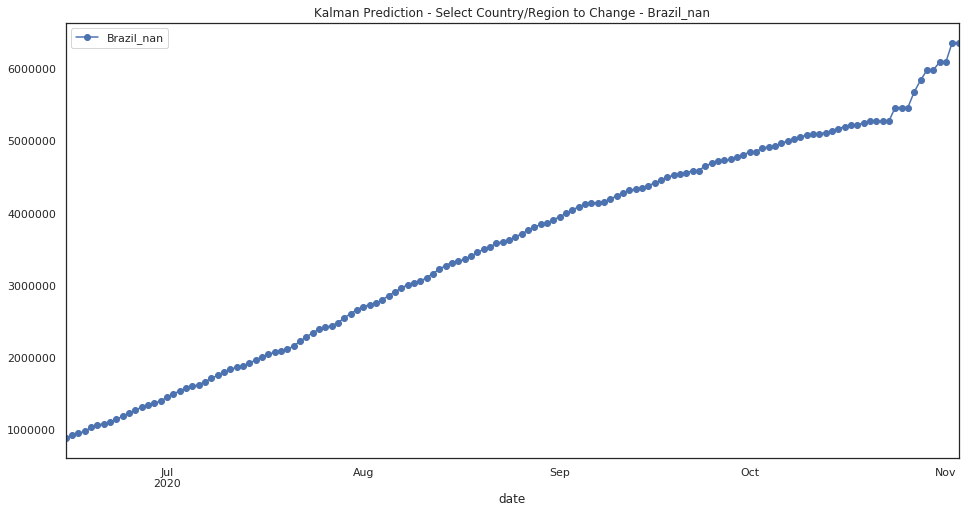

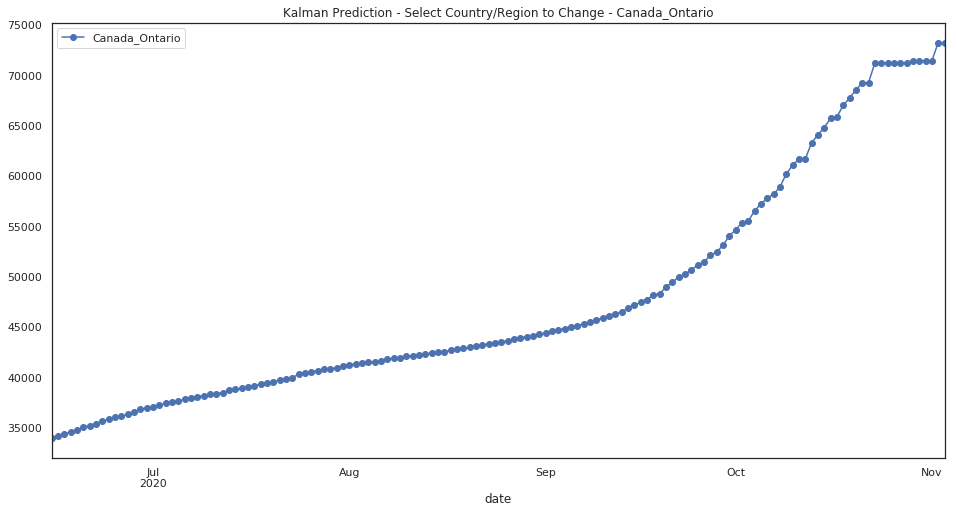

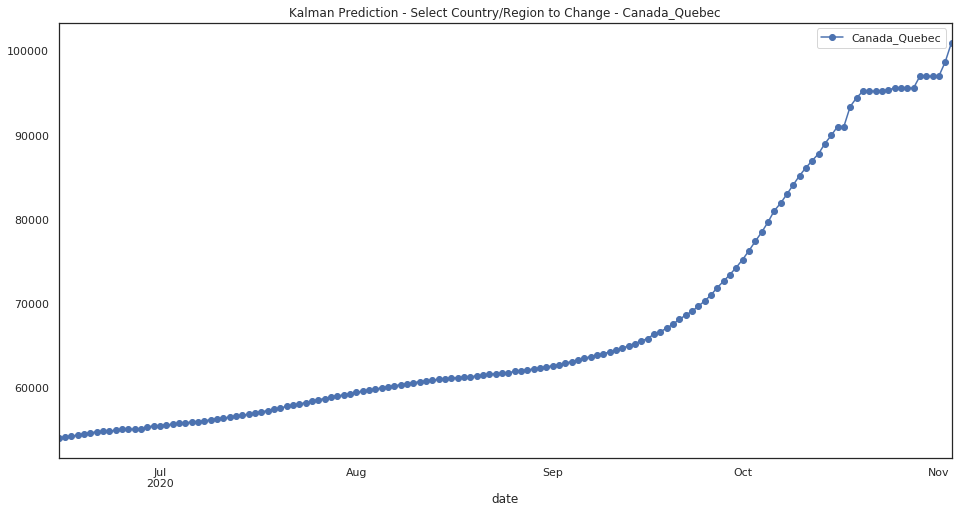

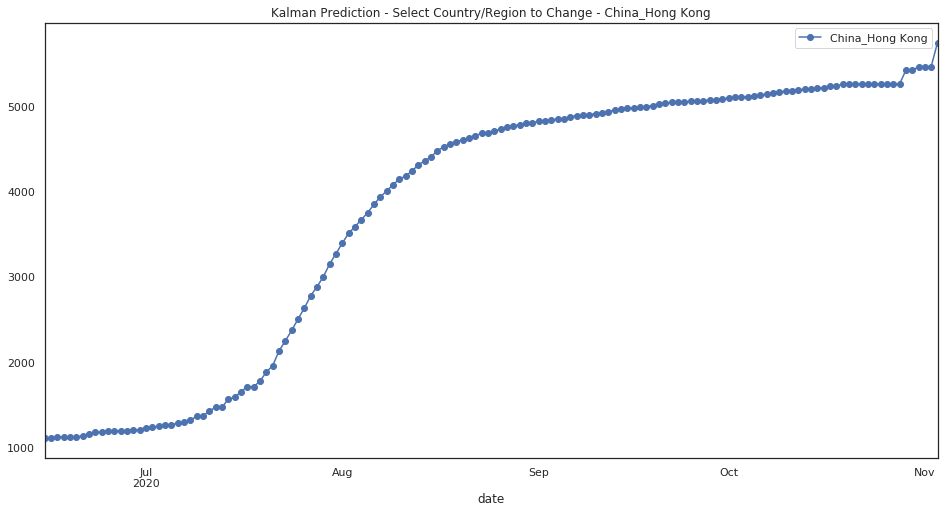

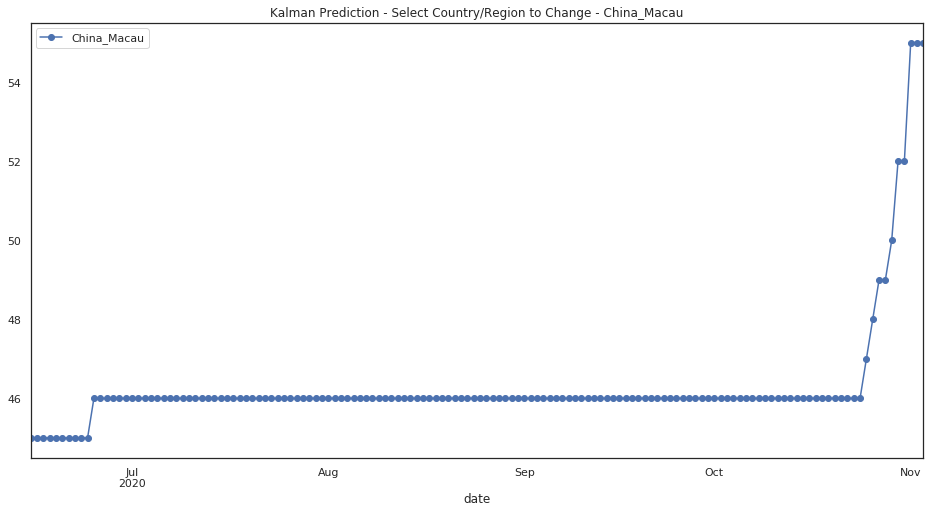

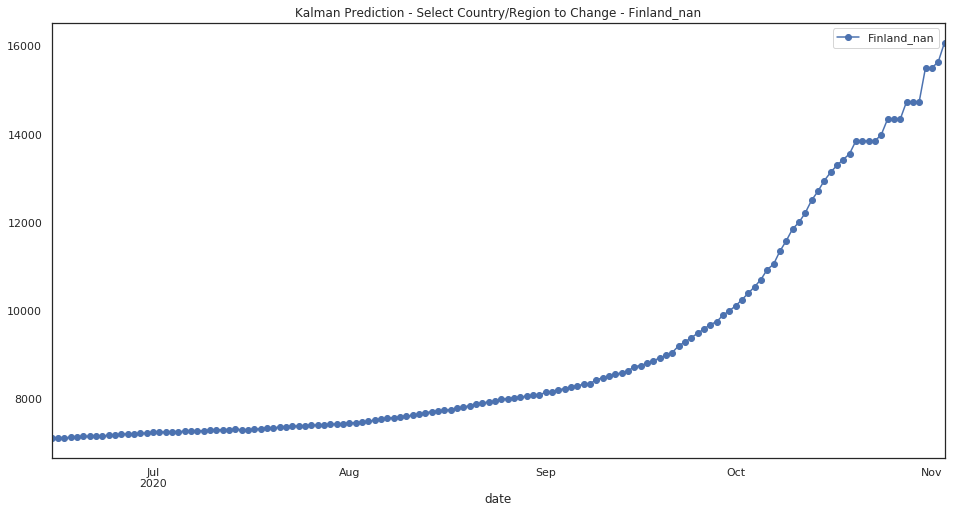

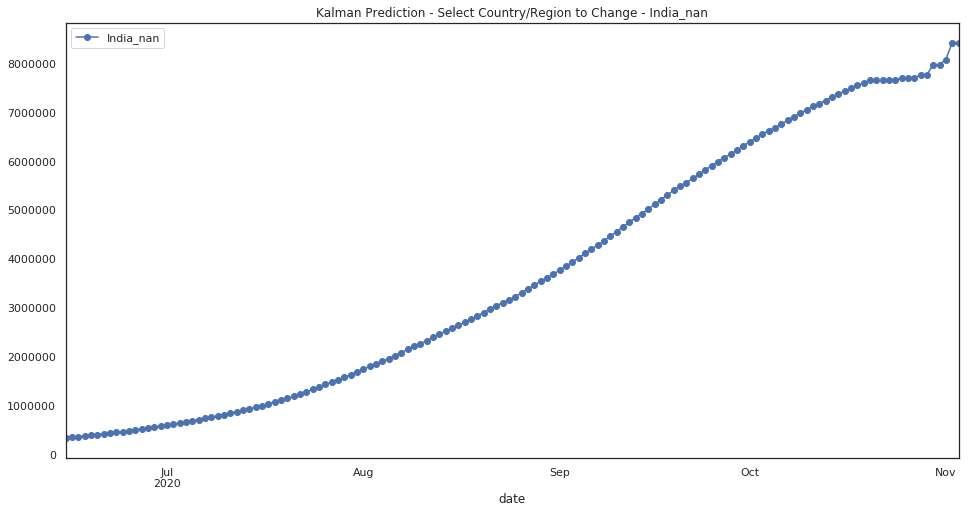

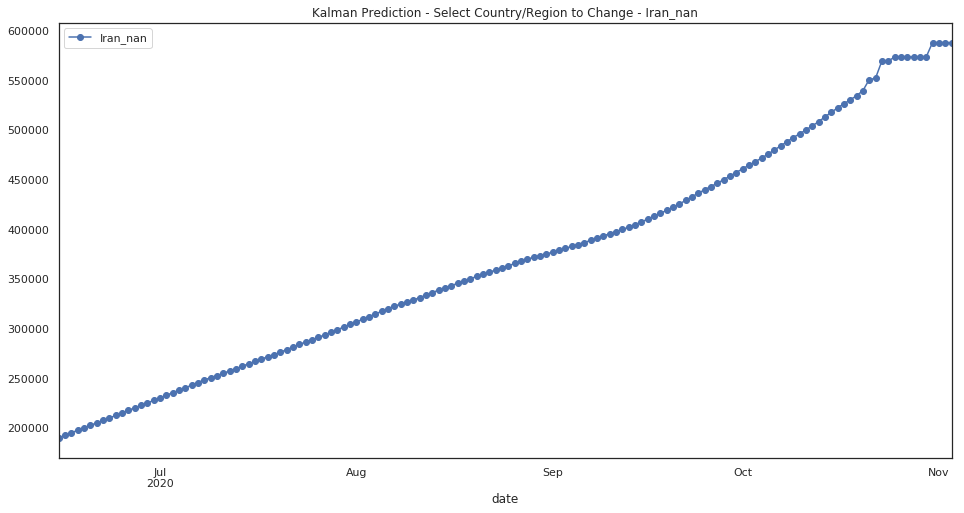

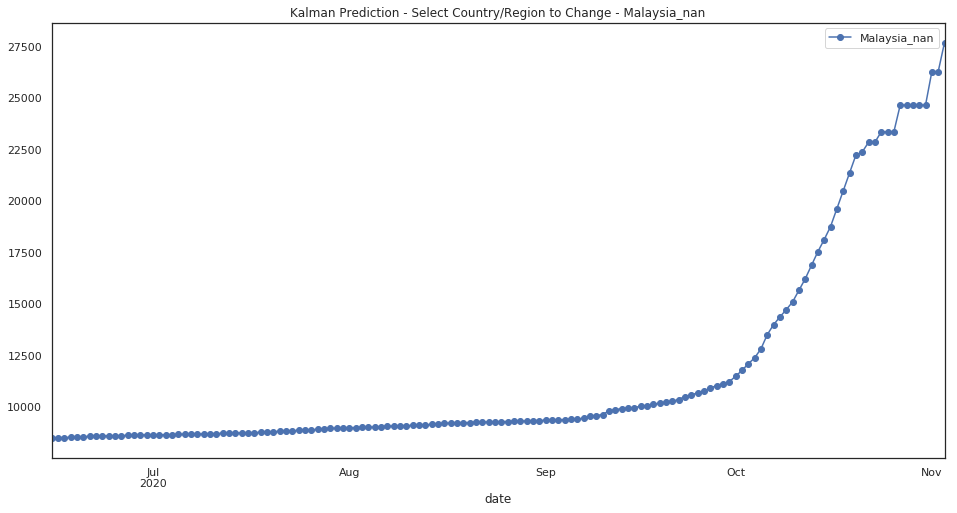

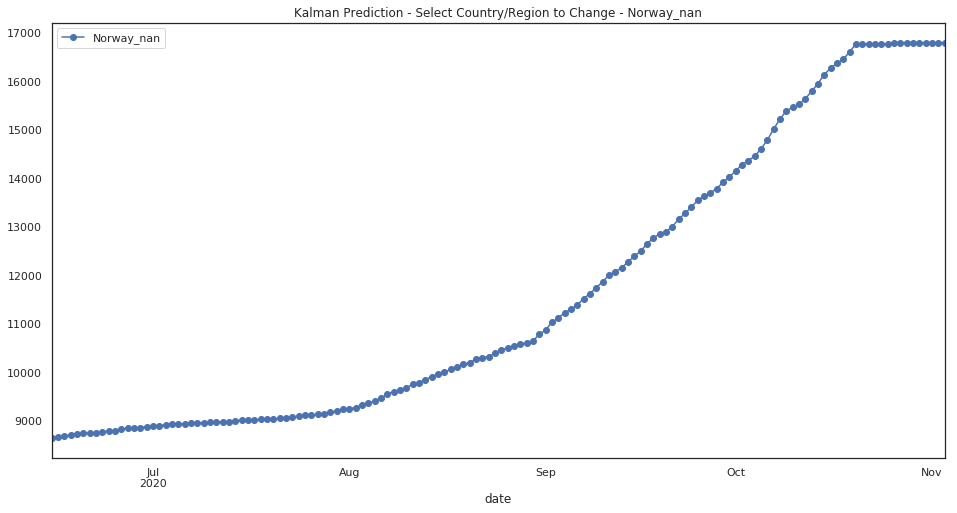

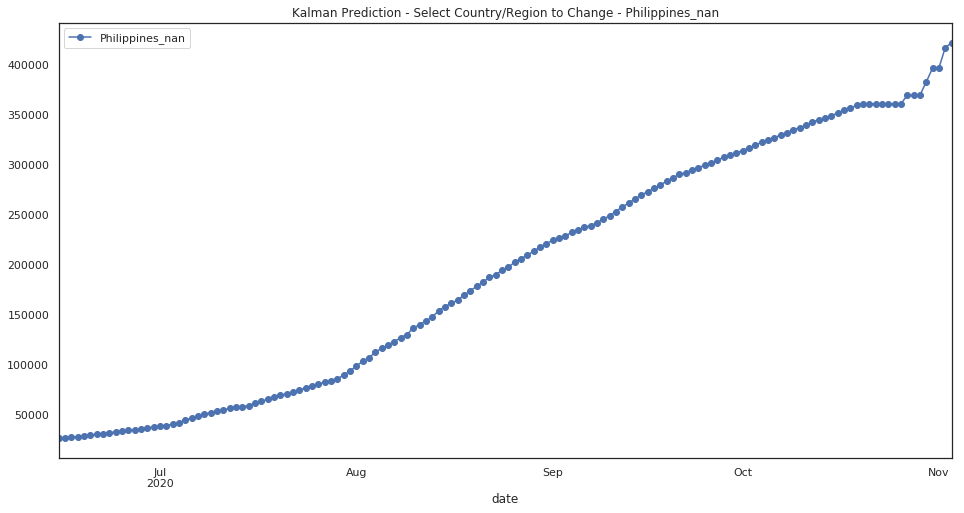

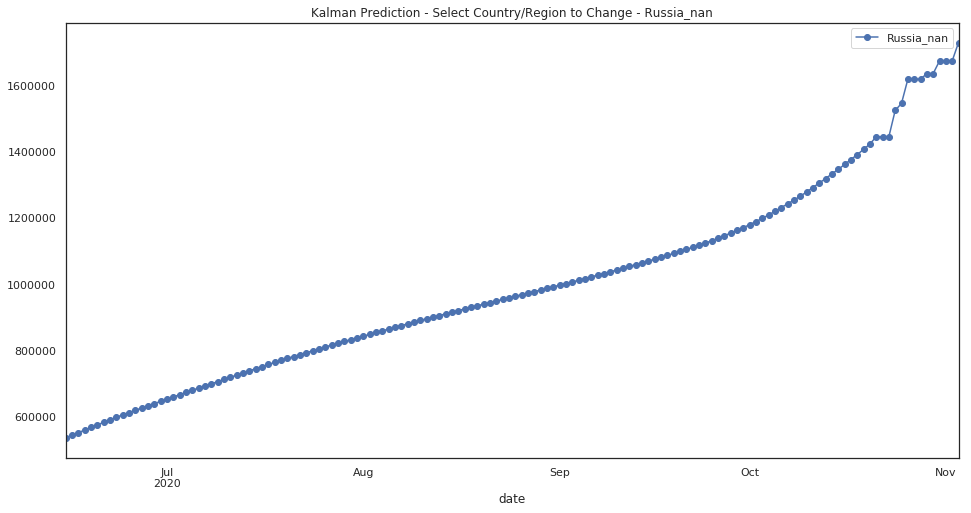

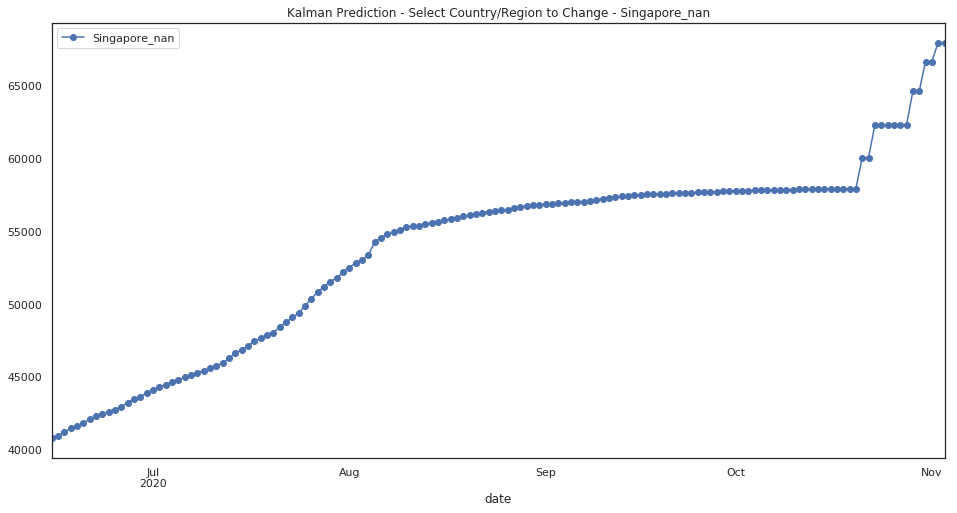

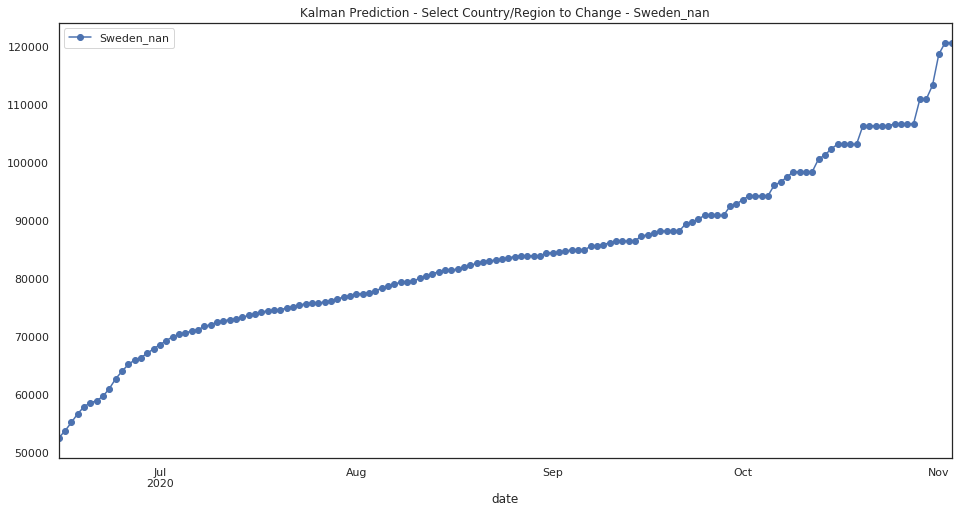

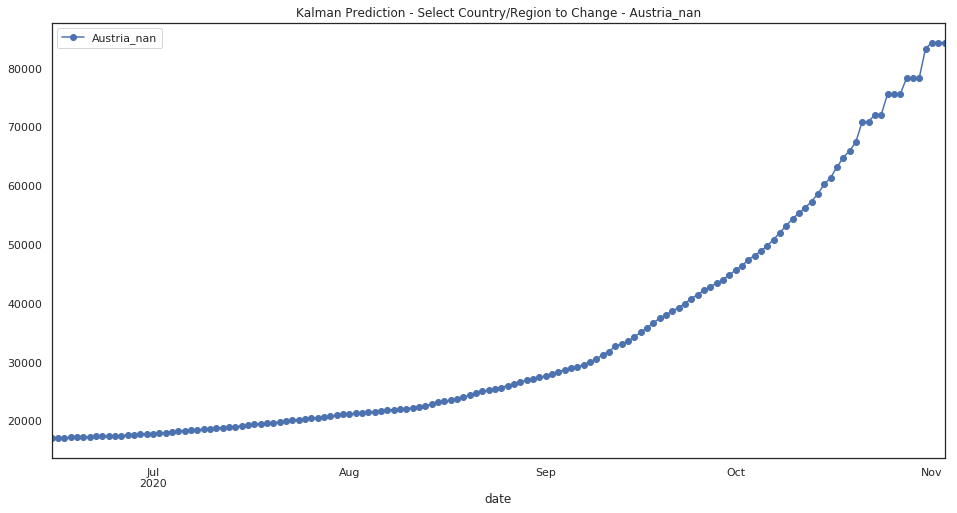

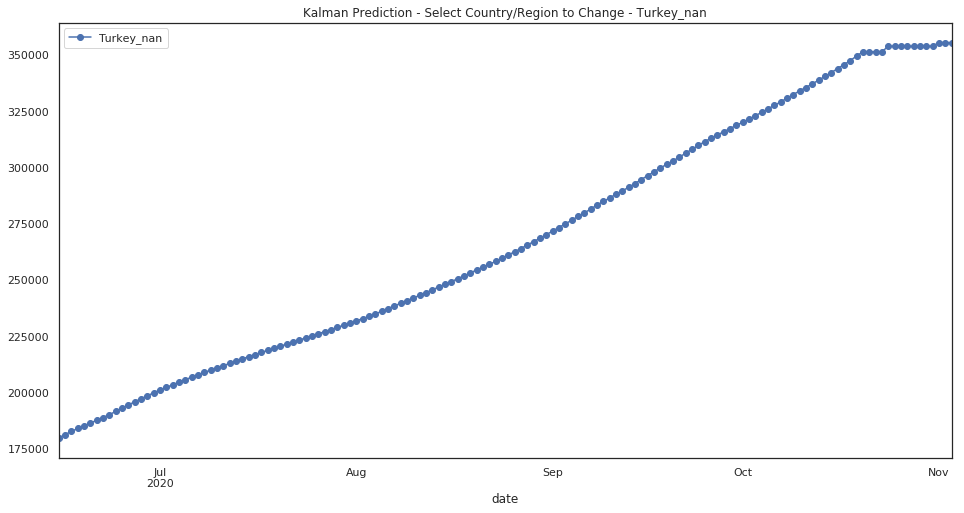

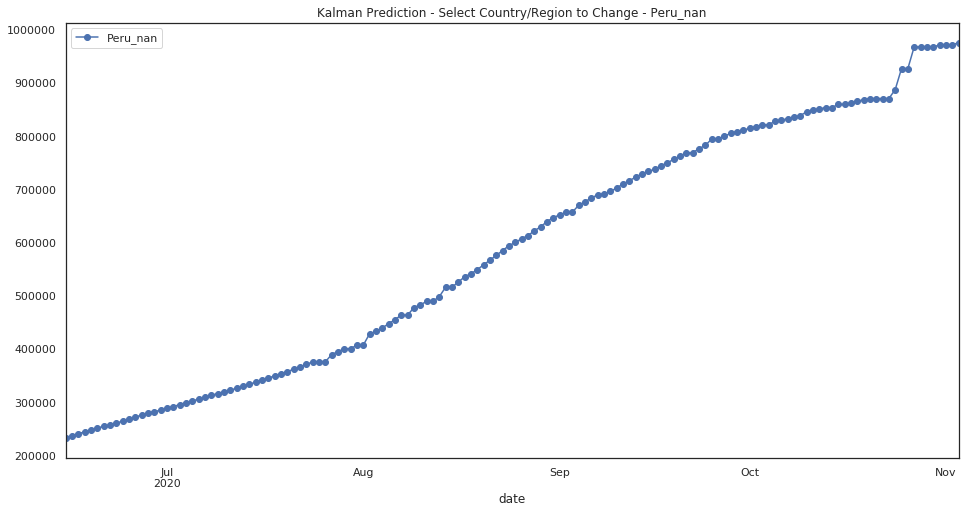

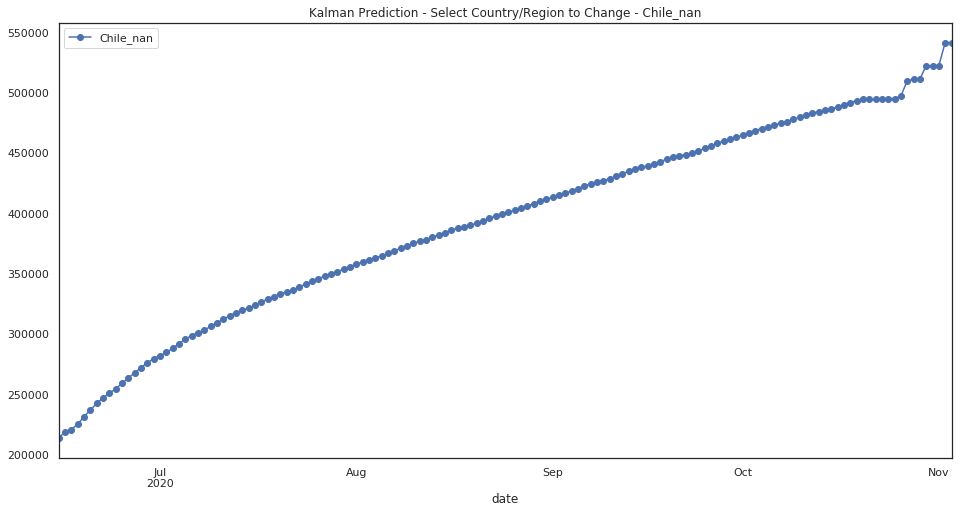

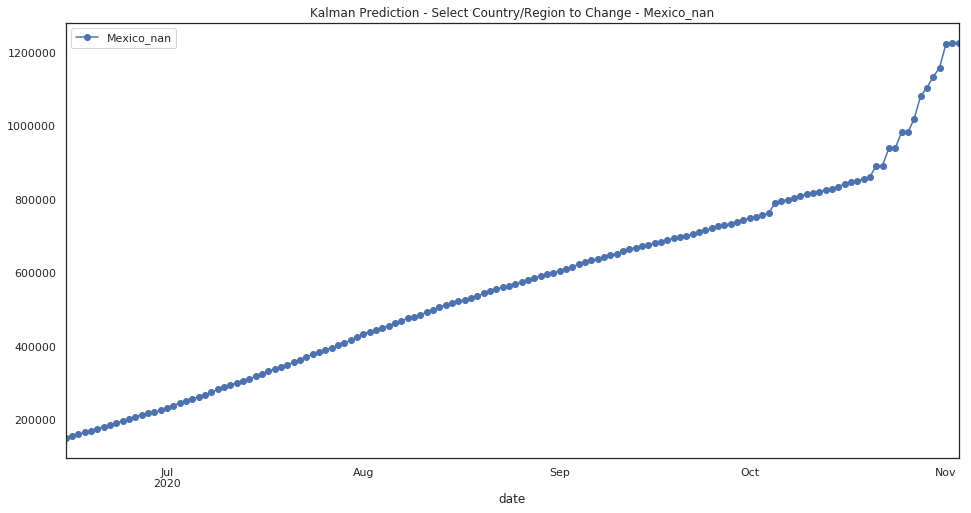

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-11-03 00:00:00
dtype: object


0  pred_confirmed
United States_nan                           NaN      11293824.0
India_nan                                   NaN       8423682.0
Brazil_nan                                  NaN       6363644.0
Russia_nan                                  NaN       1728975.0
Argentina_nan                               NaN       1297022.0
Spain_nan                                   NaN       1281743.0
Colombia_nan                                NaN       1272568.0
Mexico_nan                                  NaN       1227107.0
France_nan                                  NaN       1145020.0
Peru_nan                                    NaN        976078.0
South Africa_nan                            NaN        847923.0
United Kingdom_nan                          NaN        788707.0
Iran_nan                                    NaN        588126.0
Chile_nan                                   NaN        541440.0
Indonesia_nan                               NaN        534401.0
Italy_nan                                   NaN        515831.0
Iraq_nan                                    NaN        501417.0
Saudi Arabia_nan                            NaN        482444.0
Bangladesh_nan                              NaN        465210.0
Germany_nan                                 NaN        460815.0
Philippines_nan                             NaN        422115.0
Ukraine_nan                                 NaN        405049.0
Israel_nan                                  NaN        404151.0
Turkey_nan                                  NaN        355504.0
Pakistan_nan                                NaN        350596.0
Belgium_nan                                 NaN        314640.0
Netherlands_nan                             NaN        313450.0
Poland_nan                                  NaN        287028.0
Czechia_nan                                 NaN        243980.0
Morocco_nan                                 NaN        229003.0
...                                         ...             ...
China_Ningxia                               NaN            86.0
United Kingdom_British Virgin Islands       NaN            80.0
Canada_Prince Edward Island                 NaN            78.0
Saint Vincent and the Grenadines_nan        NaN            75.0
France_Saint Barthelemy                     NaN            74.0
China_Macau                                 NaN            55.0
Saint Lucia_nan                             NaN            48.0
Dominica_nan                                NaN            43.0
Timor-Leste_nan                             NaN            38.0
Fiji_nan                                    NaN            36.0
Holy See_nan                                NaN            35.0
Australia_Northern Territory                NaN            33.0
Saint Kitts and Nevis_nan                   NaN            32.0
France_New Caledonia                        NaN            29.0
Laos_nan                                    NaN            29.0
Grenada_nan                                 NaN            27.0
China_Qinghai                               NaN            23.0
France_Saint Pierre and Miquelon            NaN            18.0
Canada_Yukon                                NaN            18.0
Denmark_Greenland                           NaN            16.0
United Kingdom_Montserrat                   NaN            16.0
Canada_Grand Princess                       NaN            13.0
United Kingdom_Falkland Islands (Malvinas)  NaN            13.0
Western Sahara_nan                          NaN            10.0
MS Zaandam_nan                              NaN             9.0
Canada_Northwest Territories                NaN             6.0
Solomon Islands_nan                         NaN             4.0
United Kingdom_Anguilla                     NaN             3.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[267 rows x 2 columns]

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-06-15          31764.0      11113.0      19258.0      10478.0   
2020-06-16          32440.0      11184.0      19358.0      10478.0   
2020-06-17          26310.0       1672.0      11147.0        854.0   
2020-06-18          26874.0       1722.0      11268.0        854.0   
2020-06-19          27558.0       1788.0      11385.0        855.0   
2020-06-20          28085.0       1838.0      11504.0        855.0   
2020-06-21          28538.0       1891.0      11631.0        855.0   
2020-06-22          28882.0       1962.0      11771.0        855.0   
2020-06-23          29539.0       2114.0      12115.0       1050.0   
2020-06-24          29730.0       2081.0      12283.0       1049.0   
2020-06-25          30205.0       2114.0      12471.0       1049.0   
2020-06-26          30546.0       2192.0      12698.0       1049.0   
2020-06-27          30694.0       2269.0      12960.0       1049.0   
2020-06-28          30995.0       2373.0      13249.0       1049.0   
2020-06-29          31320.0       2402.0      13544.0       1049.0   
2020-06-30          31585.0       2504.0      13883.0       1049.0   
2020-07-01          31889.0       2542.0      14239.0       1049.0   
2020-07-02          32106.0       2704.0      14621.0       1049.0   
2020-07-03          32372.0       2663.0      15030.0       1049.0   
2020-07-04          32731.0       2752.0      15457.0       1049.0   
2020-07-05          33028.0       2880.0      15899.0       1049.0   
2020-07-06          33251.0       2931.0      16362.0       1049.0   
2020-07-07          33450.0       3016.0      16839.0       1049.0   
2020-07-08          33663.0       3081.0      17313.0       1049.0   
2020-07-09          33969.0       3185.0      17781.0       1049.0   
2020-07-10          34273.0       3237.0      18227.0       1049.0   
2020-07-11          34447.0       3313.0      18702.0       1049.0   
2020-07-12          34524.0       3400.0      19184.0       1049.0   
2020-07-13          34540.0       3545.0      19678.0       1051.0   
2020-07-14          34793.0       3571.0      20200.0       1022.0   
...                     ...          ...          ...          ...   
2020-10-06          39573.0      14653.0      52469.0       2370.0   
2020-10-07          39626.0      14812.0      52591.0       2968.0   
2020-10-08          39692.0      14981.0      52725.0       2568.0   
2020-10-09          39771.0      15146.0      52874.0       3116.0   
2020-10-10          39793.0      15313.0      53012.0       2711.0   
2020-10-11          39867.0      15482.0      53140.0       3138.0   
2020-10-12          39959.0      15653.0      53375.0       3396.0   
2020-10-13          40013.0      15835.0      53500.0       2995.0   
2020-10-14          40071.0      16033.0      53623.0       3647.0   
2020-10-15          40112.0      16279.0      53843.0       3190.0   
2020-10-16          40152.0      16553.0      54069.0       3827.0   
2020-10-17          40221.0      16821.0      54271.0       3377.0   
2020-10-18          40287.0      17104.0      54465.0       3868.0   
2020-10-19          40365.0      17400.0      54676.0       4081.0   
2020-10-20          40440.0      17704.0      54894.0       3623.0   
2020-10-21          40446.0      18007.0      54924.0       4125.0   
2020-10-22          40434.0      18652.0      56797.0       4104.0   
2020-10-23          40442.0      18695.0      58176.0       4084.0   
2020-10-24          40448.0      19723.0      57766.0       4066.0   
2020-10-25          41226.0      19756.0      57723.0       4224.0   
2020-10-26          41487.0      20515.0      59053.0       3988.0   
2020-10-27          41276.0      20540.0      60027.0       4103.0   
2020-10-28          42521.0      20646.0      61975.0       4558.0   
2020-10-29          43035.0      20637.0      63713.0       4358.0   
2020-10-30

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Russia_nan',
 'Argentina_nan',
 'Spain_nan',
 'Colombia_nan',
 'Mexico_nan',
 'France_nan',
 'Peru_nan',
 'South Africa_nan',
 'United Kingdom_nan',
 'Iran_nan',
 'Chile_nan',
 'Indonesia_nan',
 'Italy_nan',
 'Iraq_nan',
 'Saudi Arabia_nan',
 'Bangladesh_nan',
 'Germany_nan',
 'Philippines_nan',
 'Ukraine_nan',
 'Israel_nan',
 'Turkey_nan',
 'Pakistan_nan',
 'Belgium_nan',
 'Netherlands_nan',
 'Poland_nan',
 'Czechia_nan',
 'Morocco_nan',
 'Romania_nan',
 'Ecuador_nan',
 'Nepal_nan',
 'Bolivia_nan',
 'Panama_nan',
 'Portugal_nan',
 'Qatar_nan',
 'Dominican Republic_nan',
 'Kuwait_nan',
 'Oman_nan',
 'United Arab Emirates_nan',
 'Sweden_nan',
 'Egypt_nan',
 'Guatemala_nan',
 'Kazakhstan_nan',
 'Japan_nan',
 'Costa Rica_nan',
 'Belarus_nan',
 'Switzerland_nan',
 'Ethiopia_nan',
 'Honduras_nan',
 'Canada_Quebec',
 'Venezuela_nan',
 'Lebanon_nan',
 'Bahrain_nan',
 'Armenia_nan',
 'Austria_nan',
 'Canada_Ontario',
 'Moldova_nan',
 'China_

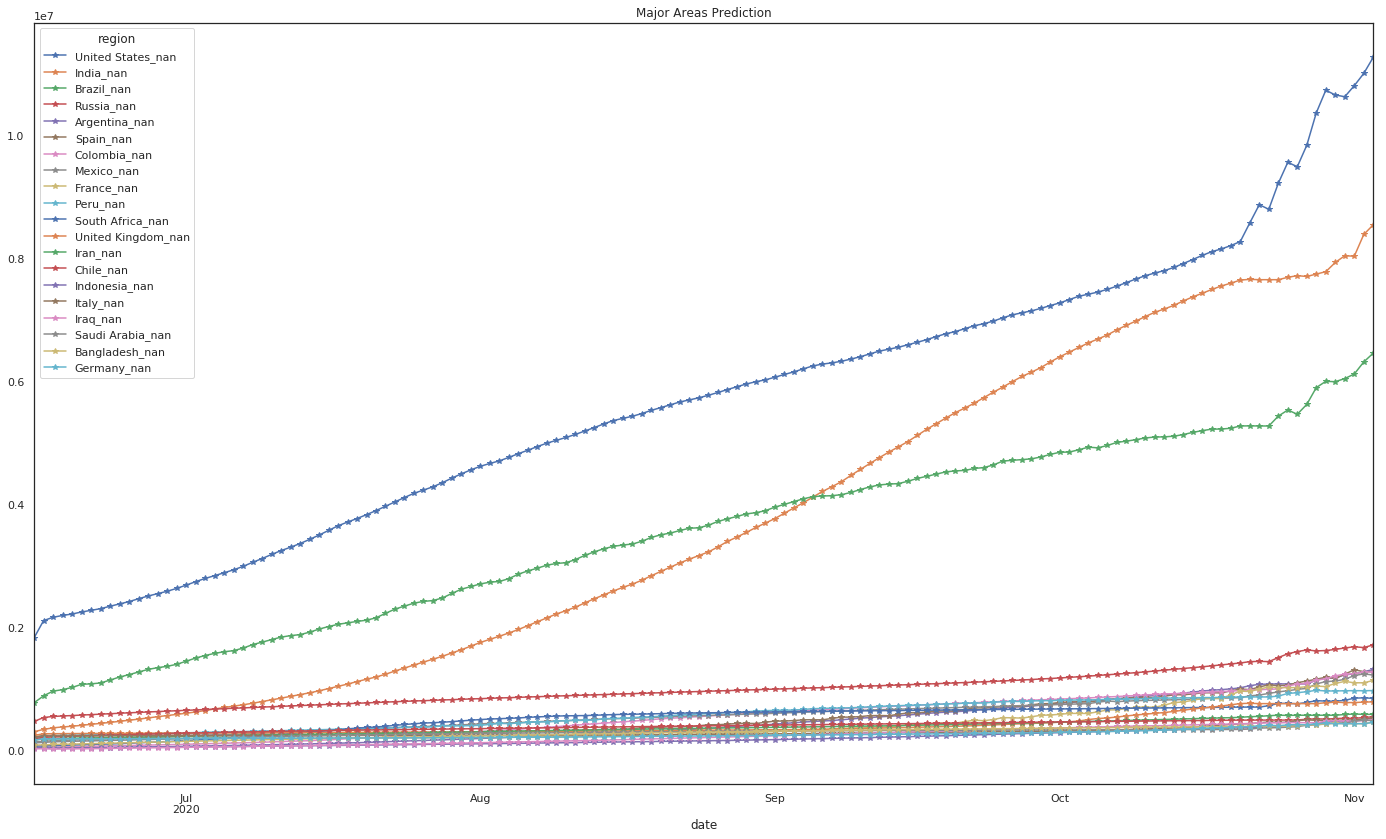

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

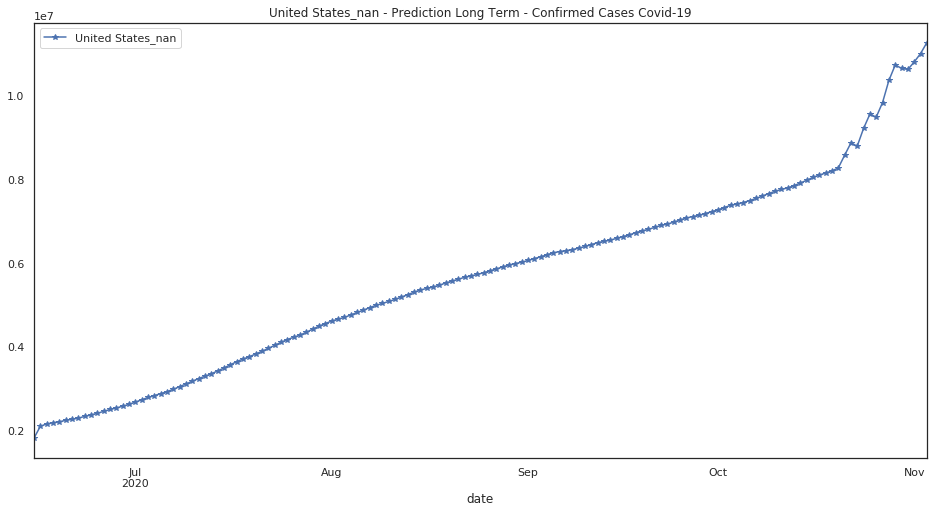

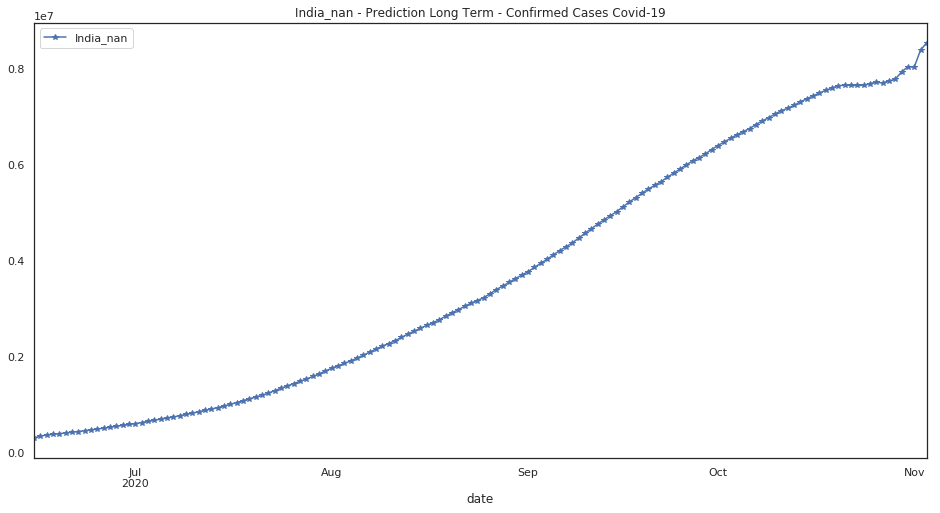

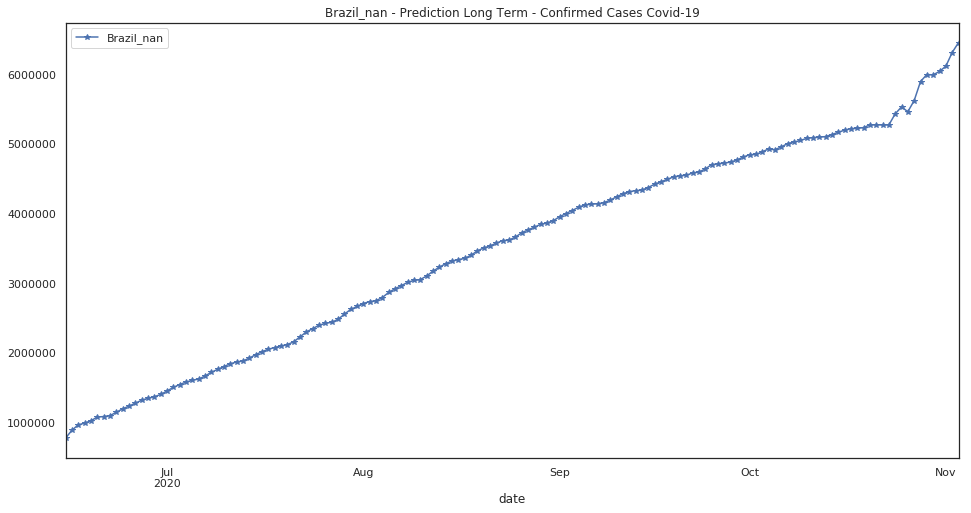

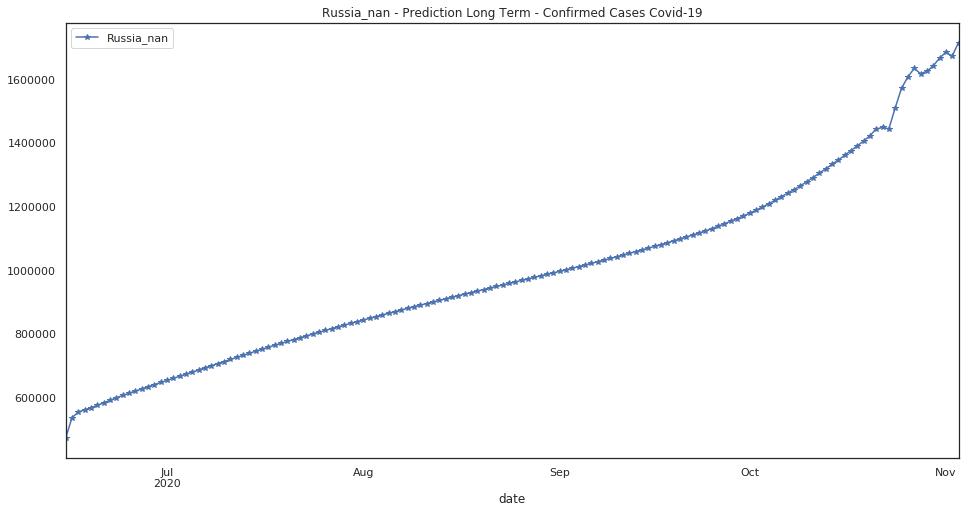

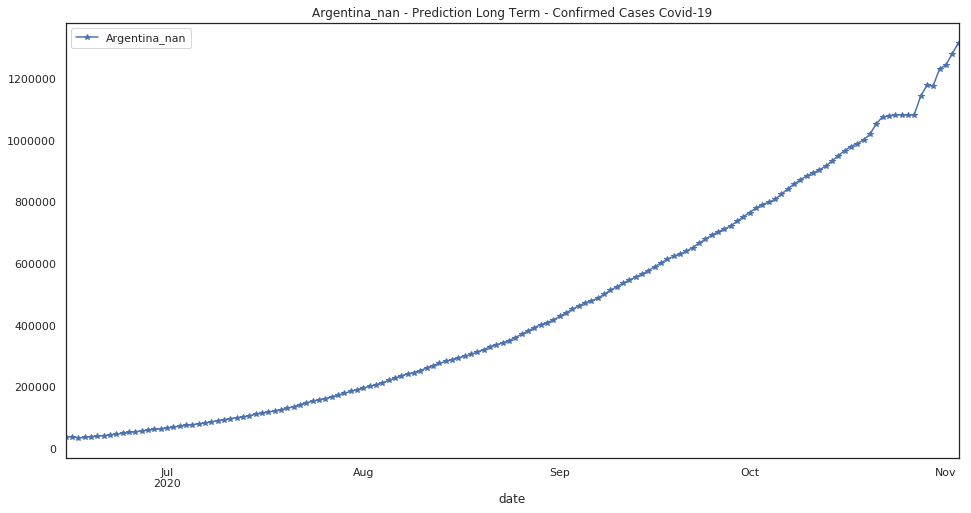

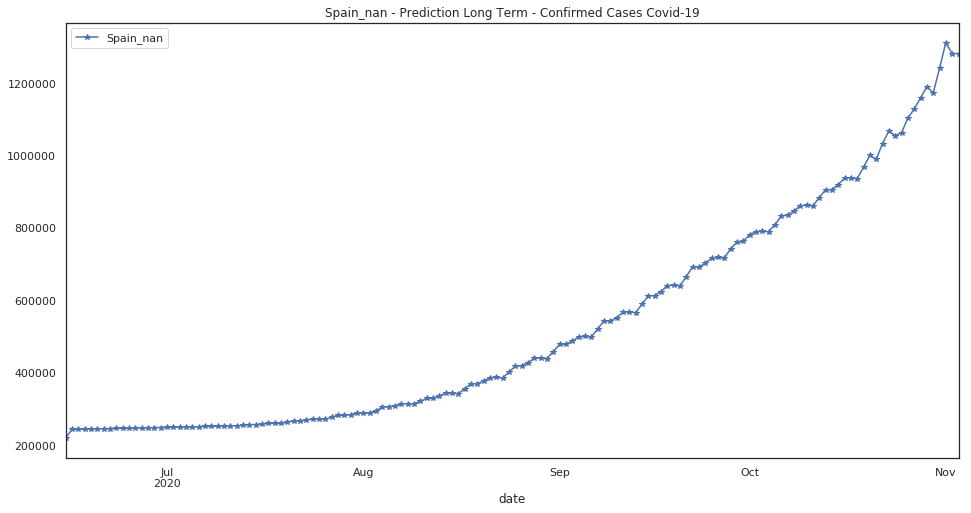

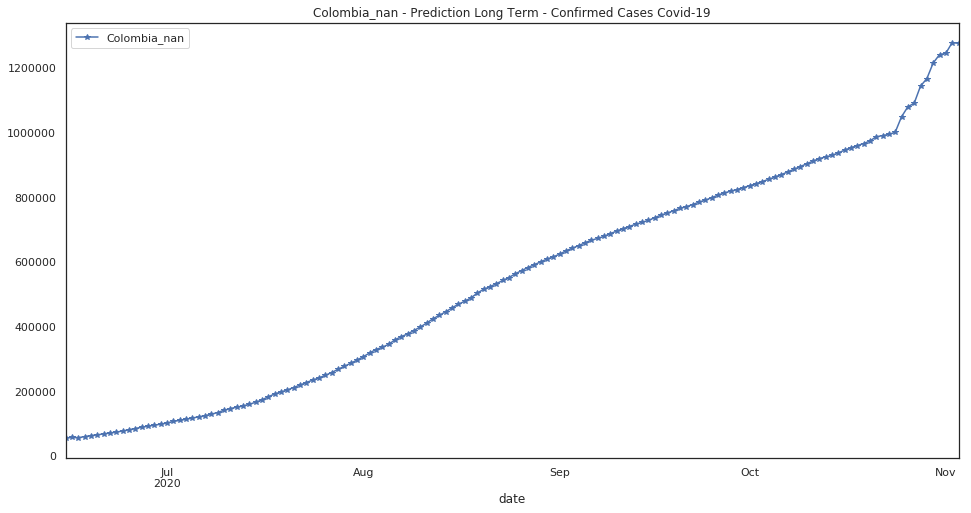

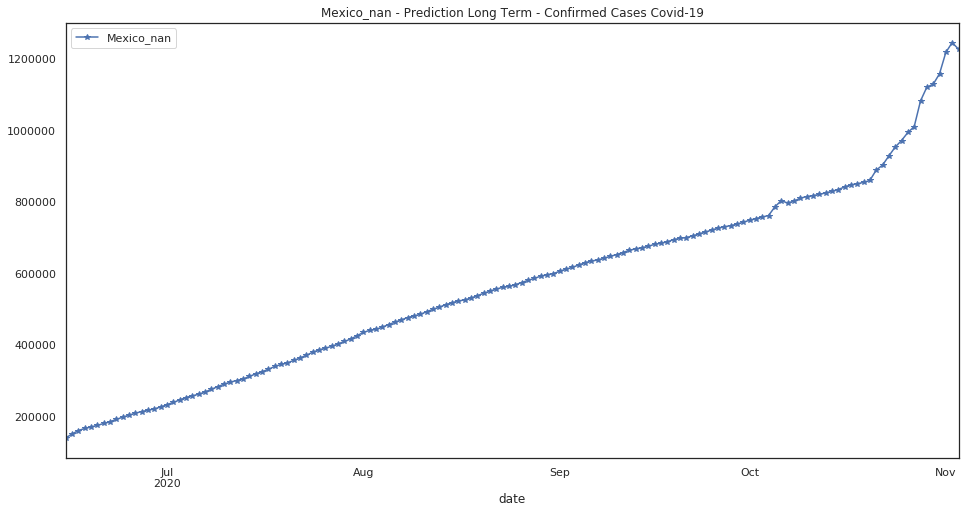

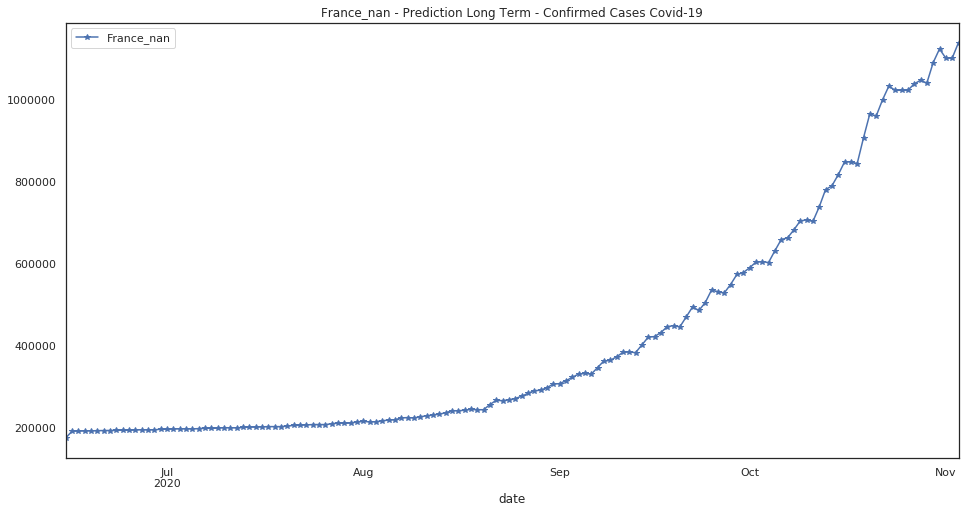

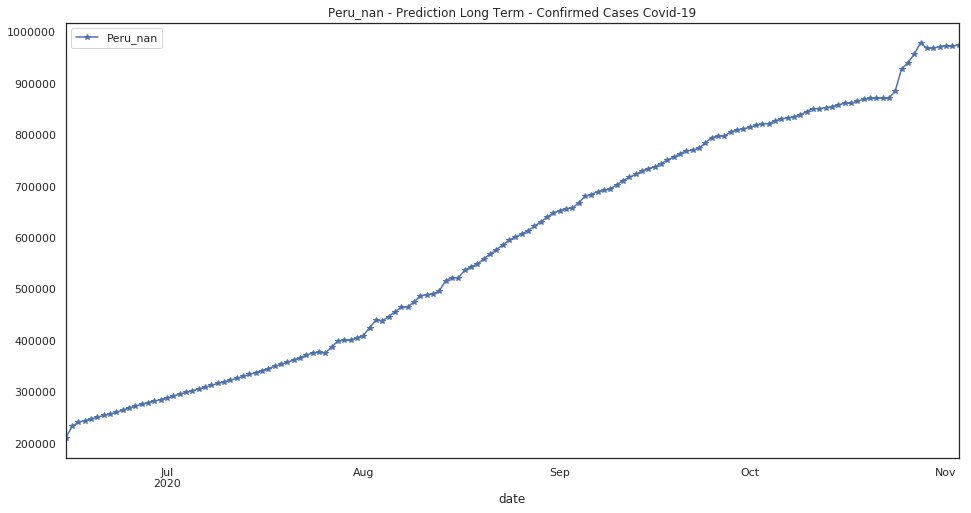

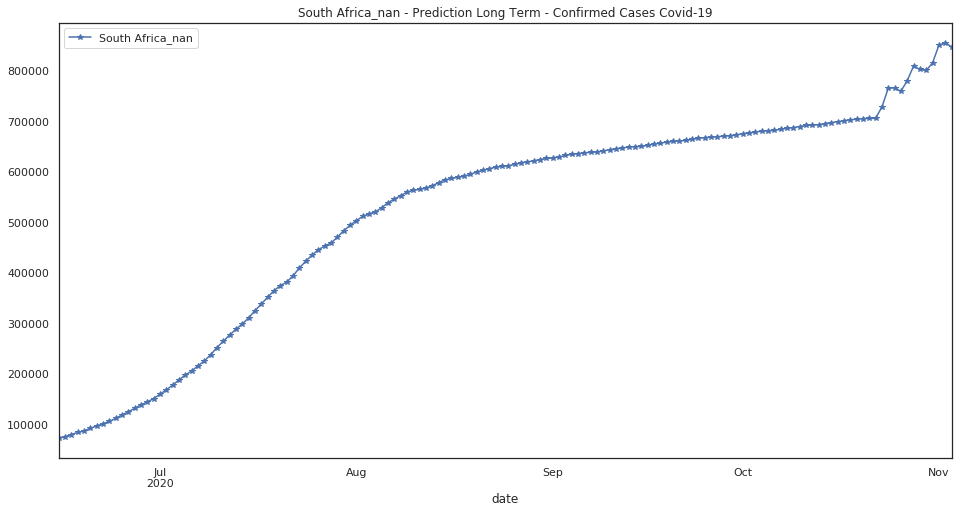

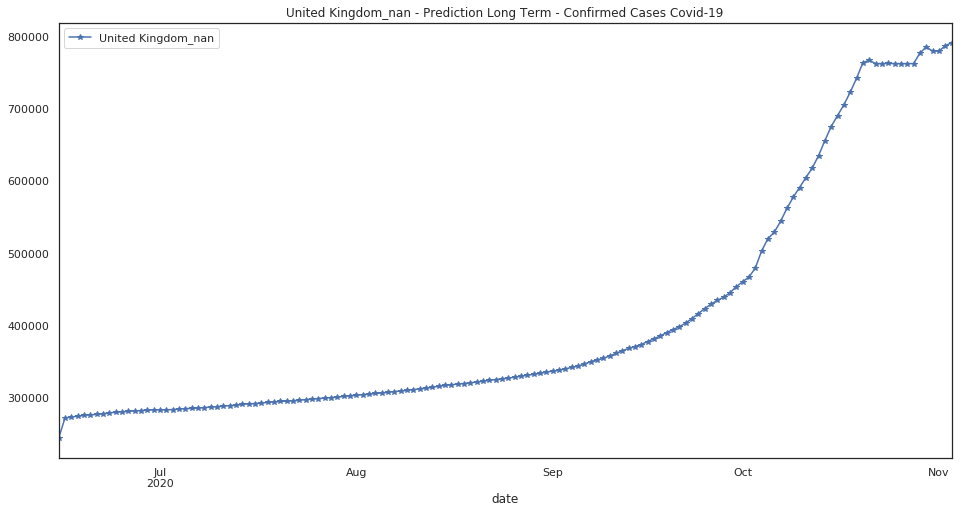

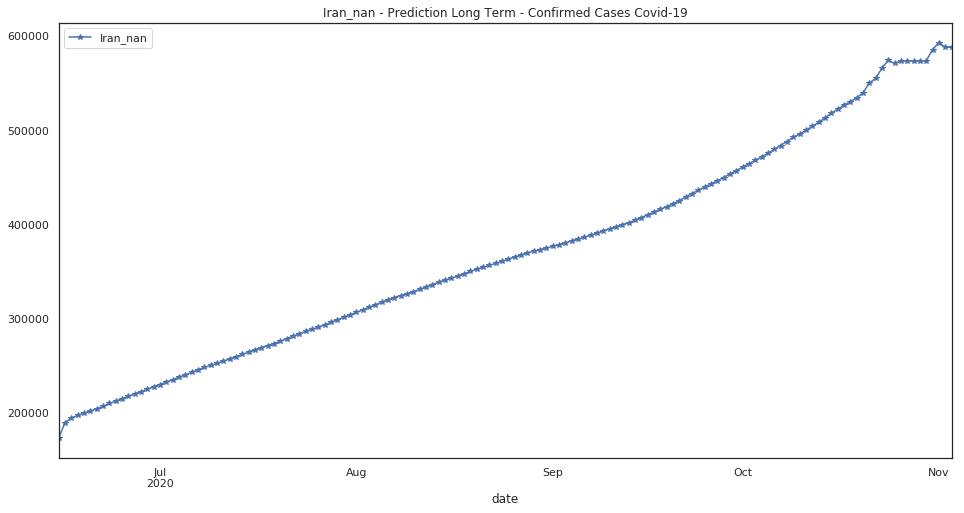

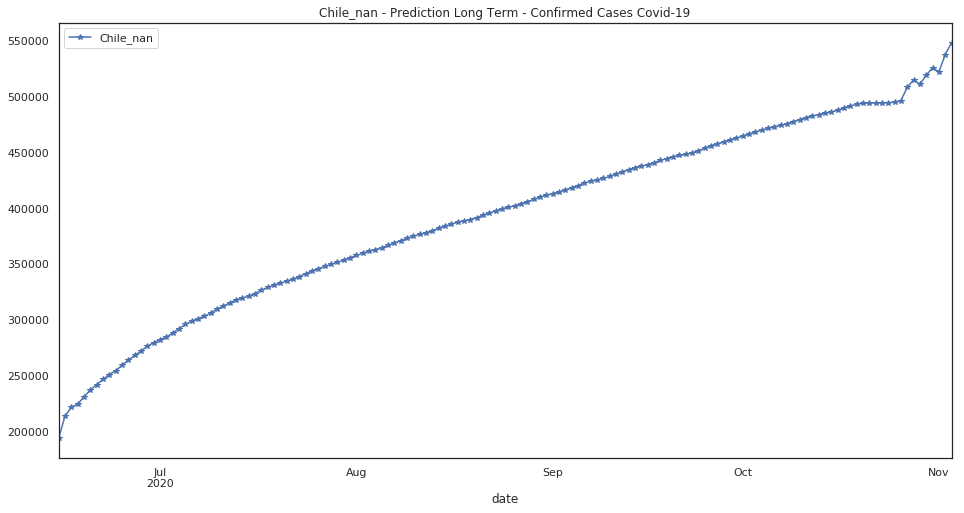

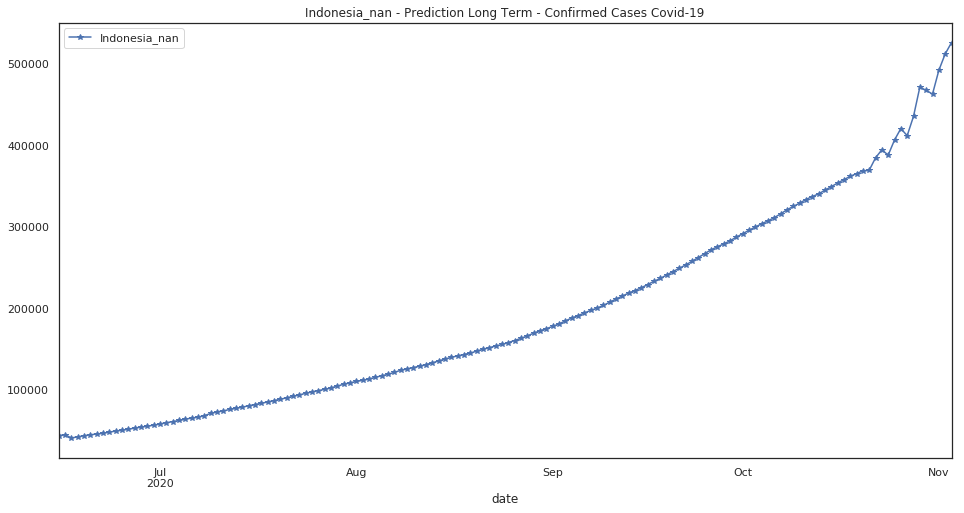

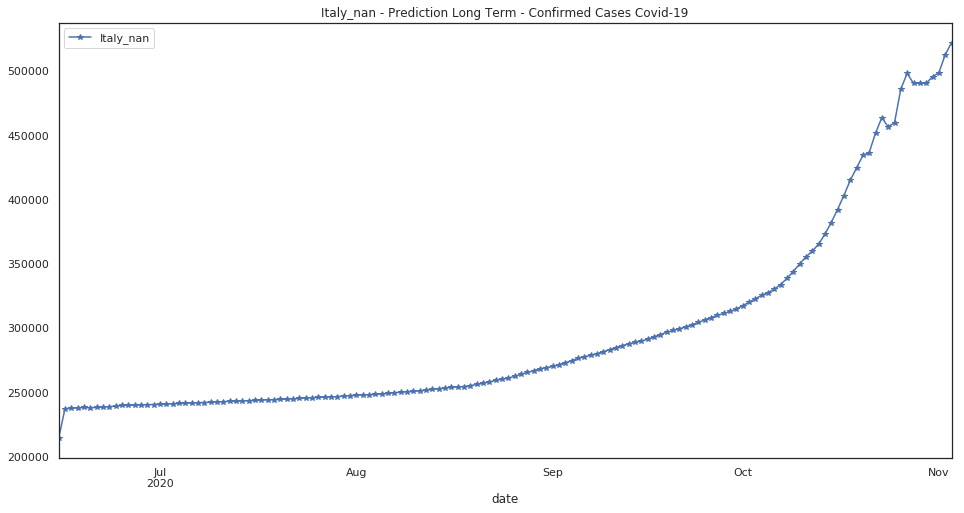

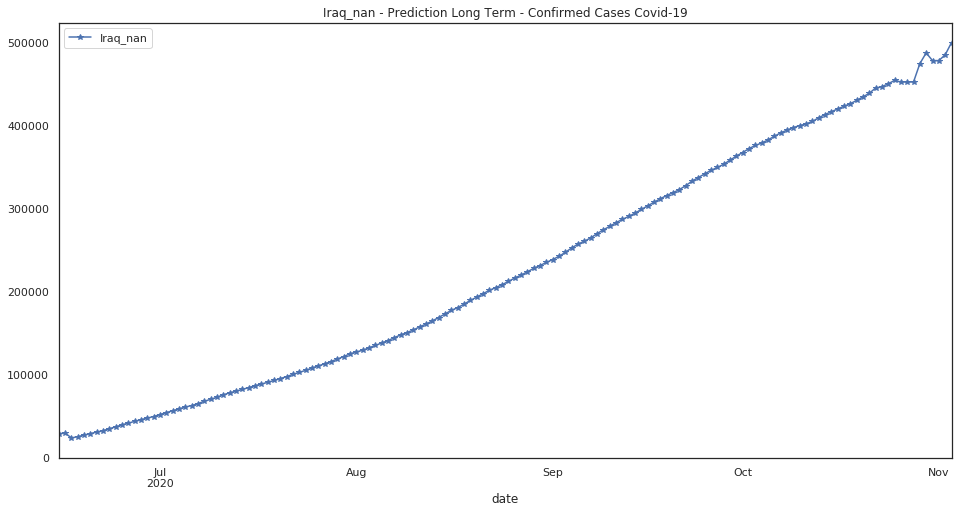

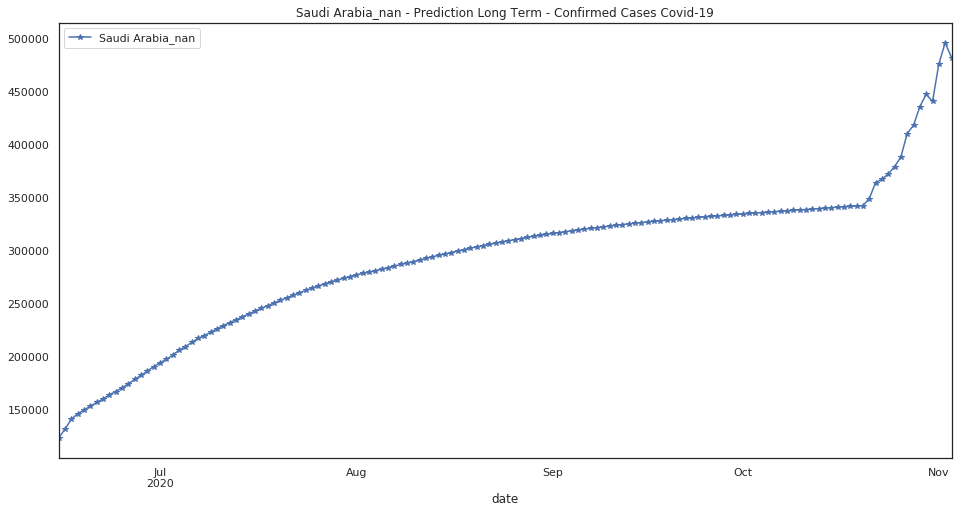

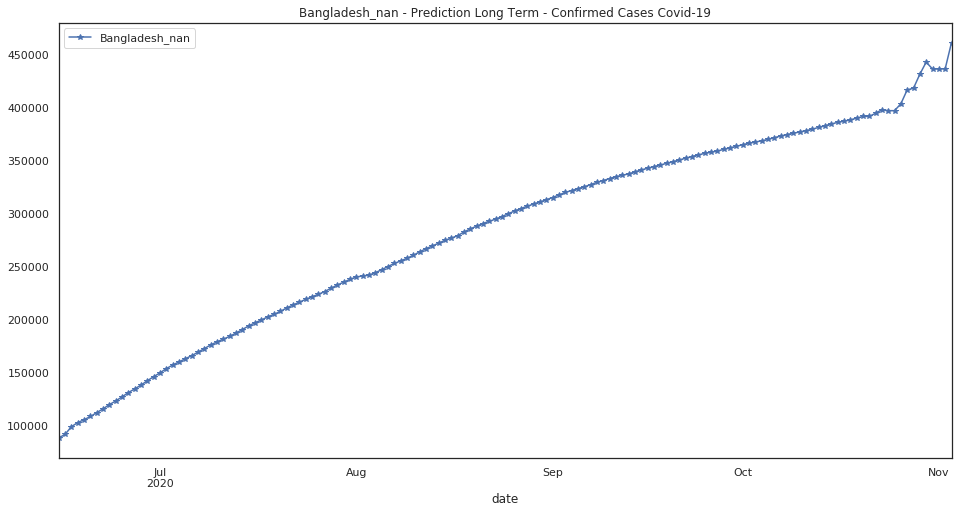

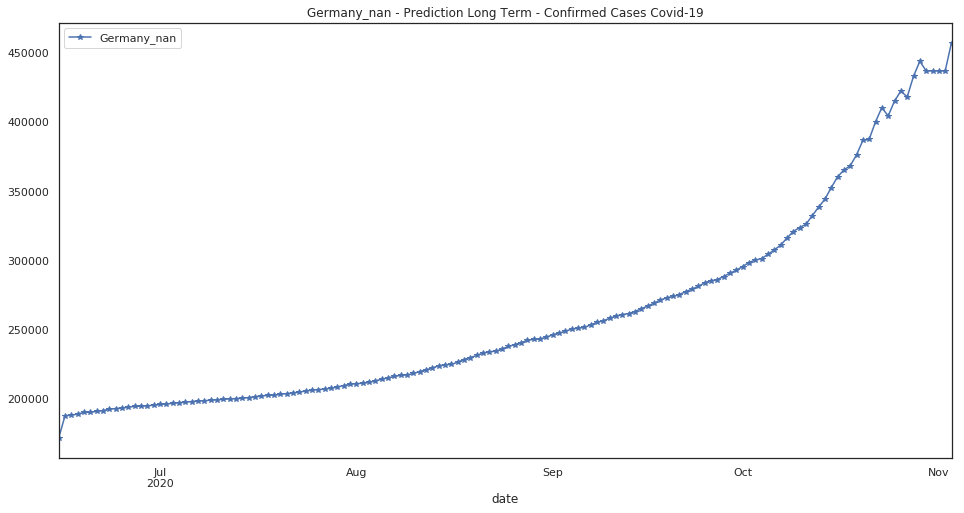

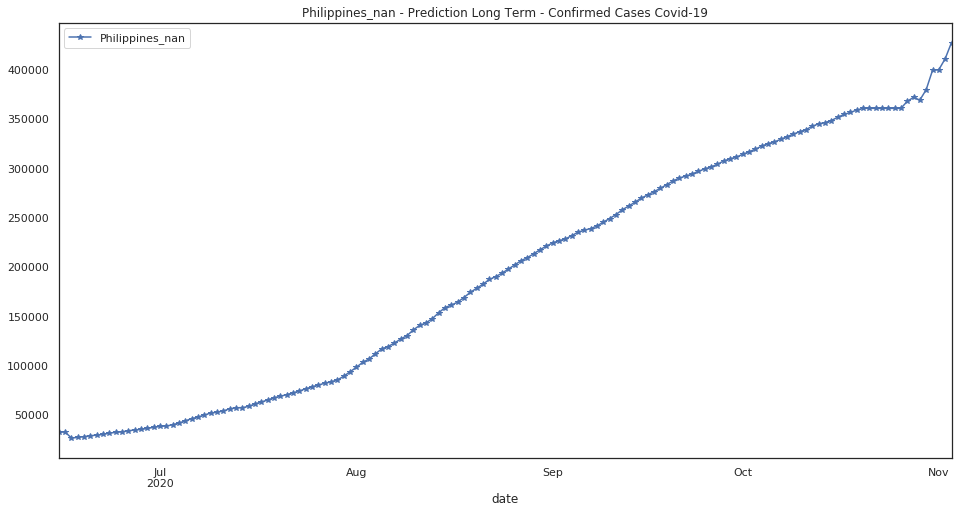

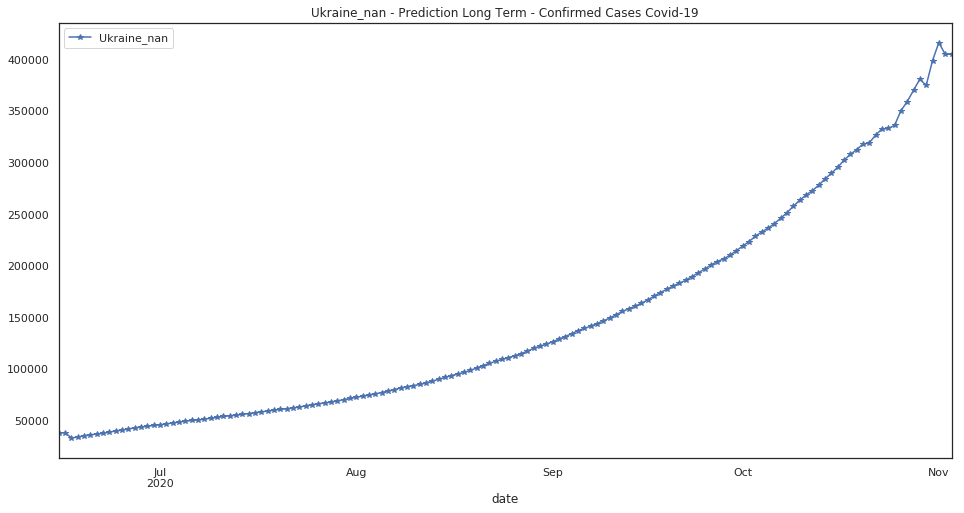

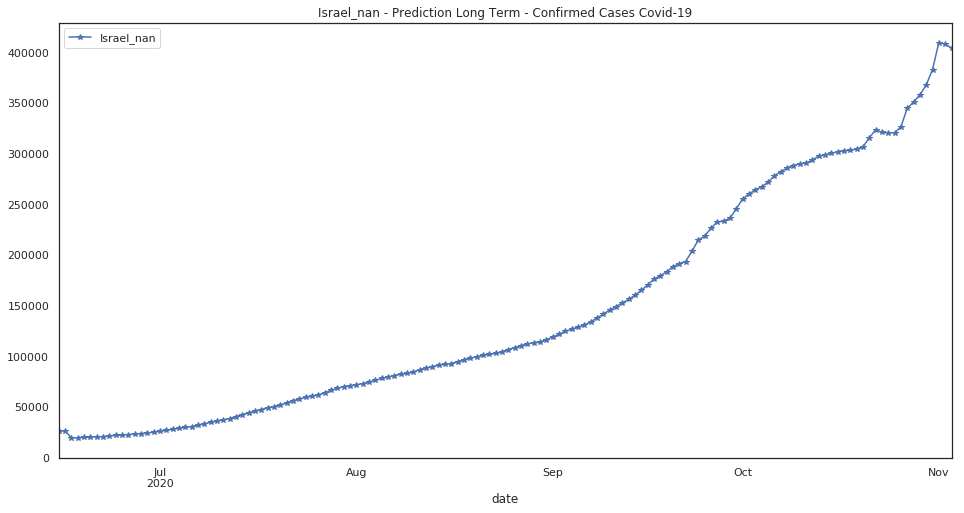

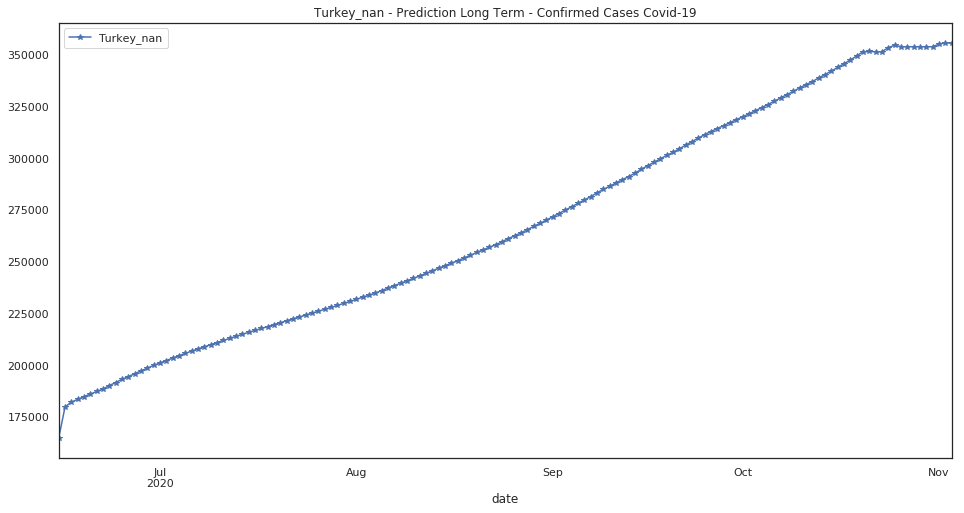

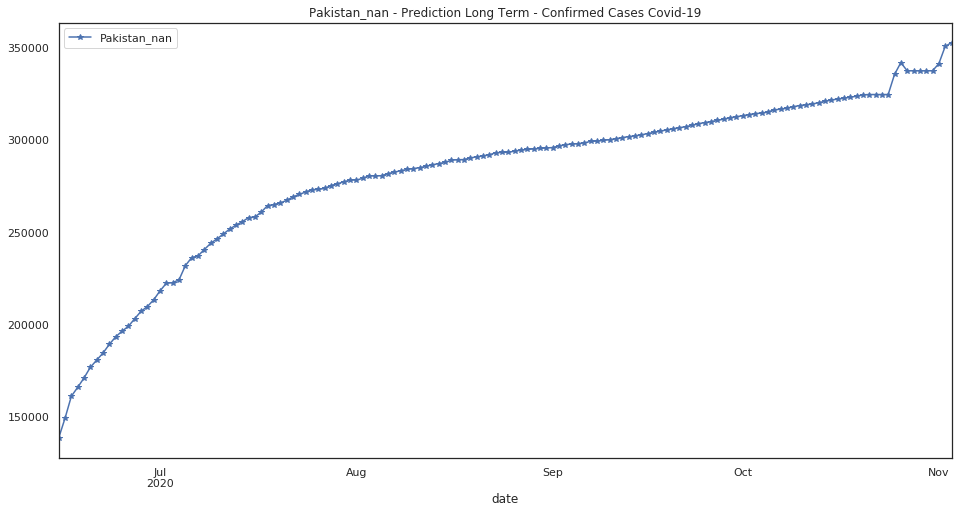

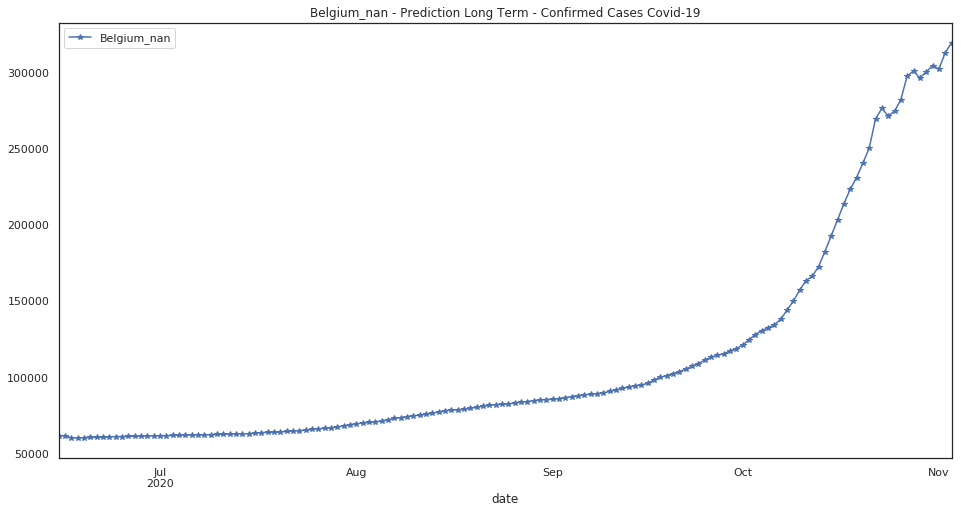

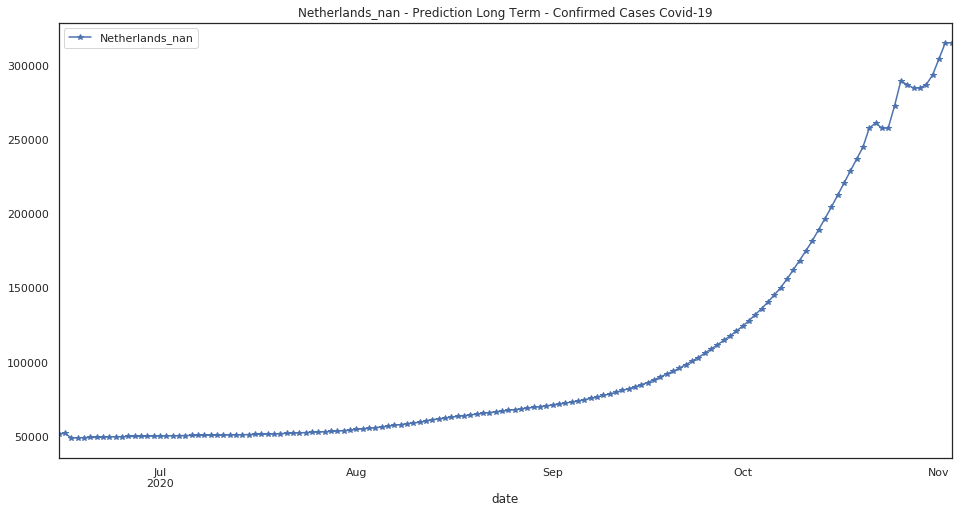

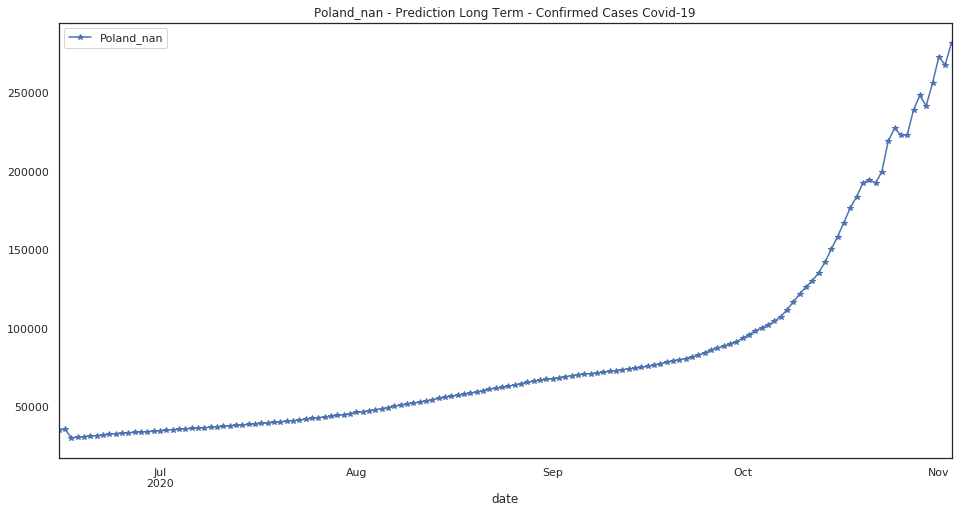

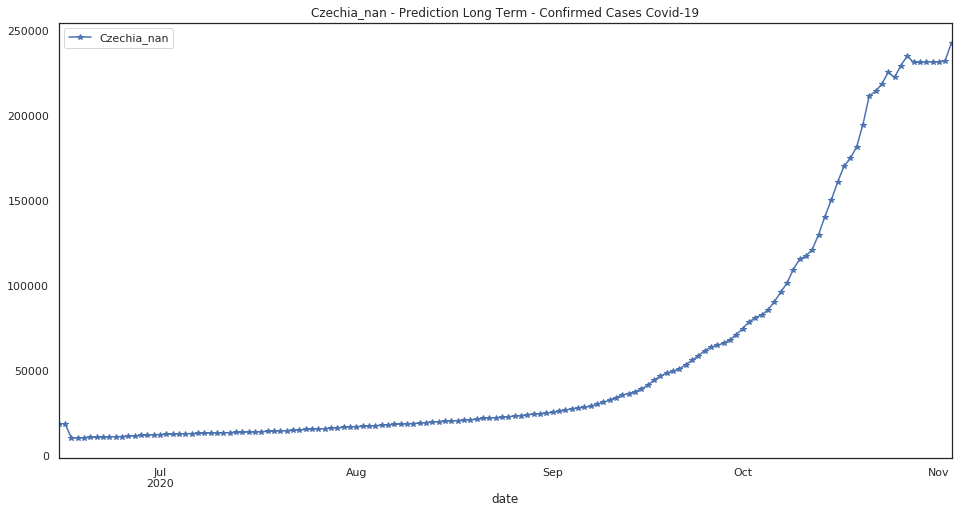

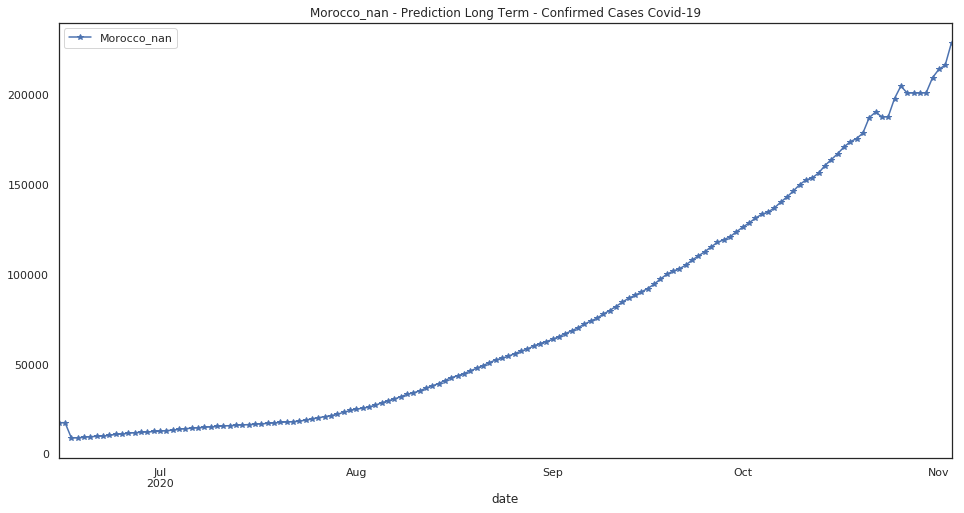

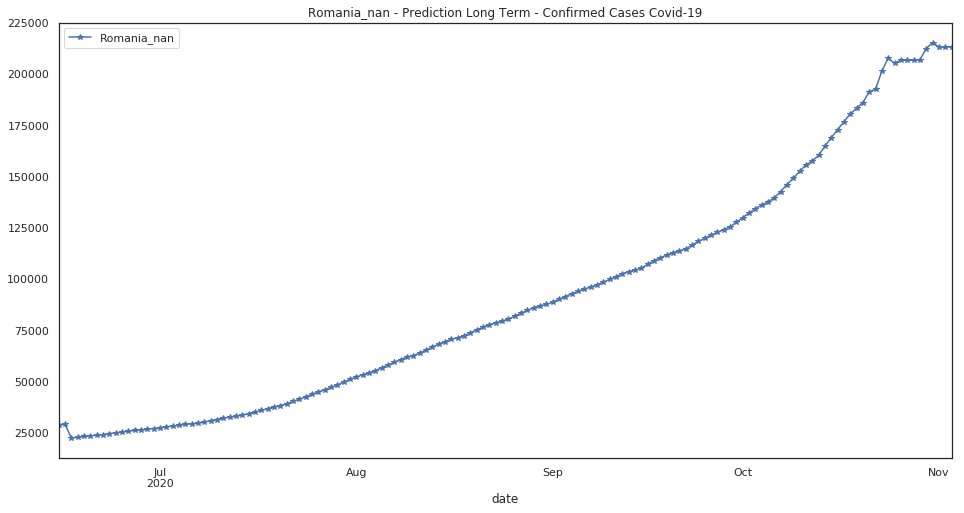

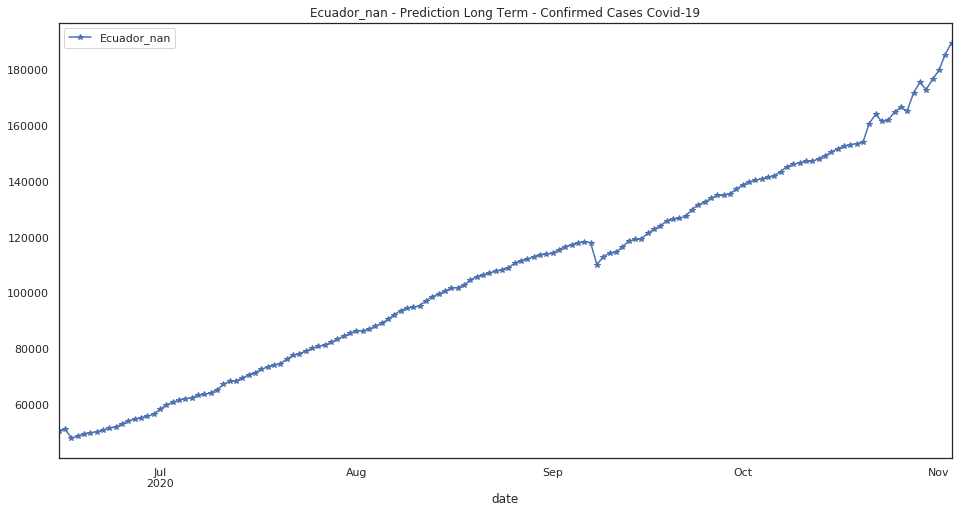

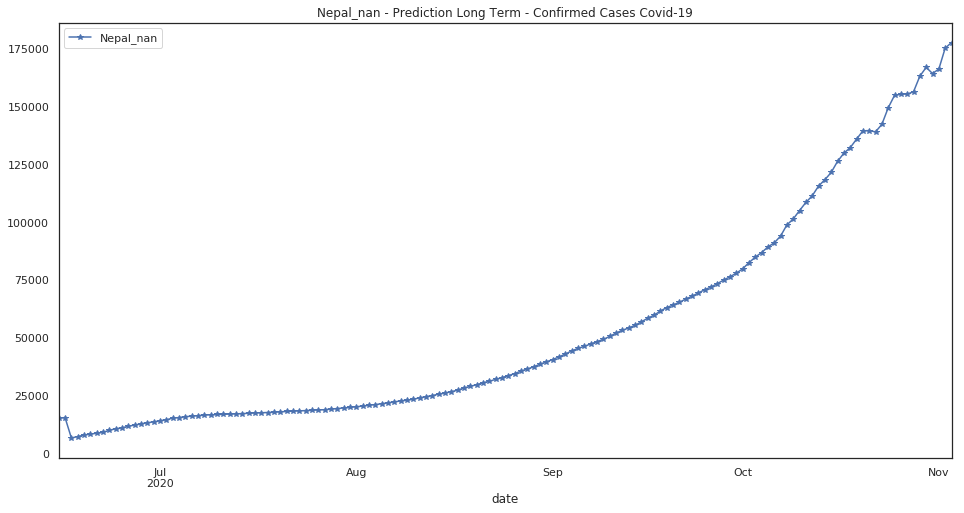

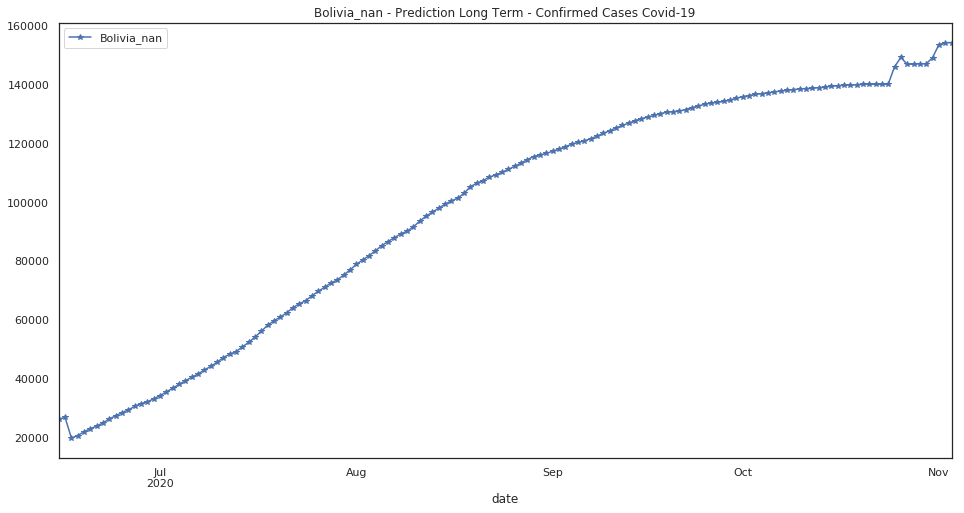

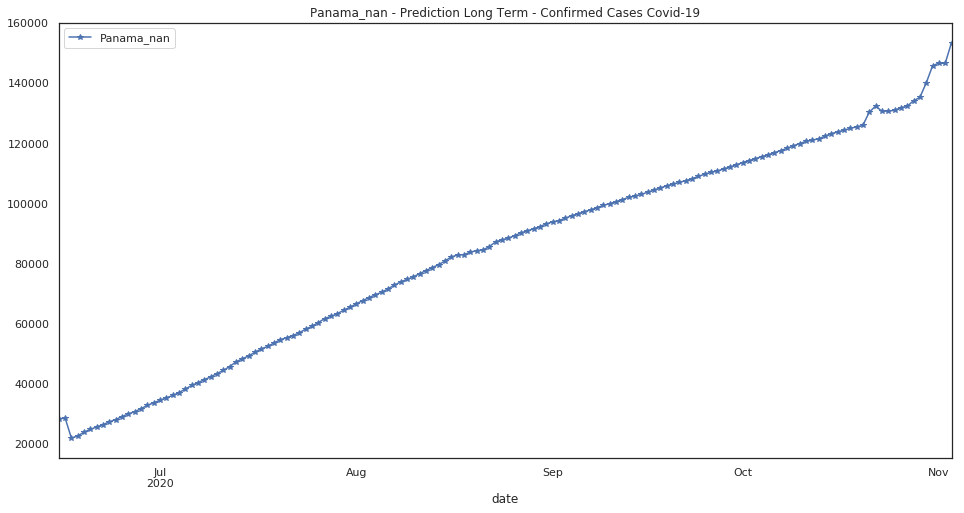

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

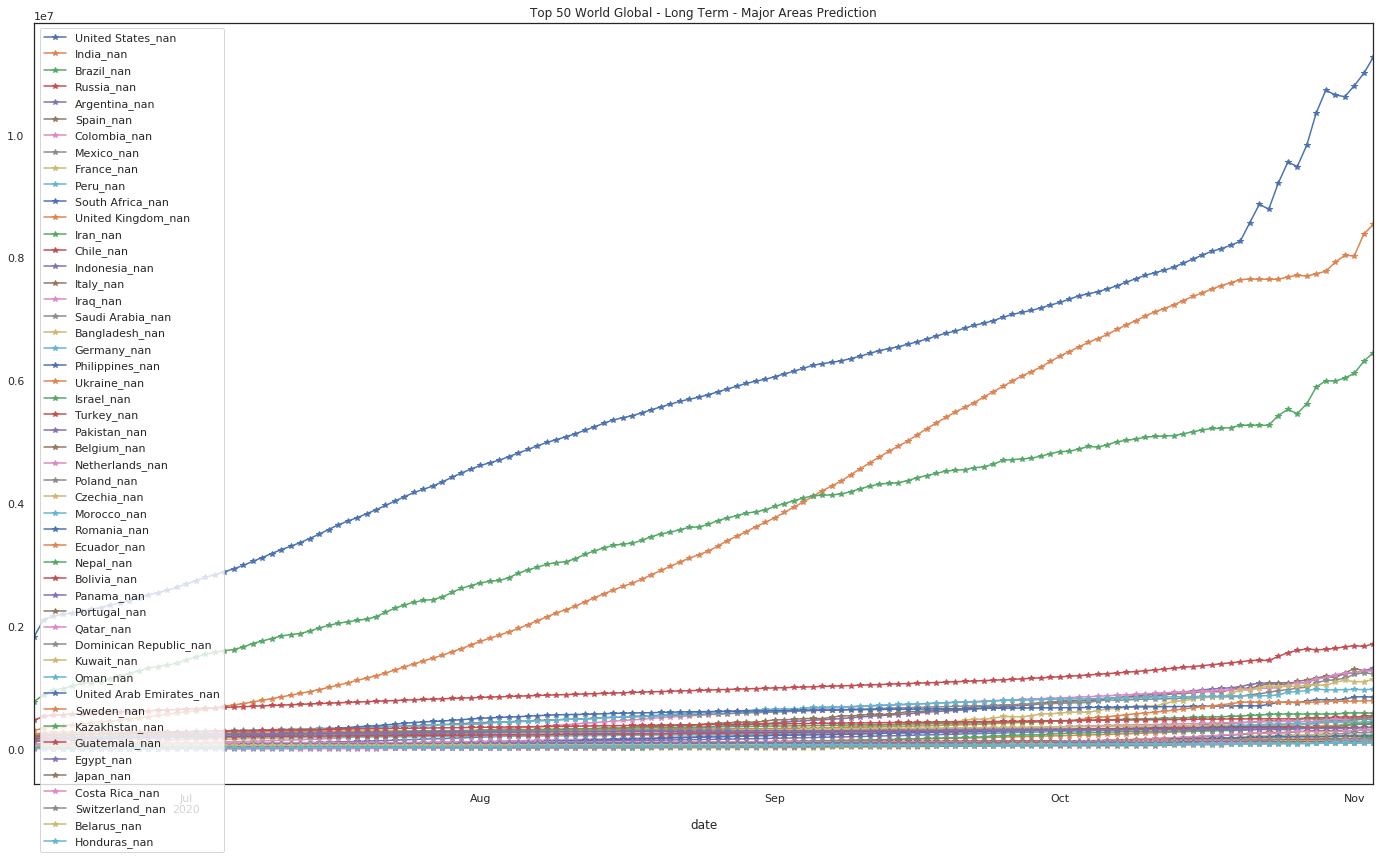

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

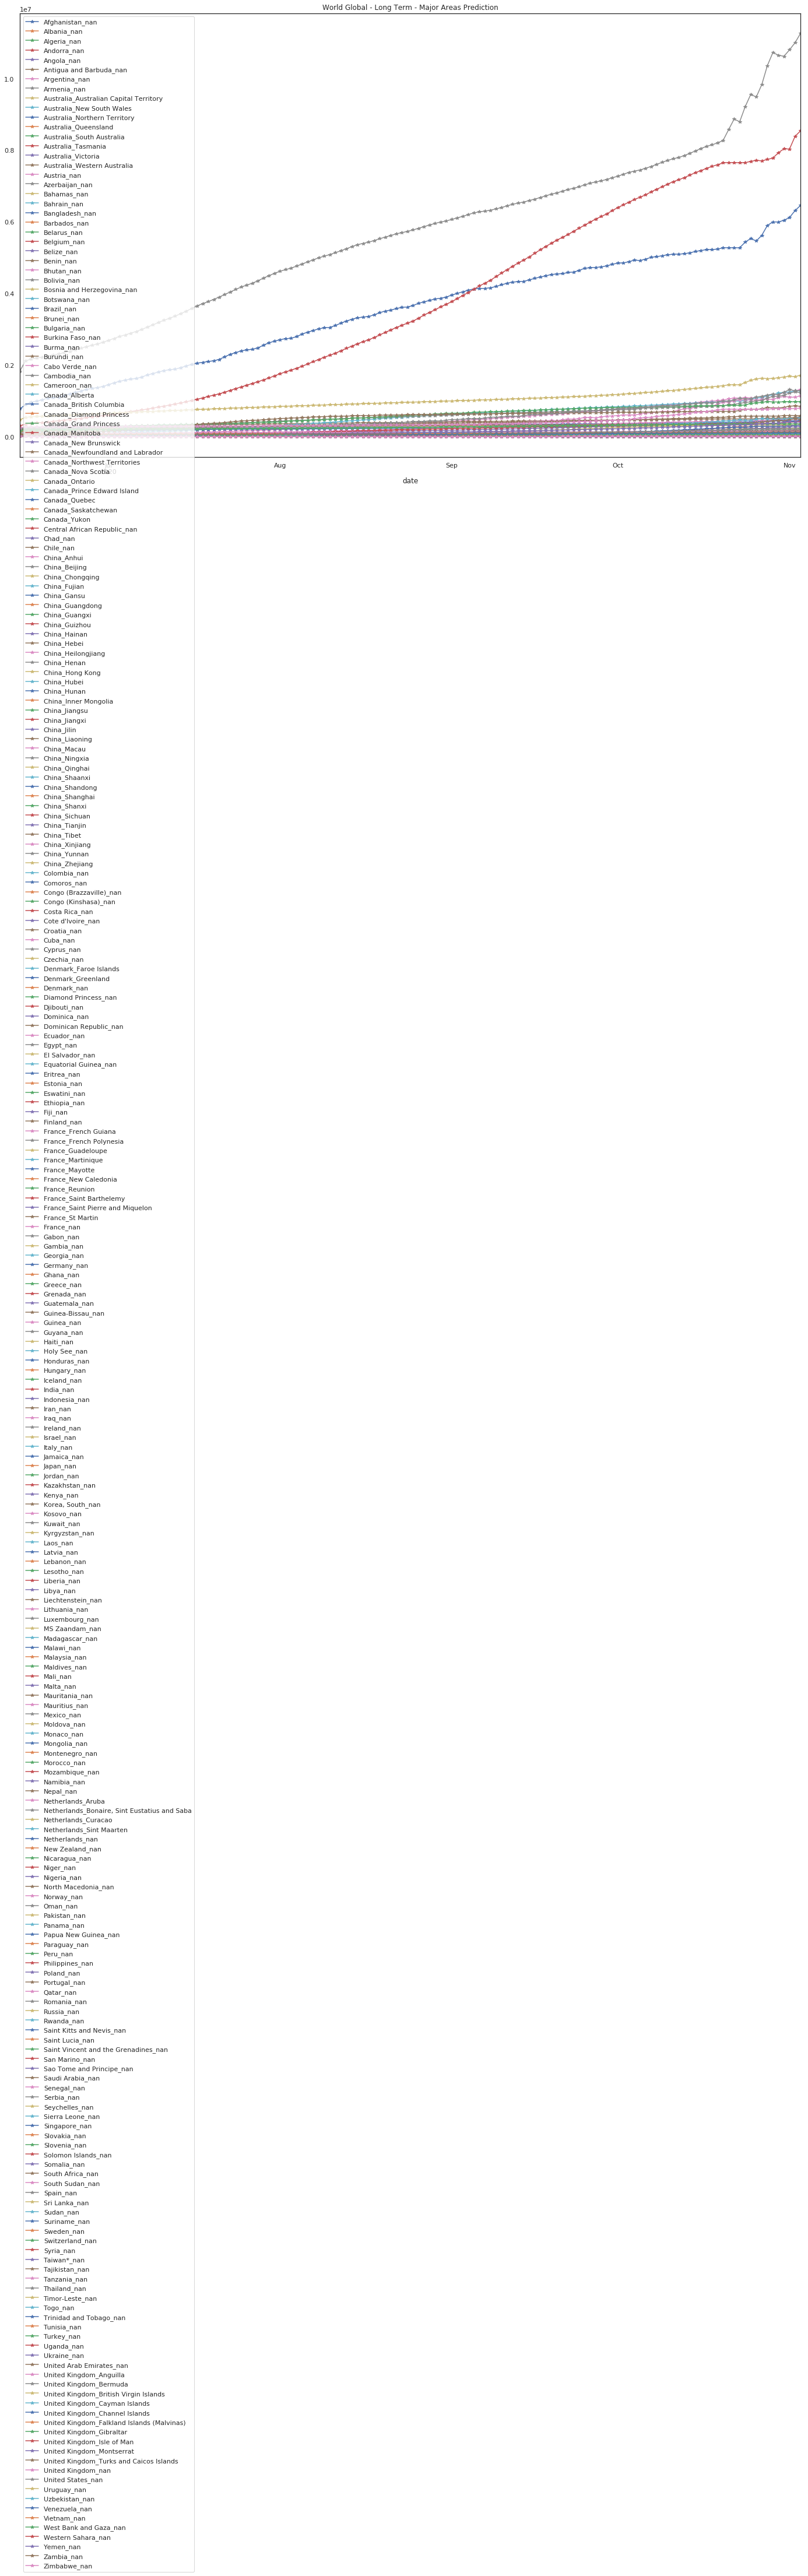

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-07-30          36627.0       5201.0      29851.0       1020.0   
2020-07-31          36746.0       5308.0      30420.0       1099.0   
2020-08-01          36805.0       5441.0      30978.0       1111.0   
2020-08-02          36796.0       5507.0      31504.0       1137.0   
2020-08-03          36825.0       5611.0      32013.0       1145.0   
2020-08-04          36876.0       5771.0      32544.0       1025.0   
2020-08-05          36920.0       5871.0      33097.0       1136.0   
2020-08-06          36981.0       5994.0      33665.0       1159.0   
2020-08-07          37094.0       6150.0      34198.0       1112.0   
2020-08-08          37146.0       6272.0      34728.0       1058.0   
2020-08-09          37136.0       6424.0      35208.0       1175.0   
2020-08-10          37227.0       6539.0      35745.0       1179.0   
2020-08-11          37359.0       6695.0      36261.0       1094.0   
2020-08-12          37434.0       6821.0      36748.0       1189.0   
2020-08-13          37500.0       6976.0      37235.0       1062.0   
2020-08-14          37520.0       7113.0      37717.0       1172.0   
2020-08-15          37617.0       7269.0      38185.0       1136.0   
2020-08-16          37693.0       7399.0      38638.0       1210.0   
2020-08-17          37690.0       7542.0      39081.0       1222.0   
2020-08-18          37680.0       7695.0      39503.0       1069.0   
2020-08-19          37689.0       7822.0      39906.0       1248.0   
2020-08-20          37913.0       7978.0      40316.0       1074.0   
2020-08-21          38015.0       8135.0      40729.0       1272.0   
2020-08-22          38021.0       8296.0      41130.0       1086.0   
2020-08-23          38067.0       8448.0      41521.0       1281.0   
2020-08-24          38138.0       8630.0      41917.0       1294.0   
2020-08-25          38161.0       8772.0      42292.0       1150.0   
2020-08-26          38196.0       8959.0      42676.0       1326.0   
2020-08-27          38222.0       9108.0      43077.0       1098.0   
2020-08-28          38228.0       9238.0      43467.0       1373.0   
...                     ...          ...          ...          ...   
2020-10-05          39504.0      14493.0      52339.0       2685.0   
2020-10-06          39573.0      14653.0      52469.0       2370.0   
2020-10-07          39626.0      14812.0      52591.0       2968.0   
2020-10-08          39692.0      14981.0      52725.0       2568.0   
2020-10-09          39771.0      15146.0      52874.0       3116.0   
2020-10-10          39793.0      15313.0      53012.0       2711.0   
2020-10-11          39867.0      15482.0      53140.0       3138.0   
2020-10-12          39959.0      15653.0      53375.0       3396.0   
2020-10-13          40013.0      15835.0      53500.0       2995.0   
2020-10-14          40071.0      16033.0      53623.0       3647.0   
2020-10-15          40112.0      16279.0      53843.0       3190.0   
2020-10-16          40152.0      16553.0      54069.0       3827.0   
2020-10-17          40221.0      16821.0      54271.0       3377.0   
2020-10-18          40287.0      17104.0      54465.0       3868.0   
2020-10-19          40365.0      17400.0      54676.0       4081.0   
2020-10-20          40440.0      17704.0      54894.0       3623.0   
2020-10-21          40446.0      18007.0      54924.0       4125.0   
2020-10-22          40434.0      18652.0      56797.0       4104.0   
2020-10-23          40442.0      18695.0      58176.0       4084.0   
2020-10-24          40448.0      19723.0      57766.0       4066.0   
2020-10-25          41226.0      19756.0      57723.0       4224.0   
2020-10-26          41487.0      20515.0      59053.0       3988.0   
2020-10-27          41276.0      20540.0      60027.0       4103.0   
2020-10-28          42521.0      20646.0      61975.0       4558.0   
2020-10-29

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
239                                Thailand_nan  15.870032  100.992541   
240                             Timor-Leste_nan  -8.874217  125.727539   
241                                    Togo_nan   8.619500    0.824800   
242                     Trinidad and Tobago_nan  10.691800  -61.222500   
243                                 Tunisia_nan  33.886917    9.537499   
244                                  Turkey_nan  38.963700   35.243300   
245                           United States_nan  40.000000 -100.000000   
246                                  Uganda_nan   1.373333   32.290275   
247                                 Ukraine_nan  48.379400   31.165600   
248                    United Arab Emirates_nan  23.424076   53.847818   
249                     United Kingdom_Anguilla  18.220600  -63.068600   
250                      United Kingdom_Bermuda  32.307800  -64.750500   
251       United Kingdom_British Virgin Islands  18.420700  -64.640000   
252               United Kingdom_Cayman Islands  19.313300  -81.254600   
253              United Kingdom_Channel Islands  49.372300   -2.364400   
254  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
255                    United Kingdom_Gibraltar  36.140800   -5.353600   
256                  United Kingdom_Isle of Man  54.236100   -4.548100   
257                   United Kingdom_Montserrat  16.742498  -62.187366   
258     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
259                          United Kingdom_nan  55.378100   -3.436000   
260                                 Uruguay_nan -32.522800  -55.765800   
261                              Uzbekistan_n

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      20            Bangladesh_nan  23.685000   90.356300   
2      22               Belarus_nan  53.709800   27.953400   
3      23               Belgium_nan  50.833300    4.469936   
4      27               Bolivia_nan -16.290200  -63.588700   
5      30                Brazil_nan -14.235000  -51.925300   
6      55                 Chile_nan -35.675100  -71.543000   
7      89              Colombia_nan   4.570900  -74.297300   
8      93            Costa Rica_nan   9.748900  -83.753400   
9      98               Czechia_nan  49.817500   15.473000   
10    105    Dominican Republic_nan  18.735700  -70.162700   
11    106               Ecuador_nan  -1.831200  -78.183400   
12    107                 Egypt_nan  26.820553   30.802498   
13    113              Ethiopia_nan   9.145000   40.489700   
14    126                France_nan  46.227600    2.213700   
15    131               Germany_nan  51.165691   10.451526   
16    135             Guatemala_nan  15.783500  -90.230800   
17    141              Honduras_nan  15.200000  -86.241900   
18    144                 India_nan  20.593684   78.962880   
19    145             Indonesia_nan  -0.789300  113.921300   
20    146                  Iran_nan  32.427908   53.688046   
21    147                  Iraq_nan  33.223191   43.679291   
22    149                Israel_nan  31.046051   34.851612   
23    150                 Italy_nan  41.871940   12.567380   
24    152                 Japan_nan  36.204824  138.252924   
25    154            Kazakhstan_nan  48.019600   66.923700   
26    158                Kuwait_nan  29.311660   47.481766   
27    179                Mexico_nan  23.634500 -102.552800   
28    184               Morocco_nan  31.791700   -7.092600   
29    187                 Nepal_nan  28.166700   84.250000   
30    192           Netherlands_nan  52.132600    5.291300   
31    199                  Oman_nan  21.512583   55.923255   
32    200              Pakistan_nan  30.375300   69.345100   
33    201                Panama_nan   8.538000  -80.782100   
34    204                  Peru_nan  -9.190000  -75.015200   
35    205           Philippines_nan  12.879721  121.774017   
36    206                Poland_nan  51.919400   19.145100   
37    207              Portugal_nan  39.399900   -8.224500   
38    208                 Qatar_nan  25.354800   51.183900   
39    209               Romania_nan  45.943200   24.966800   
40    210                Russia_nan  61.524010  105.318756   
41    217          Saudi Arabia_nan  23.885942   45.079162   
42    227          South Africa_nan -30.559500   22.937500   
43    229                 Spain_nan  40.463667   -3.749220   
44    233                Sweden_nan  60.128161   18.643501   
45    234           Switzerland_nan  46.818200    8.227500   
46    244                Turkey_nan  38.963700   35.243300   
47    245         United States_nan  40.000000 -100.000000   
48    247               Ukraine_nan  48.379400   31.165600   
49    248  United Arab Emirates_nan  23.424076   53.847818   
50    259        United Kingdom_nan  55.378100   -3.436000   

    2020-06-15 00:00:00  2020-06-16 00:00:00  2020-06-17 00:00:00  \
0               38026.0              39211.0              34779.0   
1               87920.0              91252.0              98505.0   
2               56915.0              57510.0              55369.0   
3               61591.0              61638.0              60155.0   
4               26196.0              26895.0              19883.0   
5              776070.0             888271.0             965928.0   
6              194118.0             213715.0             221631.0   
7               55520.0              57132.0              56467.0   
8               11246.0              11291.0               1796.0   
9               18424.0              18465.0              10111.0   
10              2981

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()